In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Data Visualization/Assignment 1/

Mounted at /content/gdrive
/content/gdrive/My Drive/Data Visualization/Assignment 1


In [2]:
!pip install plotly==4.14.3

     |████████████████████████████████| 13.2 MB 149 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
import pandas as pd
import plotly.express as px
import seaborn as sns

# **EDA on Los Angeles Crime Data in 2020 to Present**

In [4]:
df_raw=pd.read_csv("crime_data.csv")

In [5]:
print("Columns:")
df_raw.columns


Columns:


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
print("Number of rows:")
len(df_raw)

Number of rows:


317854

**Extracting columns of interest**

In [7]:
df_raw.drop(['AREA','Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'], axis='columns', inplace=True)

Dropiing null values

In [8]:
df_raw = df_raw.dropna()

Replacing encoded values with full form for better understanding

In [9]:
df_raw=df_raw.replace({"Vict Descent":{"A": "Other Asian", "B":"Black", "C":"Chinese", "D": "Cambodian", "F":"Filipino", "G":"Guamanian", "H":"Hispanic", 
                "I":"Native American", "J" : "Japanese" ,"K" : "Korean", "L" :"Laotian", "O": "Other",
                "P": "Pacific Islander", "S": "Samoan", "U": "Hawaiian", "V":"Vietnamese", "W": "White", "X": "Unknown", "Z":"Asian Indian"}})

df_raw=df_raw.replace({"Vict Sex":{"M": "Male", "F":"Female", "X":"Unknown"}})

##**Univariate Analysis**

Exploring Victim Age variable

In [10]:
fig=px.histogram(df_raw,x="Vict Age",nbins=100,labels={"Vict Age":"Victim's Age"})

fig.show()

In [11]:
fig=px.histogram(df_raw,x="Vict Age",nbins=10,labels={"Vict Age":"Victim's Age"})

fig.show()

Exploring Victim's Sex Variable

In [12]:
fig=px.histogram(df_raw,x="Vict Sex",labels={"Vict Sex":"Victim's Sex"},color_discrete_map={
                "F": "red",
                "M": "green",
                "X": "blue",
                "H": "goldenrod"})

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Exploring Victim's Descent Variable

In [13]:
fig=px.histogram(df_raw,x="Vict Descent",labels={"Vict Descent":"Victim's Decent"},color_discrete_sequence=px.colors.qualitative.Antique)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Exploring Area Variable

In [14]:
fig=px.histogram(df_raw,x="AREA NAME",labels={"AREA NAME":"Area of Crime"}, color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [15]:
fig=px.histogram(df_raw,y="Crm Cd Desc",labels={"Crm Cd Desc":"Description of Crime"}, color_discrete_sequence=px.colors.qualitative.Bold)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Removing negative age values and H gender

In [16]:
df_raw = df_raw[df_raw['Vict Age'] >= 0]
df_raw = df_raw[df_raw['Vict Sex'] != "H"]


##**Multivariate Analysis**

In [17]:
 len(df_raw[(df_raw['Vict Sex'] == "Unknown") & (df_raw['Vict Descent'] == "Japanese")])


0

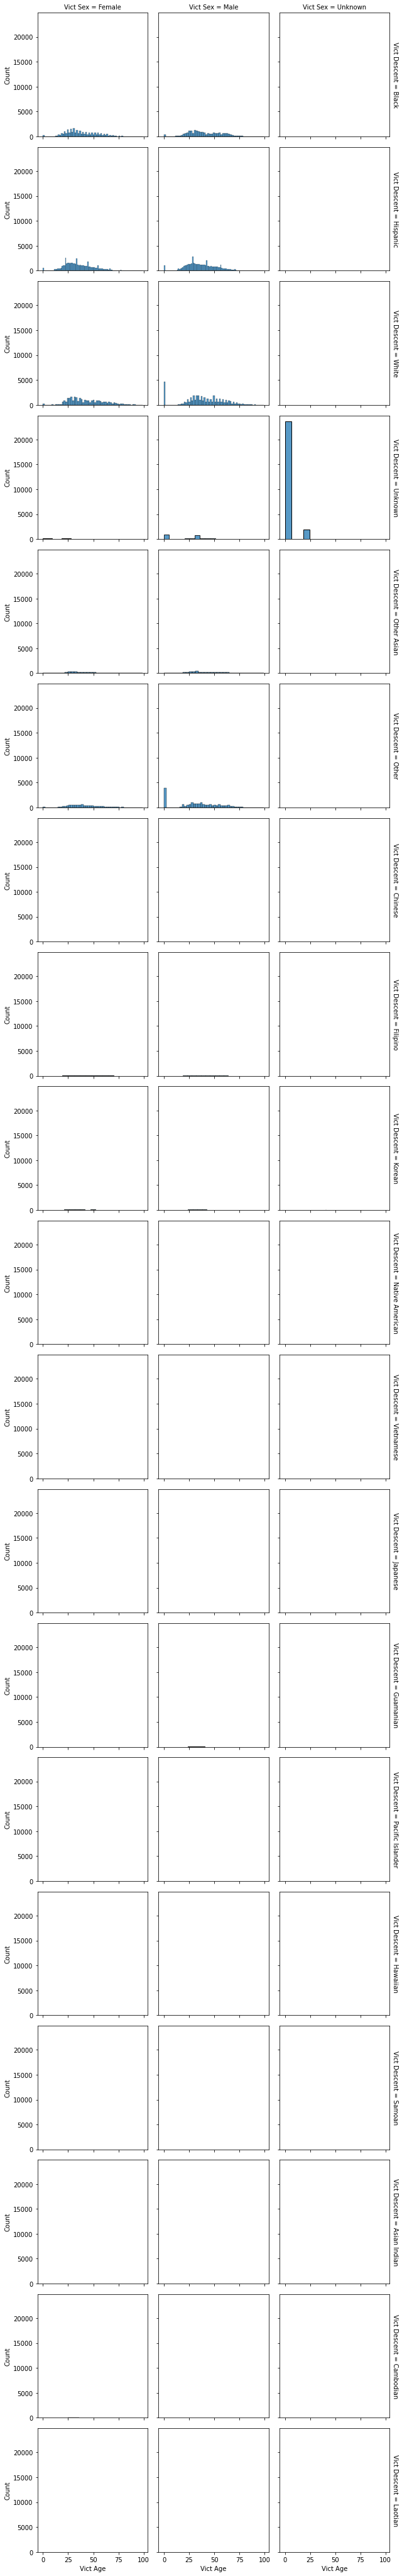

In [18]:
g=sns.FacetGrid(df_raw, col="Vict Sex", row="Vict Descent", margin_titles=True, despine=False)
#g.figure.subplots_adjust(wspace=5, hspace=0)
g.map_dataframe(sns.histplot, x="Vict Age")

In [19]:
df_raw[(df_raw['Vict Age']>=1) & (df_raw['Vict Age']<=10 )]

DR_NO               Date Rptd  ... Vict Sex  Vict Descent
276     201913350  08/15/2020 12:00:00 AM  ...   Female      Hispanic
374     202107724  03/20/2020 12:00:00 AM  ...     Male         White
1246    200806879  03/03/2020 12:00:00 AM  ...   Female      Hispanic
1808    200204941  01/20/2020 12:00:00 AM  ...   Female      Hispanic
2406    200304232  01/03/2020 12:00:00 AM  ...   Female      Hispanic
...           ...                     ...  ...      ...           ...
317085  212009089  05/13/2021 12:00:00 AM  ...     Male         Black
317204  210114562  08/03/2021 12:00:00 AM  ...     Male      Hispanic
317426  211704310  01/10/2021 12:00:00 AM  ...   Female         White
317501  210907648  04/03/2021 12:00:00 AM  ...   Female      Hispanic
317571  211205860  01/28/2021 12:00:00 AM  ...   Female      Hispanic

[1743 rows x 9 columns]

Removing age=0 victims

In [20]:
df_raw=df_raw[df_raw['Vict Age']!=0]

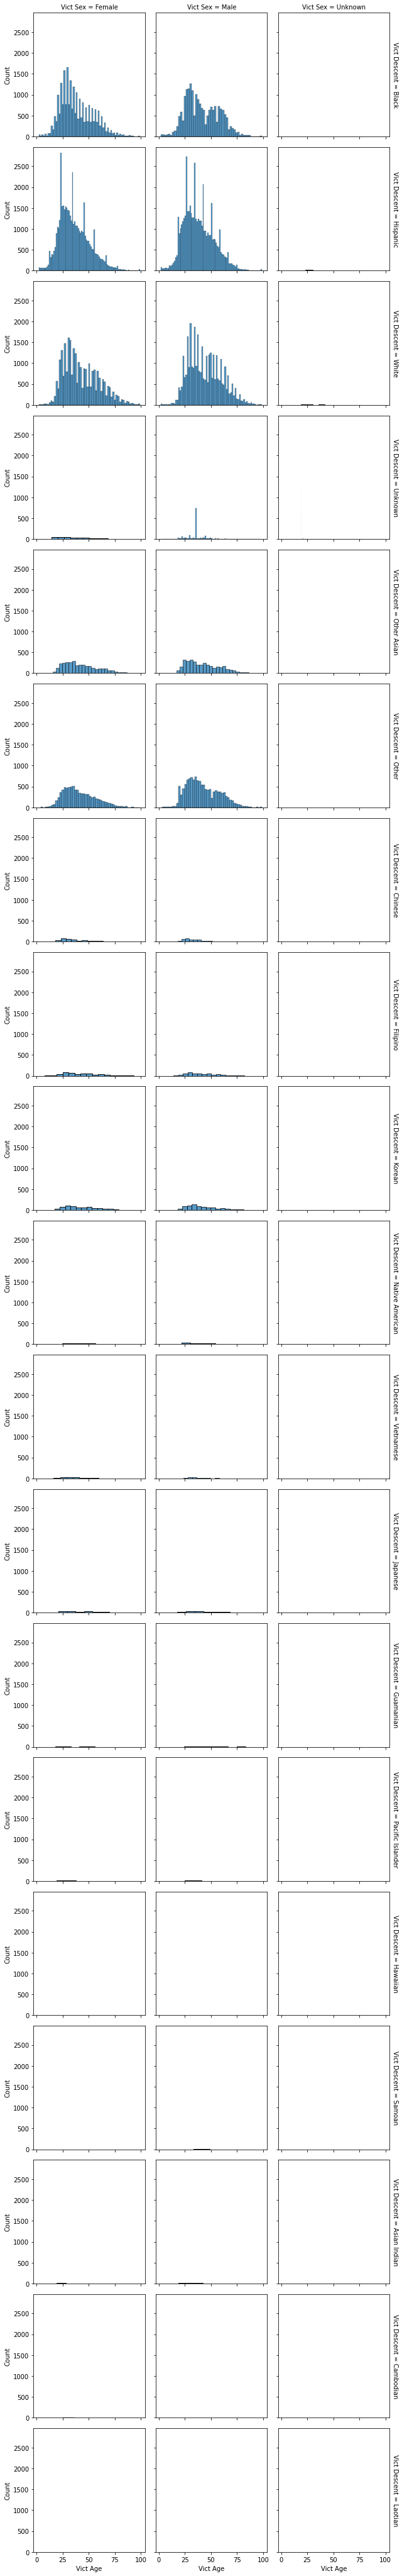

In [21]:
g=sns.FacetGrid(df_raw, col="Vict Sex", row="Vict Descent", margin_titles=True, despine=False)
g.map_dataframe(sns.histplot, x="Vict Age")

# **EDA on Los Angeles Crime Data in 2010 to 2019**

In [22]:
df_prev=pd.read_csv("Crime_Data_from_2010_to_2019.csv")

In [23]:
df_prev.head()

DR_NO               Date Rptd  ...      LAT       LON
0    1307355  02/20/2010 12:00:00 AM  ...  33.9825 -118.2695
1   11401303  09/13/2010 12:00:00 AM  ...  33.9599 -118.3962
2   70309629  08/09/2010 12:00:00 AM  ...  34.0224 -118.2524
3   90631215  01/05/2010 12:00:00 AM  ...  34.1016 -118.3295
4  100100501  01/03/2010 12:00:00 AM  ...  34.0387 -118.2488

[5 rows x 28 columns]

Dropping columns which are not required

In [24]:
df_prev.drop(['Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'], axis='columns', inplace=True)

In [25]:
df_prev = df_prev.dropna()

In [26]:
df_prev=df_prev.replace({"Vict Descent":{"A": "Other Asian", "B":"Black", "C":"Chinese", "D": "Cambodian", "F":"Filipino", "G":"Guamanian", "H":"Hispanic", 
                "I":"Native American", "J" : "Japanese" ,"K" : "Korean", "L" :"Laotian", "O": "Other",
                "P": "Pacific Islander", "S": "Samoan", "U": "Hawaiian", "V":"Vietnamese", "W": "White", "X": "Unknown", "Z":"Asian Indian"}})

df_prev=df_prev.replace({"Vict Sex":{"M": "Male", "F":"Female", "X":"Unknown"}})

##**Univariate Analysis**

In [27]:
fig=px.histogram(df_prev,x="Vict Age",nbins=100,labels={"Vict Age":"Victim's Age"})

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Distribution doesnot contain negative age

In [28]:
fig=px.histogram(df_prev,x="Vict Age",nbins=10,labels={"Vict Age":"Victim's Age"})

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [29]:
fig=px.histogram(df_prev,x="Vict Sex",labels={"Vict Sex":"Victim's Sex"},color_discrete_map={
                "F": "red",
                "M": "green",
                "X": "blue",
                "H": "goldenrod"})

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
fig=px.histogram(df_prev,x="Vict Descent",labels={"Vict Descent":"Victim's Decent"},color_discrete_sequence=px.colors.qualitative.Antique)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
fig=px.histogram(df_raw,x="AREA NAME",labels={"AREA NAME":"Area of Crime"}, color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [32]:
fig=px.histogram(df_prev,y="Crm Cd Desc",labels={"Crm Cd Desc":"Description of Crime"}, color_discrete_sequence=px.colors.qualitative.Bold)

fig.show()

Removing all genders except Male,Female and Unknown.


In [ ]:

df_prev = df_prev[df_prev['Vict Sex'] != "H"]
df_prev = df_prev[df_prev['Vict Sex'] != "-"]
df_prev = df_prev[df_prev['Vict Sex'] != "N"]

##**Multivariate Analysis**

In [ ]:
g=sns.FacetGrid(df_prev, col="Vict Sex", row="Vict Descent", margin_titles=True, despine=False)
g.map_dataframe(sns.histplot, x="Vict Age")

Removing 0 age values

In [ ]:
df_prev=df_prev[df_prev['Vict Age']!=0]

In [ ]:
g=sns.FacetGrid(df_prev, col="Vict Sex", row="Vict Descent", margin_titles=True, despine=False)
g.map_dataframe(sns.histplot, x="Vict Age")

# **EDA on Crime Arrest Dataset**

In [60]:
df_arrest = pd.read_csv('arrest-data-from-2010-to-present.csv')

In [62]:
df_arrest.head()

Report ID  ... Neighborhood Councils (Certified)
0    5666847  ...                              85.0
1    5666688  ...                              10.0
2    5666570  ...                              39.0
3    5666529  ...                              78.0
4    5666742  ...                              16.0

[5 rows x 23 columns]

In [63]:
df_arrest=df_arrest.replace({"Descent Code":{"A": "Other Asian", "B":"Black", "C":"Chinese", "D": "Cambodian", "F":"Filipino", "G":"Guamanian", "H":"Hispanic", 
                "I":"Native American", "J" : "Japanese" ,"K" : "Korean", "L" :"Laotian", "O": "Other",
                "P": "Pacific Islander", "S": "Samoan", "U": "Hawaiian", "V":"Vietnamese", "W": "White", "X": "Unknown", "Z":"Asian Indian"}})



# **Inter Crime Dataset Question 1**
#**Which is the safest area to live in during different time periods on the Basis of Crime Rate**

Converting column datatype to date and time

In [37]:
df_raw['Date Rptd']=pd.to_datetime(df_raw['Date Rptd'])
df_prev['Date Rptd']=pd.to_datetime(df_prev['Date Rptd'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Converting lower case names to upper case names to match with geojson file

In [38]:
df_raw['AREA NAME']=df_raw['AREA NAME'].str.upper()
df_prev['AREA NAME']=df_prev['AREA NAME'].str.upper()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df_prev.rename(columns={"AREA NAME":"Area"}, inplace = True)
df_raw.rename(columns={"AREA NAME":"Area"}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Data for 2020

In [40]:
vis1=df_raw[df_raw['Date Rptd'].dt.year==2020]
vis1=vis1.groupby('Area').size().reset_index(name="CrimeRate")
vis1['CrimeRate']=vis1['CrimeRate'].div(10135614)
vis1['CrimeRate']=vis1['CrimeRate'].mul(100000)
vis1['year']=2020

Data for 2010

In [41]:
vis2=df_prev[df_prev['Date Rptd'].dt.year==2010]
vis2=vis2.groupby('Area').size().reset_index(name="CrimeRate")
vis2['CrimeRate']=vis2['CrimeRate'].div(9822121)
vis2['CrimeRate']=vis2['CrimeRate'].mul(100000)
vis2['year']=2010

Data for 2015

In [42]:
vis3=df_prev[df_prev['Date Rptd'].dt.year==2015]
vis3=vis3.groupby('Area').size().reset_index(name="CrimeRate")
vis3['CrimeRate']=vis3['CrimeRate'].div(10124800)
vis3['CrimeRate']=vis3['CrimeRate'].mul(100000)
vis3['year']=2015

In [43]:
frames = [vis1, vis3, vis2]

result = pd.concat(frames)

In [46]:
result.to_csv("crimeRate.csv")

In [ ]:
import json
json_file_path = "LAPD_Divisions.geojson"
with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

In [ ]:
import plotly.express as px
fig = px.choropleth(result, geojson=contents, color="CrimeRate",facet_col="year",
                    locations="Area", featureidkey="properties.APREC",
                    projection="mercator" ,color_continuous_scale=px.colors.sequential.Plasma
                     ,labels={"CrimeRate":"Crime Rate"}
                   )
fig.update_geos(fitbounds="locations", visible=False)

#fig.add_scattergeo(
#  geojson=contents,
#  locations = vis1['Area'],
 # text = vis1['Area'],
 # featureidkey="properties.APREC",
 # mode = 'text') 
#fig.layout.font.family="Times New Roman"
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

#**Inter Crime Dataset Question 2** 

#**What type of ethnic community is most likely to fall victim compared to ethnic community most likely commit crimes?**

In [68]:

df_crime = df_prev[['Area', 'Vict Descent']]
df_crime = df_crime.groupby(["Area", "Vict Descent"]).size().reset_index(name="count")
print(" \nCount total NaN at each column in a crime DataFrame : \n\n", df_crime.isnull().sum())

df_arrest = df_arrest[['Area Name', 'Descent Code']]
df_arrest= df_arrest.groupby(["Area Name", "Descent Code"]).size().reset_index(name="count")
print(" \nCount total NaN at each column in a crime DataFrame : \n\n", df_arrest.isnull().sum())

 
Count total NaN at each column in a crime DataFrame : 

 Area            0
Vict Descent    0
count           0
dtype: int64
 
Count total NaN at each column in a crime DataFrame : 

 Area Name       0
Descent Code    0
count           0
dtype: int64


In [71]:
fig = px.scatter(df_arrest, x="Area Name", y="count", color="Descent Code", symbol="Descent Code" ,labels={"Descent Code": "Ethnicity"})
fig.update_traces(marker_size=10)
fig.show()

In [74]:
fig = px.scatter(df_crime, x="Area", y="count", color="Vict Descent", symbol="Vict Descent",labels={"Vict Descent": "Ethnicity"})
fig.update_traces(marker_size=10)
fig.show()

#**Intra Crime and Other Datasets Analysis**

## **Question 1: Are most frequent crimes in LA due to poverty?**

 
Count total NaN at each column in a crime DataFrame : 

 DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            114900
Vict Age                0
Vict Sex            95053
Vict Descent        95072
Premis Cd              38
Premis Desc            38
Weapon Used Cd     701766
Weapon Desc        701767
Status                  2
Status Desc             0
Crm Cd 1                4
Crm Cd 2           983594
Crm Cd 3          1047440
Crm Cd 4          1048537
LOCATION                0
Cross Street       875978
LAT                     0
LON                     0
dtype: int64


 Crimes Count




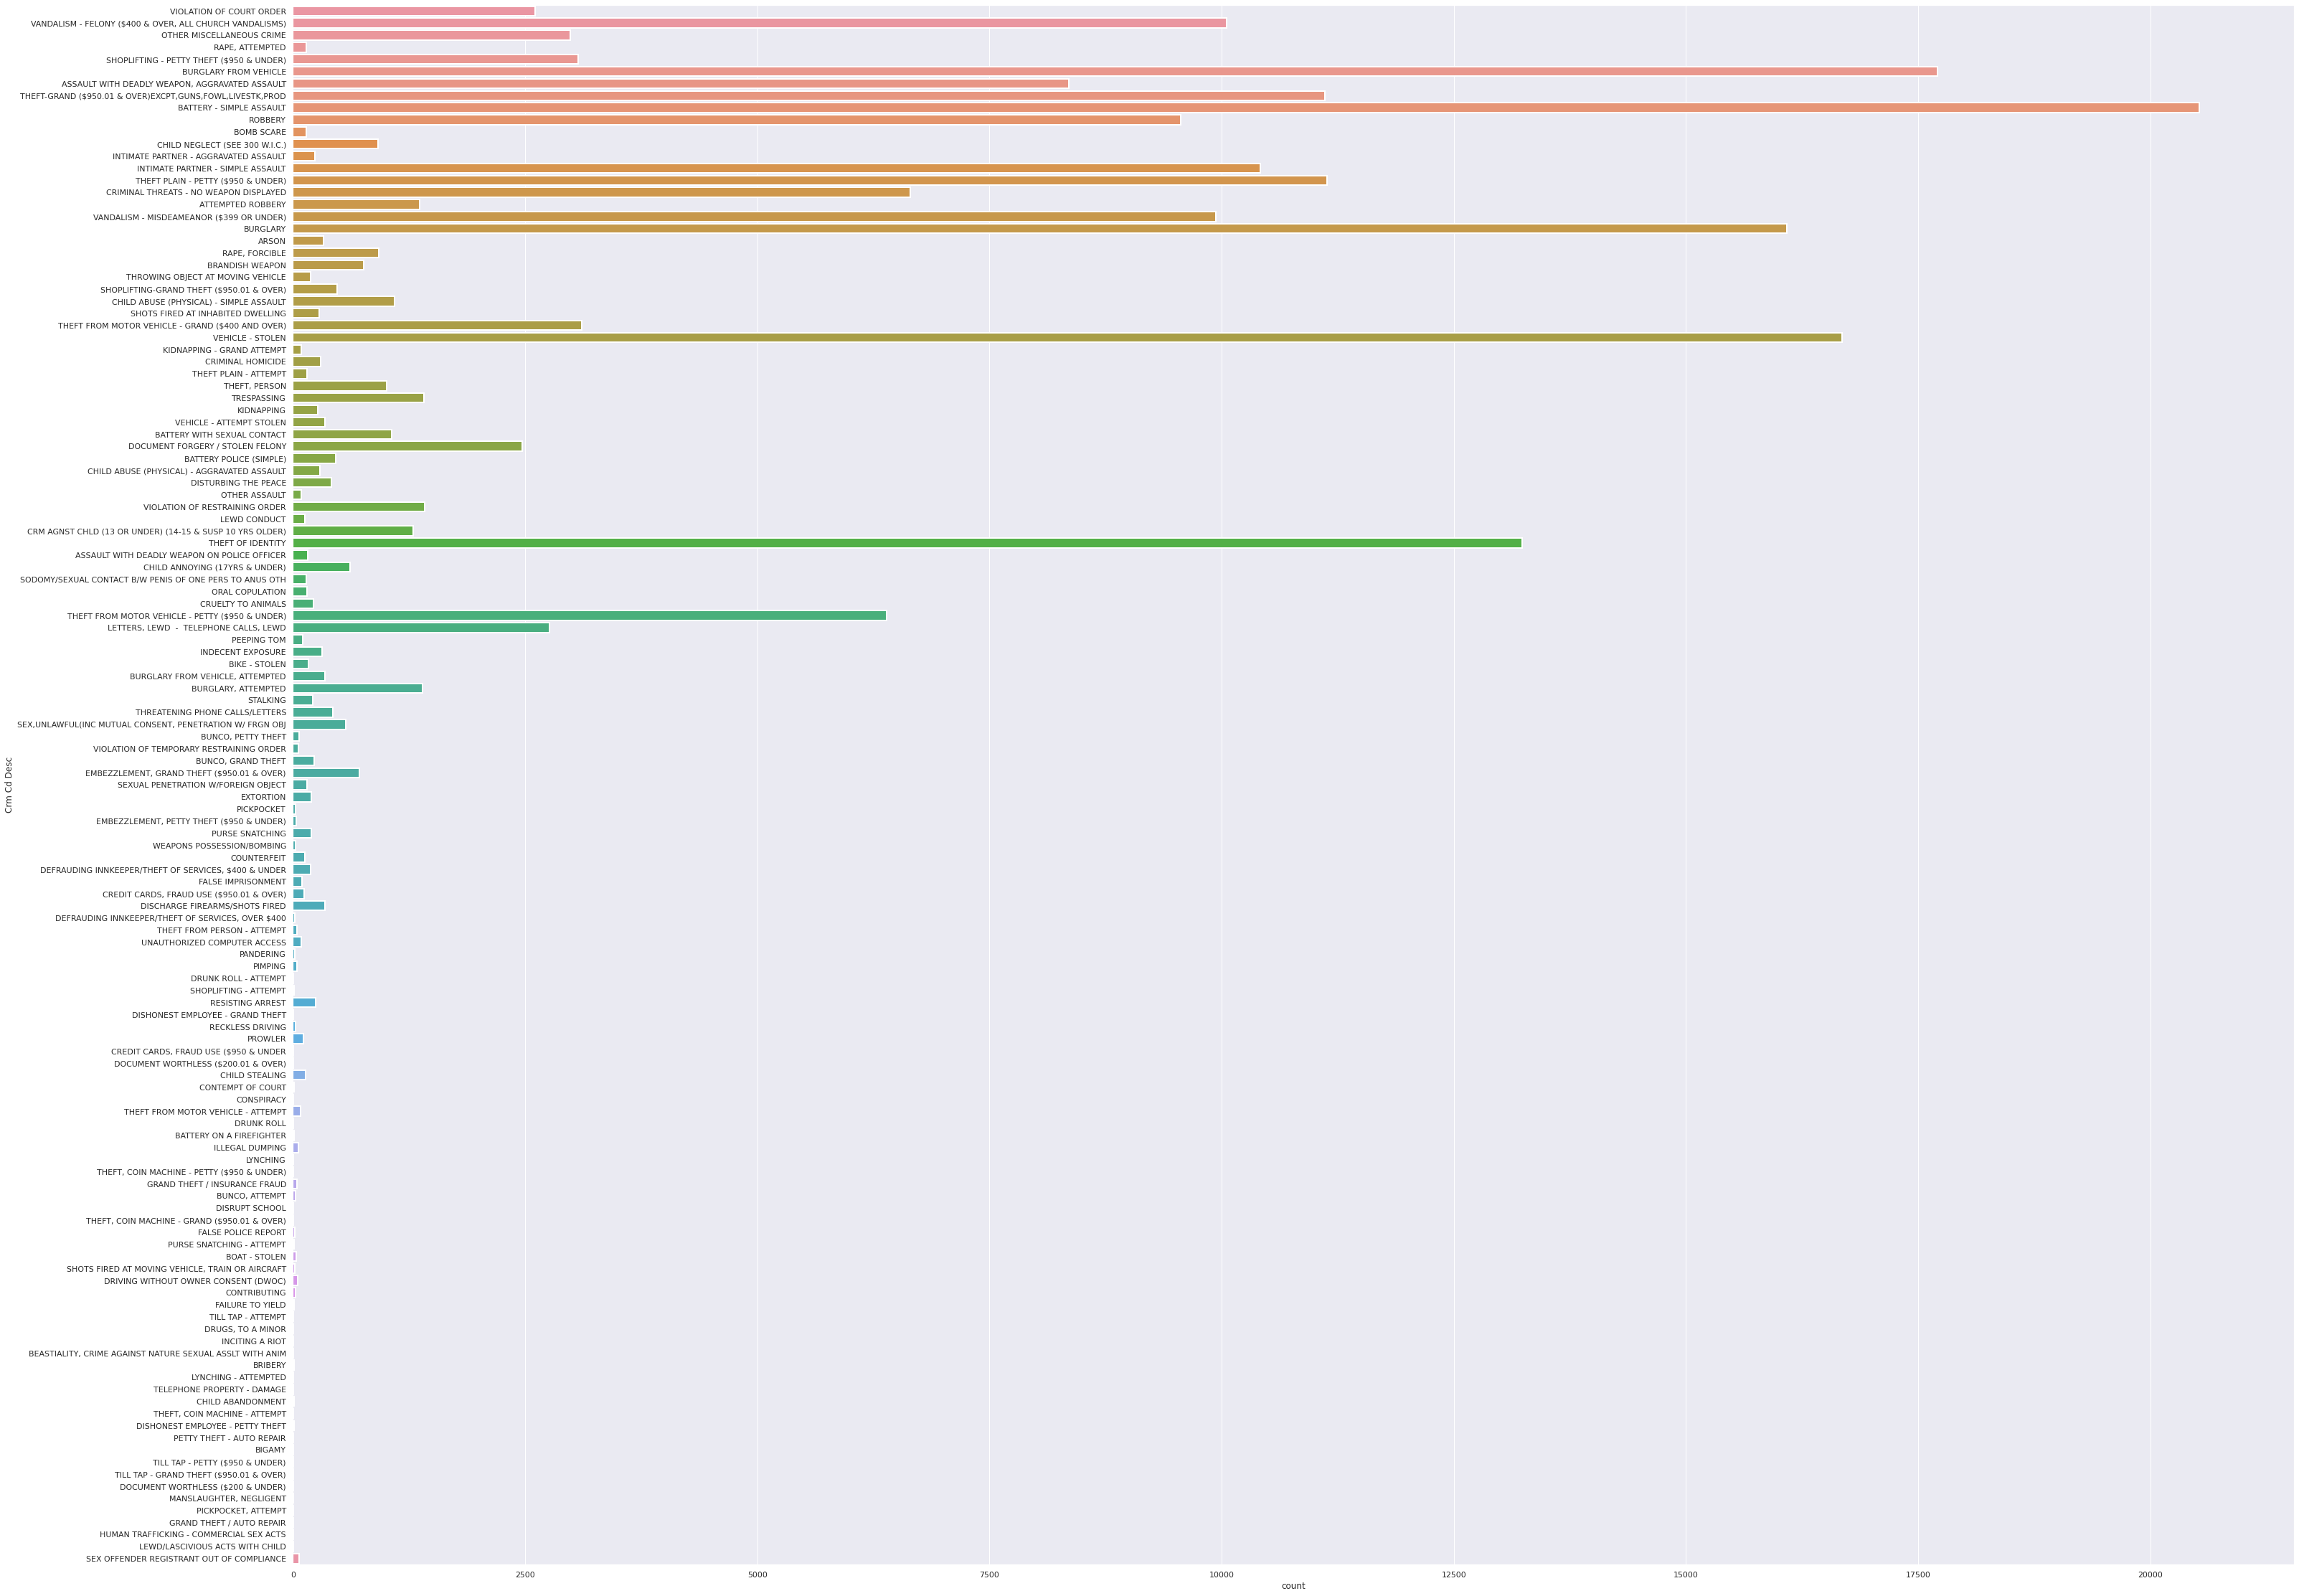

In [ ]:
df_crime = pd.read_csv('/content/gdrive/My Drive/Crime_Data_from_2010_to_2019.csv')
print(" \nCount total NaN at each column in a crime DataFrame : \n\n", df_crime.isnull().sum())
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC']).dt.date
df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
df_crime = df_crime.loc[df_crime['year'] == 2010]
print("\n\n Crimes Count\n\n")
ax1 = sns.countplot(y="Crm Cd Desc", data=df_crime, linewidth=2)
ax1 = sns.set(rc={'figure.figsize':(50, 30)})
df_crime = df_crime.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'})
list = ['BURGLARY', 'BURGLARY FROM VEHICLE', 'BATTERY - SIMPLE ASSAULT']
df_crime = df_crime[df_crime['Crm_Cd_Desc'].isin(list)]



 Crimes Count in areas




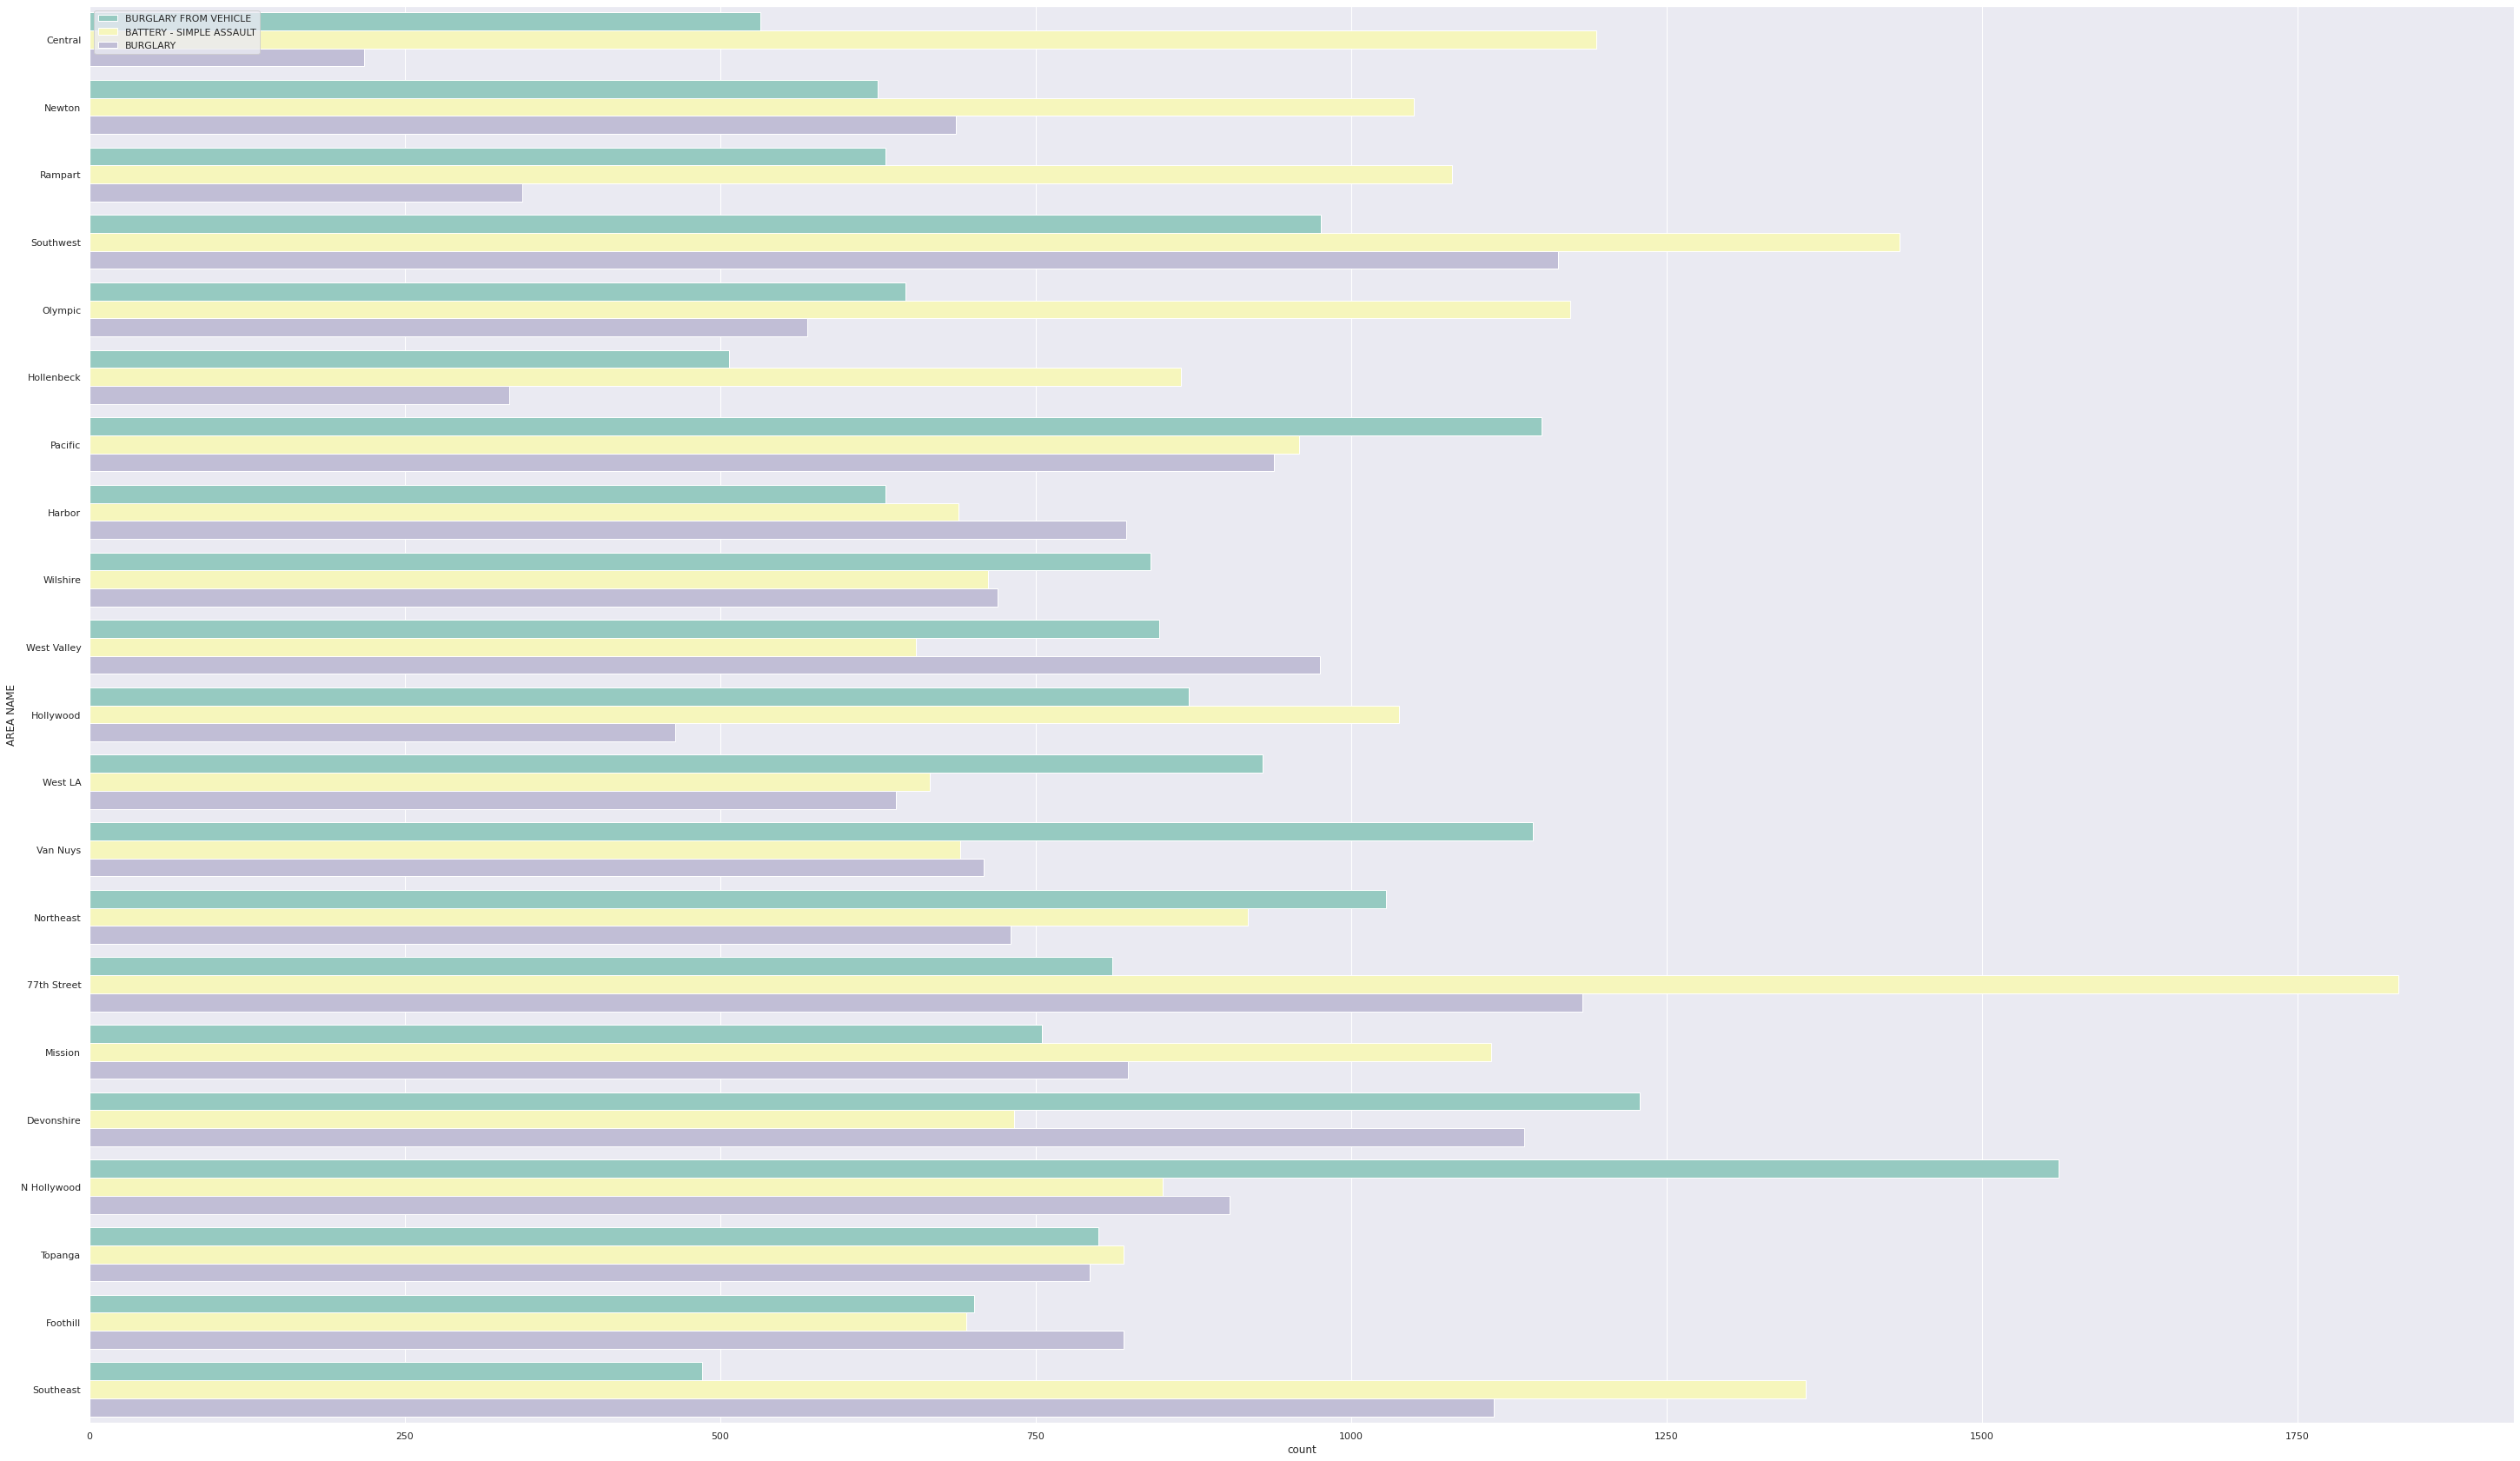

In [ ]:
print("\n\n Crimes Count in areas\n\n")
ax = sns.countplot(y="AREA NAME", hue="Crm_Cd_Desc", data=df_crime, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper left')

In [ ]:
df_census_poverty = pd.read_csv('/content/gdrive/My Drive/census-data-by-neighborhood-council.csv')
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_census_poverty.isnull().sum())
df_census_poverty = df_census_poverty.drop(['Hispanic_pop'], axis=1)
print("\n\n Poverty Stricken Areas\n\n")
fig = px.scatter(df_census_poverty, x=df_census_poverty.index, y=df_census_poverty['In_Poverty'], color=df_census_poverty['NC_Name'])
fig.show()

 
Count total NaN at each column in a DataFrame : 

 NC_Name              0
Total Population     0
White_pop            0
Black_pop            0
Ameri_es_pop         0
Asian_pop            0
Hawn_pi_pop          0
Hispanic_pop        97
Other_pop            0
Multi_pop            0
In_Poverty           0
Owner_occ            0
Renter_occ           0
dtype: int64


 Poverty Stricken Areas




## **Question 2: Does crimes actually take place in the areas where police receives most crimes calls?**

**Year 2010**

 
Count total NaN at each column in a DataFrame : 

 DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            114900
Vict Age                0
Vict Sex            95053
Vict Descent        95072
Premis Cd              38
Premis Desc            38
Weapon Used Cd     701766
Weapon Desc        701767
Status                  2
Status Desc             0
Crm Cd 1                4
Crm Cd 2           983594
Crm Cd 3          1047440
Crm Cd 4          1048537
LOCATION                0
Cross Street       875978
LAT                     0
LON                     0
dtype: int64


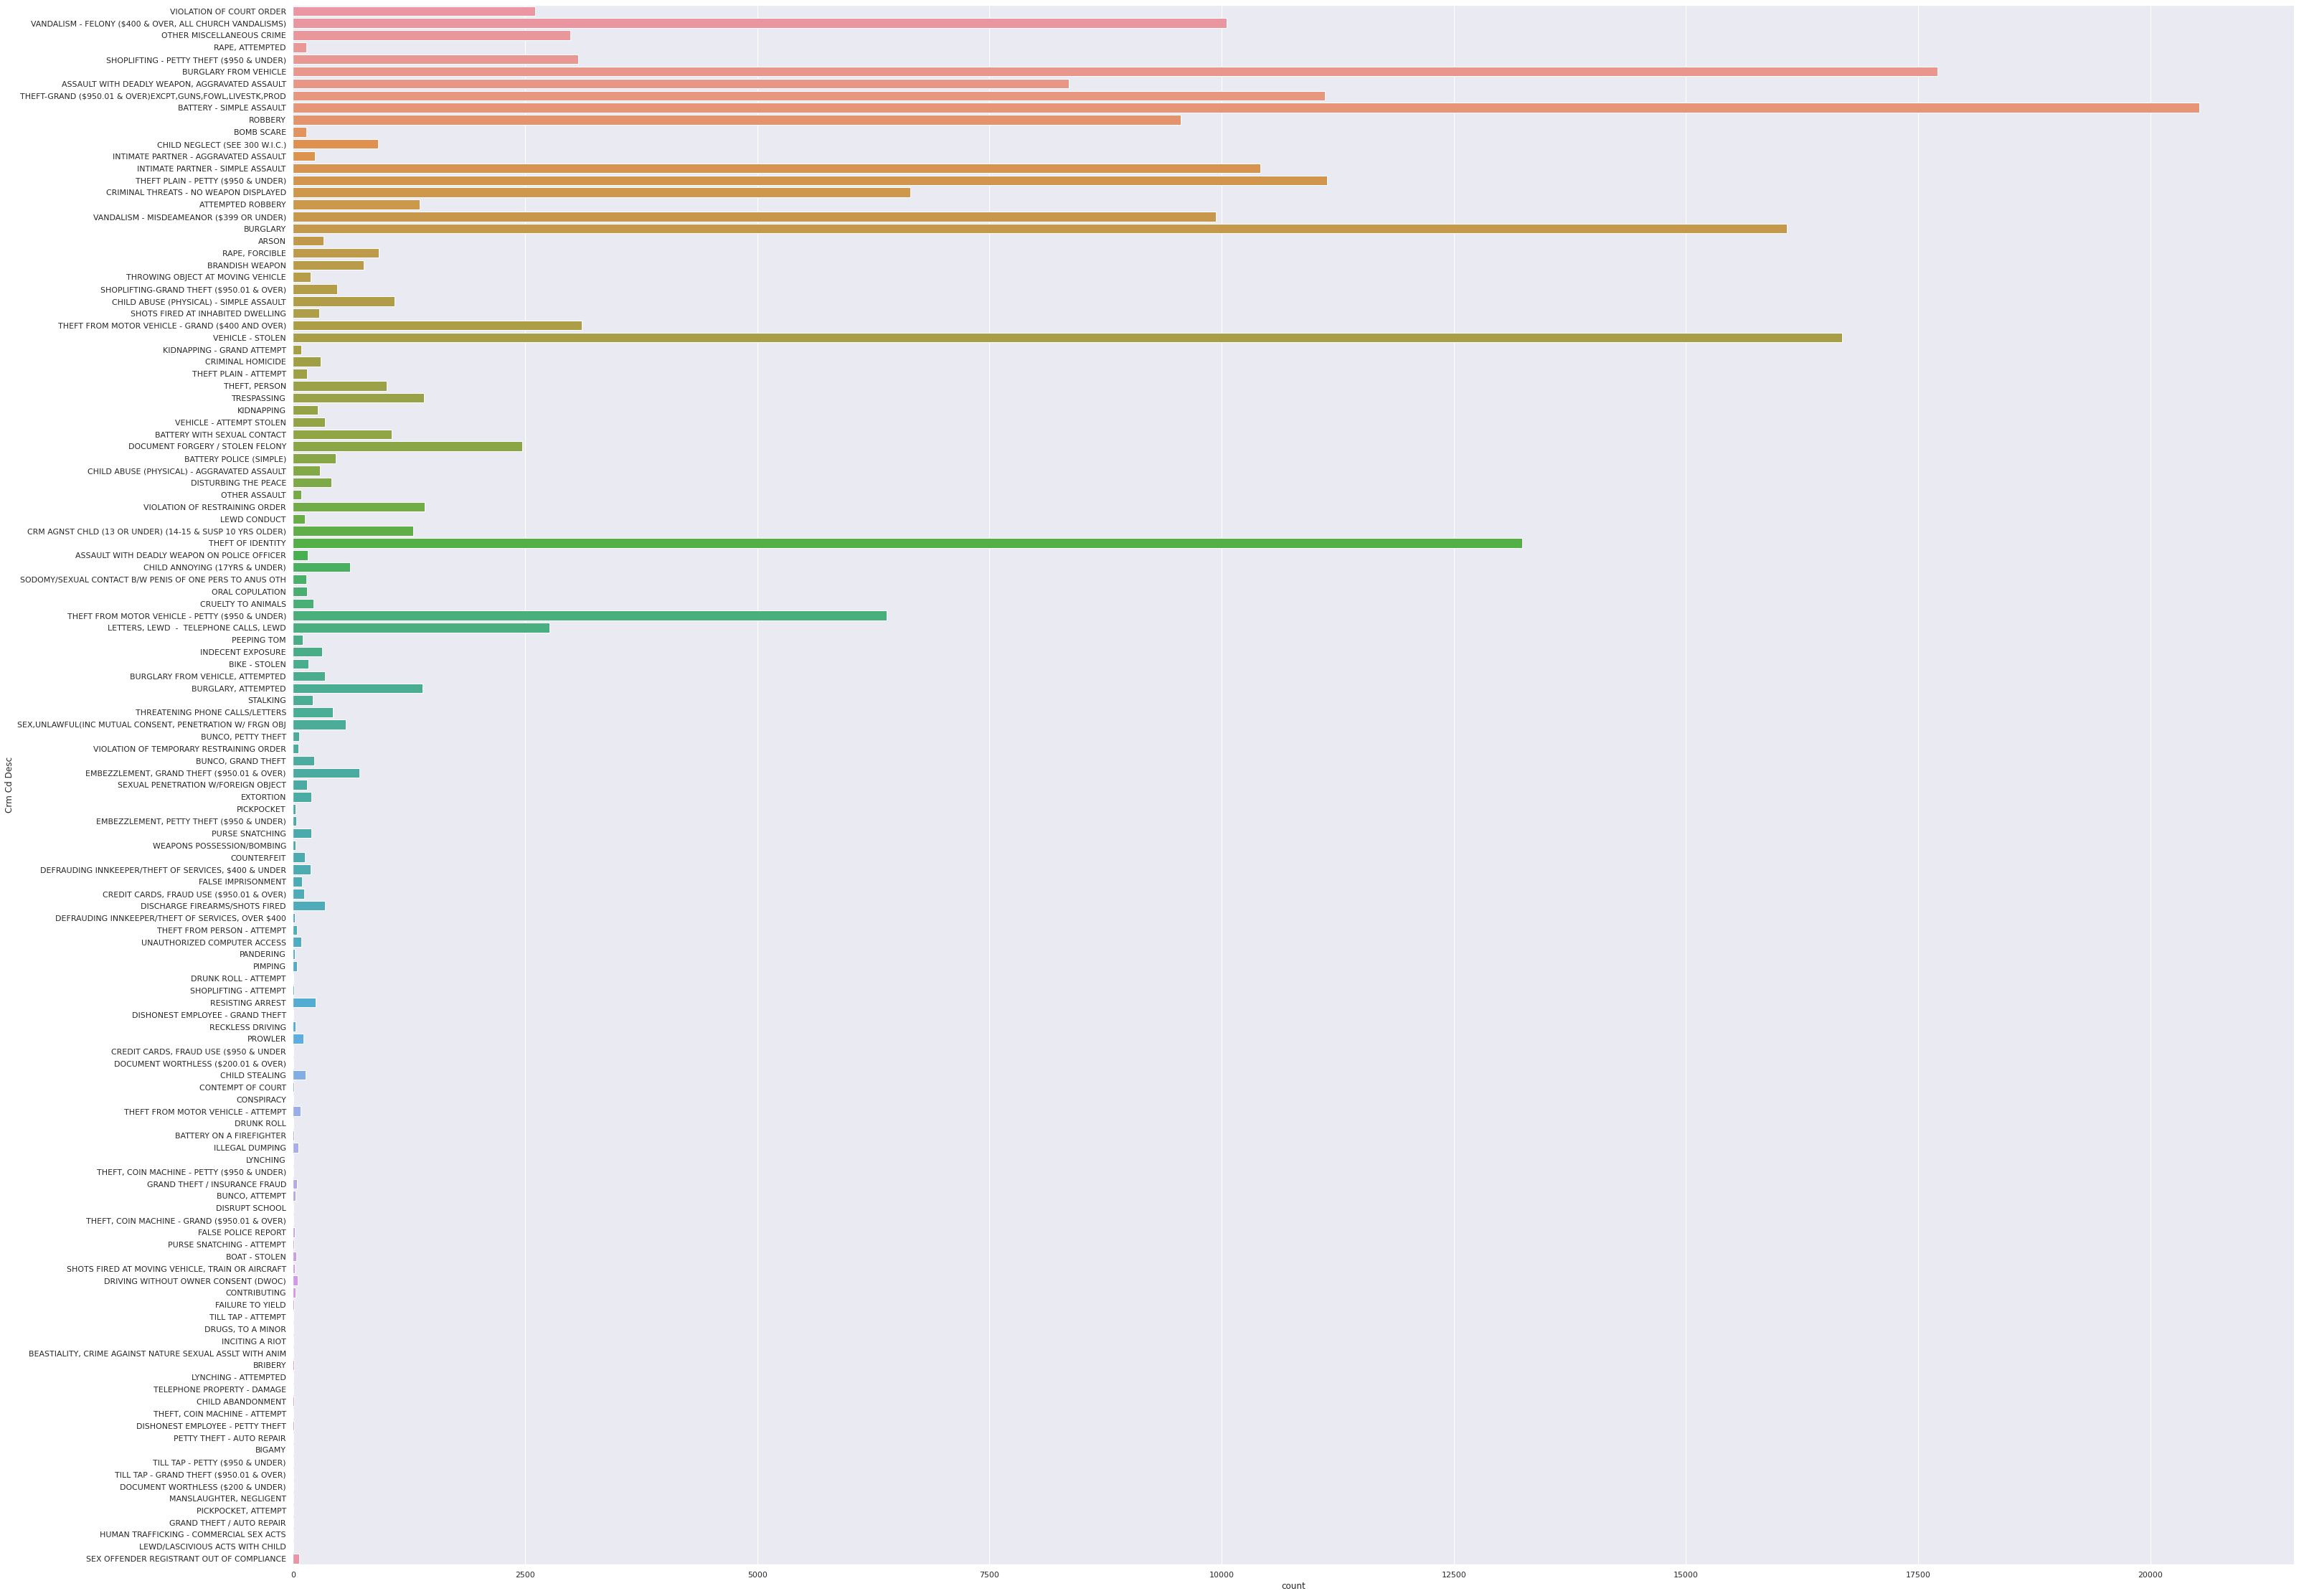

In [ ]:
df_crime = pd.read_csv('/content/gdrive/My Drive/Crime_Data_from_2010_to_2019.csv')
df_call = pd.read_csv('/content/gdrive/My Drive/lapd-calls-for-service-2010.csv')
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_crime.isnull().sum())
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC']).dt.date
df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
df_crime = df_crime.loc[df_crime['year'] == 2010]
ax = sns.countplot(y="Crm Cd Desc", data=df_crime, linewidth=1)
ax = sns.set(rc={'figure.figsize':(50, 40)})

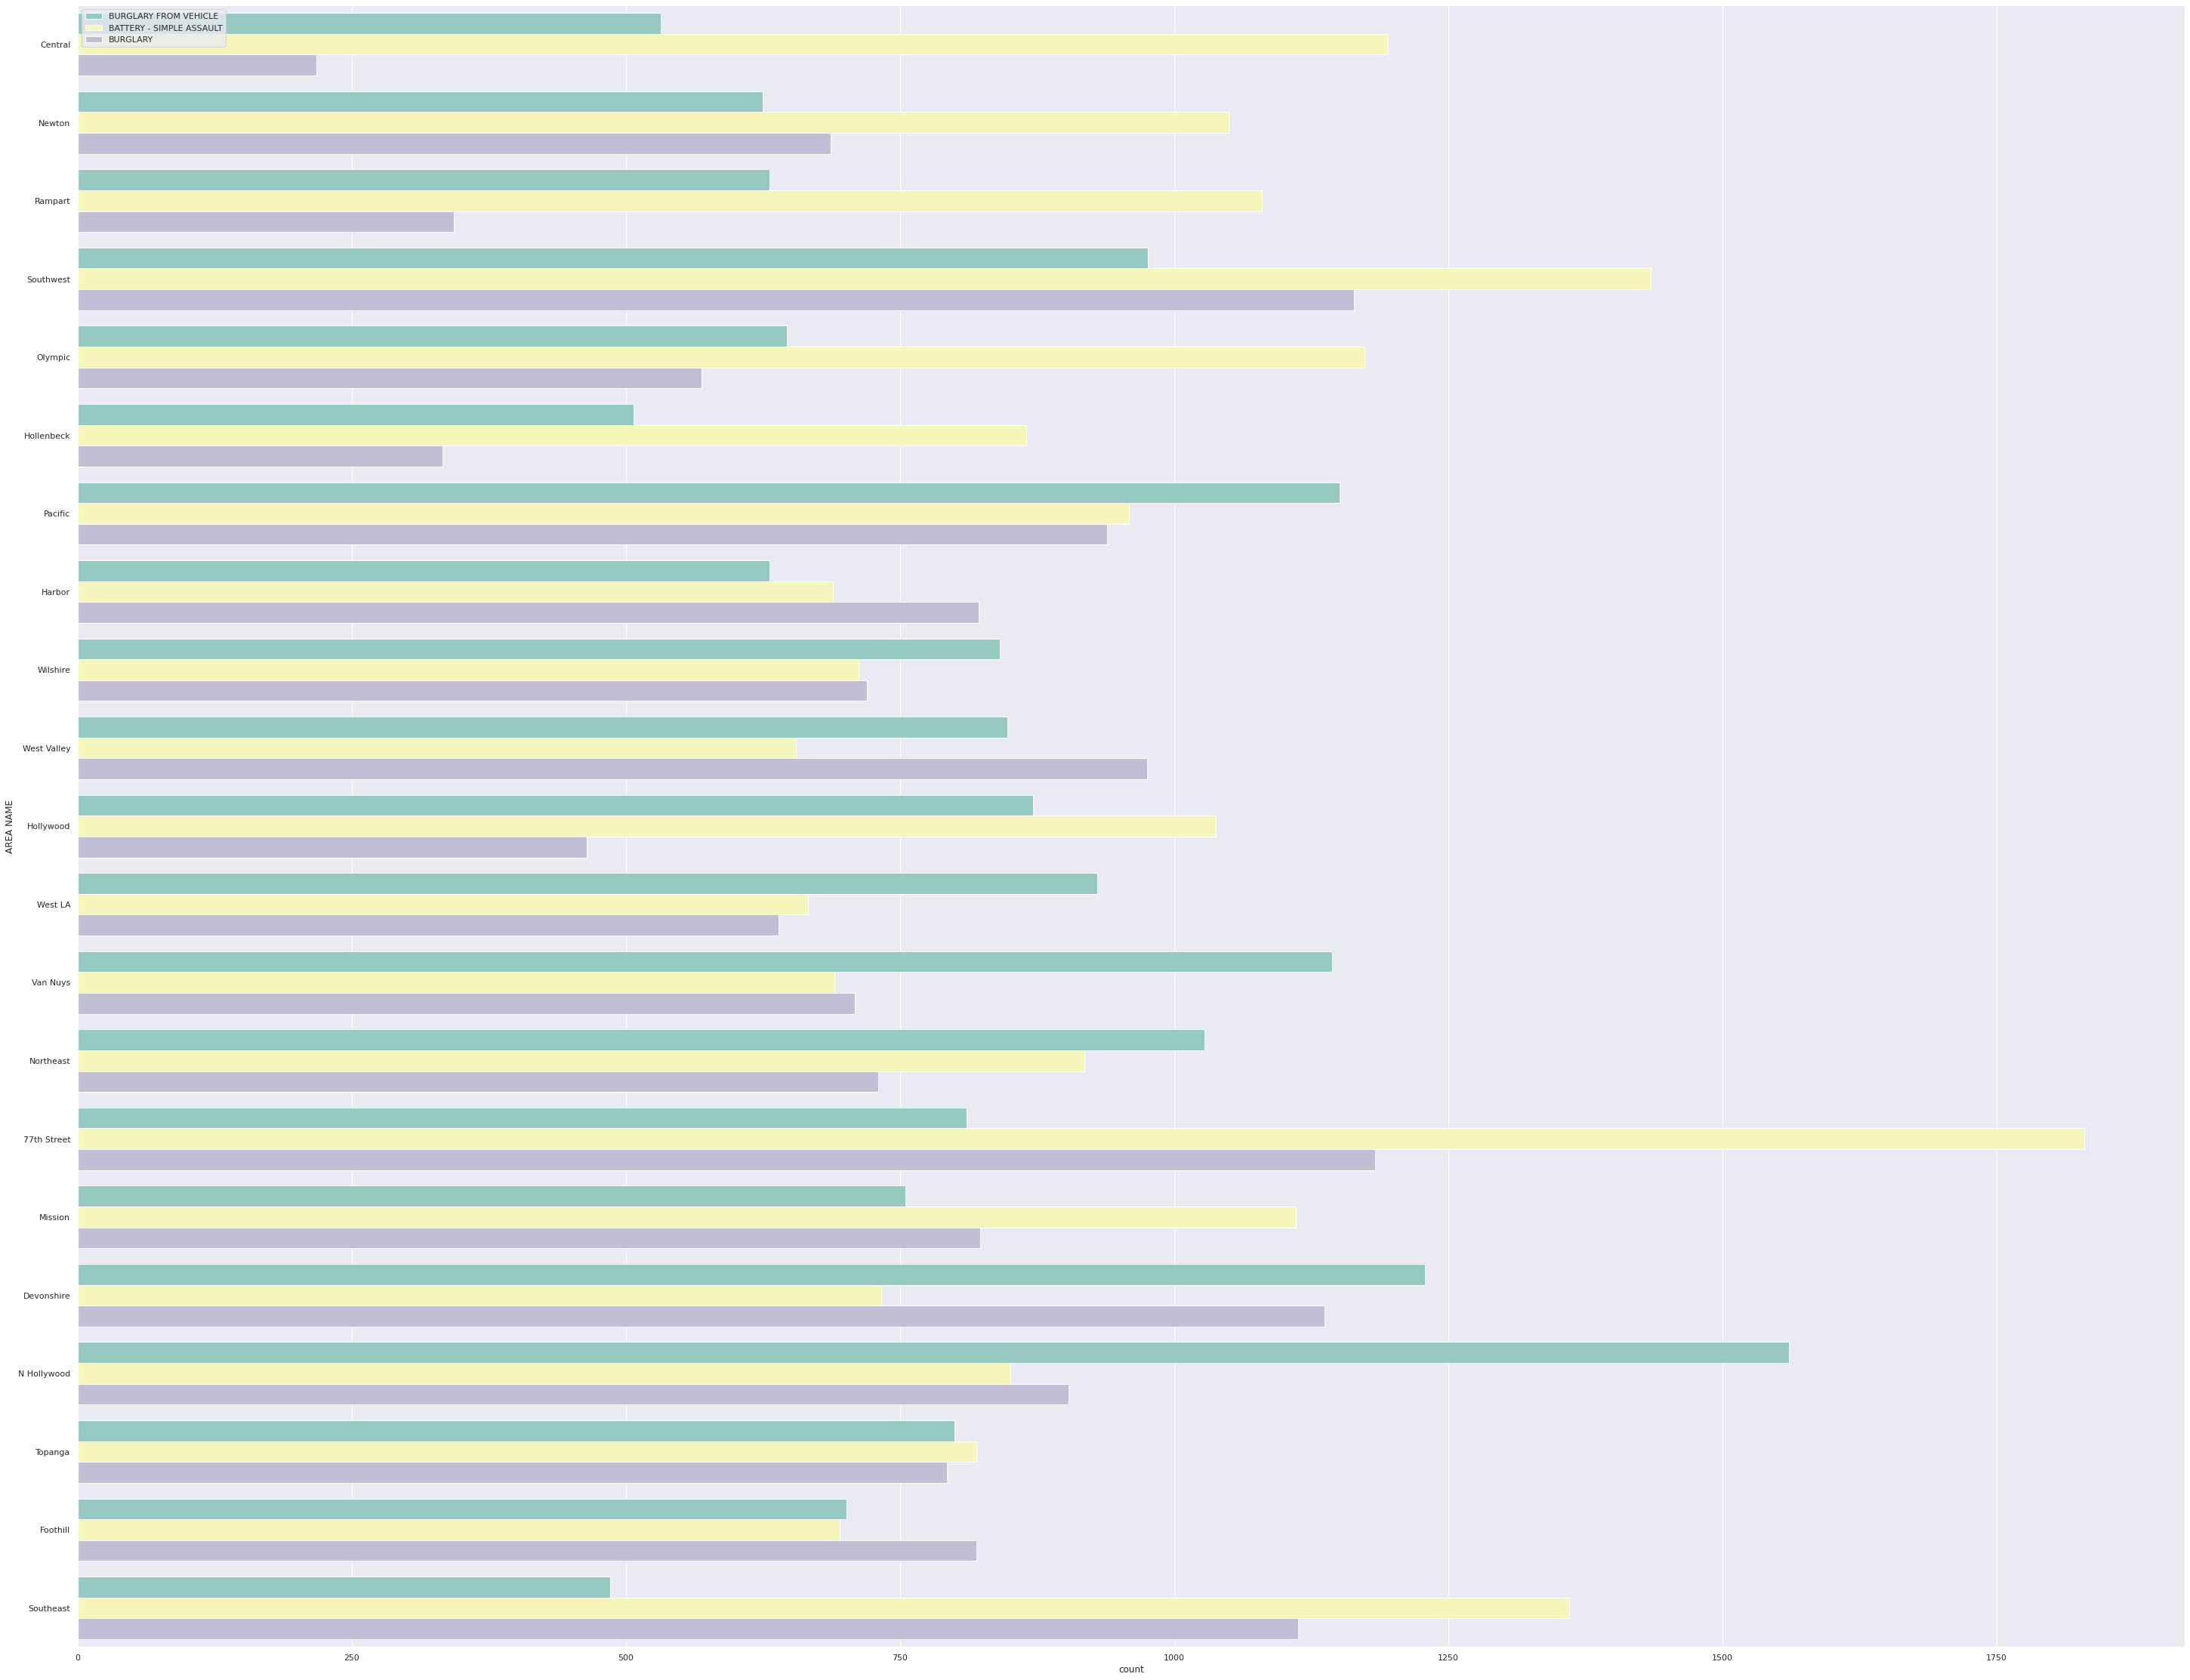

In [ ]:
df_crime = df_crime.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'})
list = ['BURGLARY', 'BURGLARY FROM VEHICLE', 'BATTERY - SIMPLE ASSAULT']
df_crime = df_crime[df_crime['Crm_Cd_Desc'].isin(list)]
ax = sns.countplot(y="AREA NAME", hue="Crm_Cd_Desc", data=df_crime, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper left')

 
Count total NaN at each column in a DataFrame : 

 Incident Number          0
Reporting District       0
Area Occurred            0
Dispatch Date            0
Dispatch Time            0
Call Type Code           0
Call Type Description    0
dtype: int64


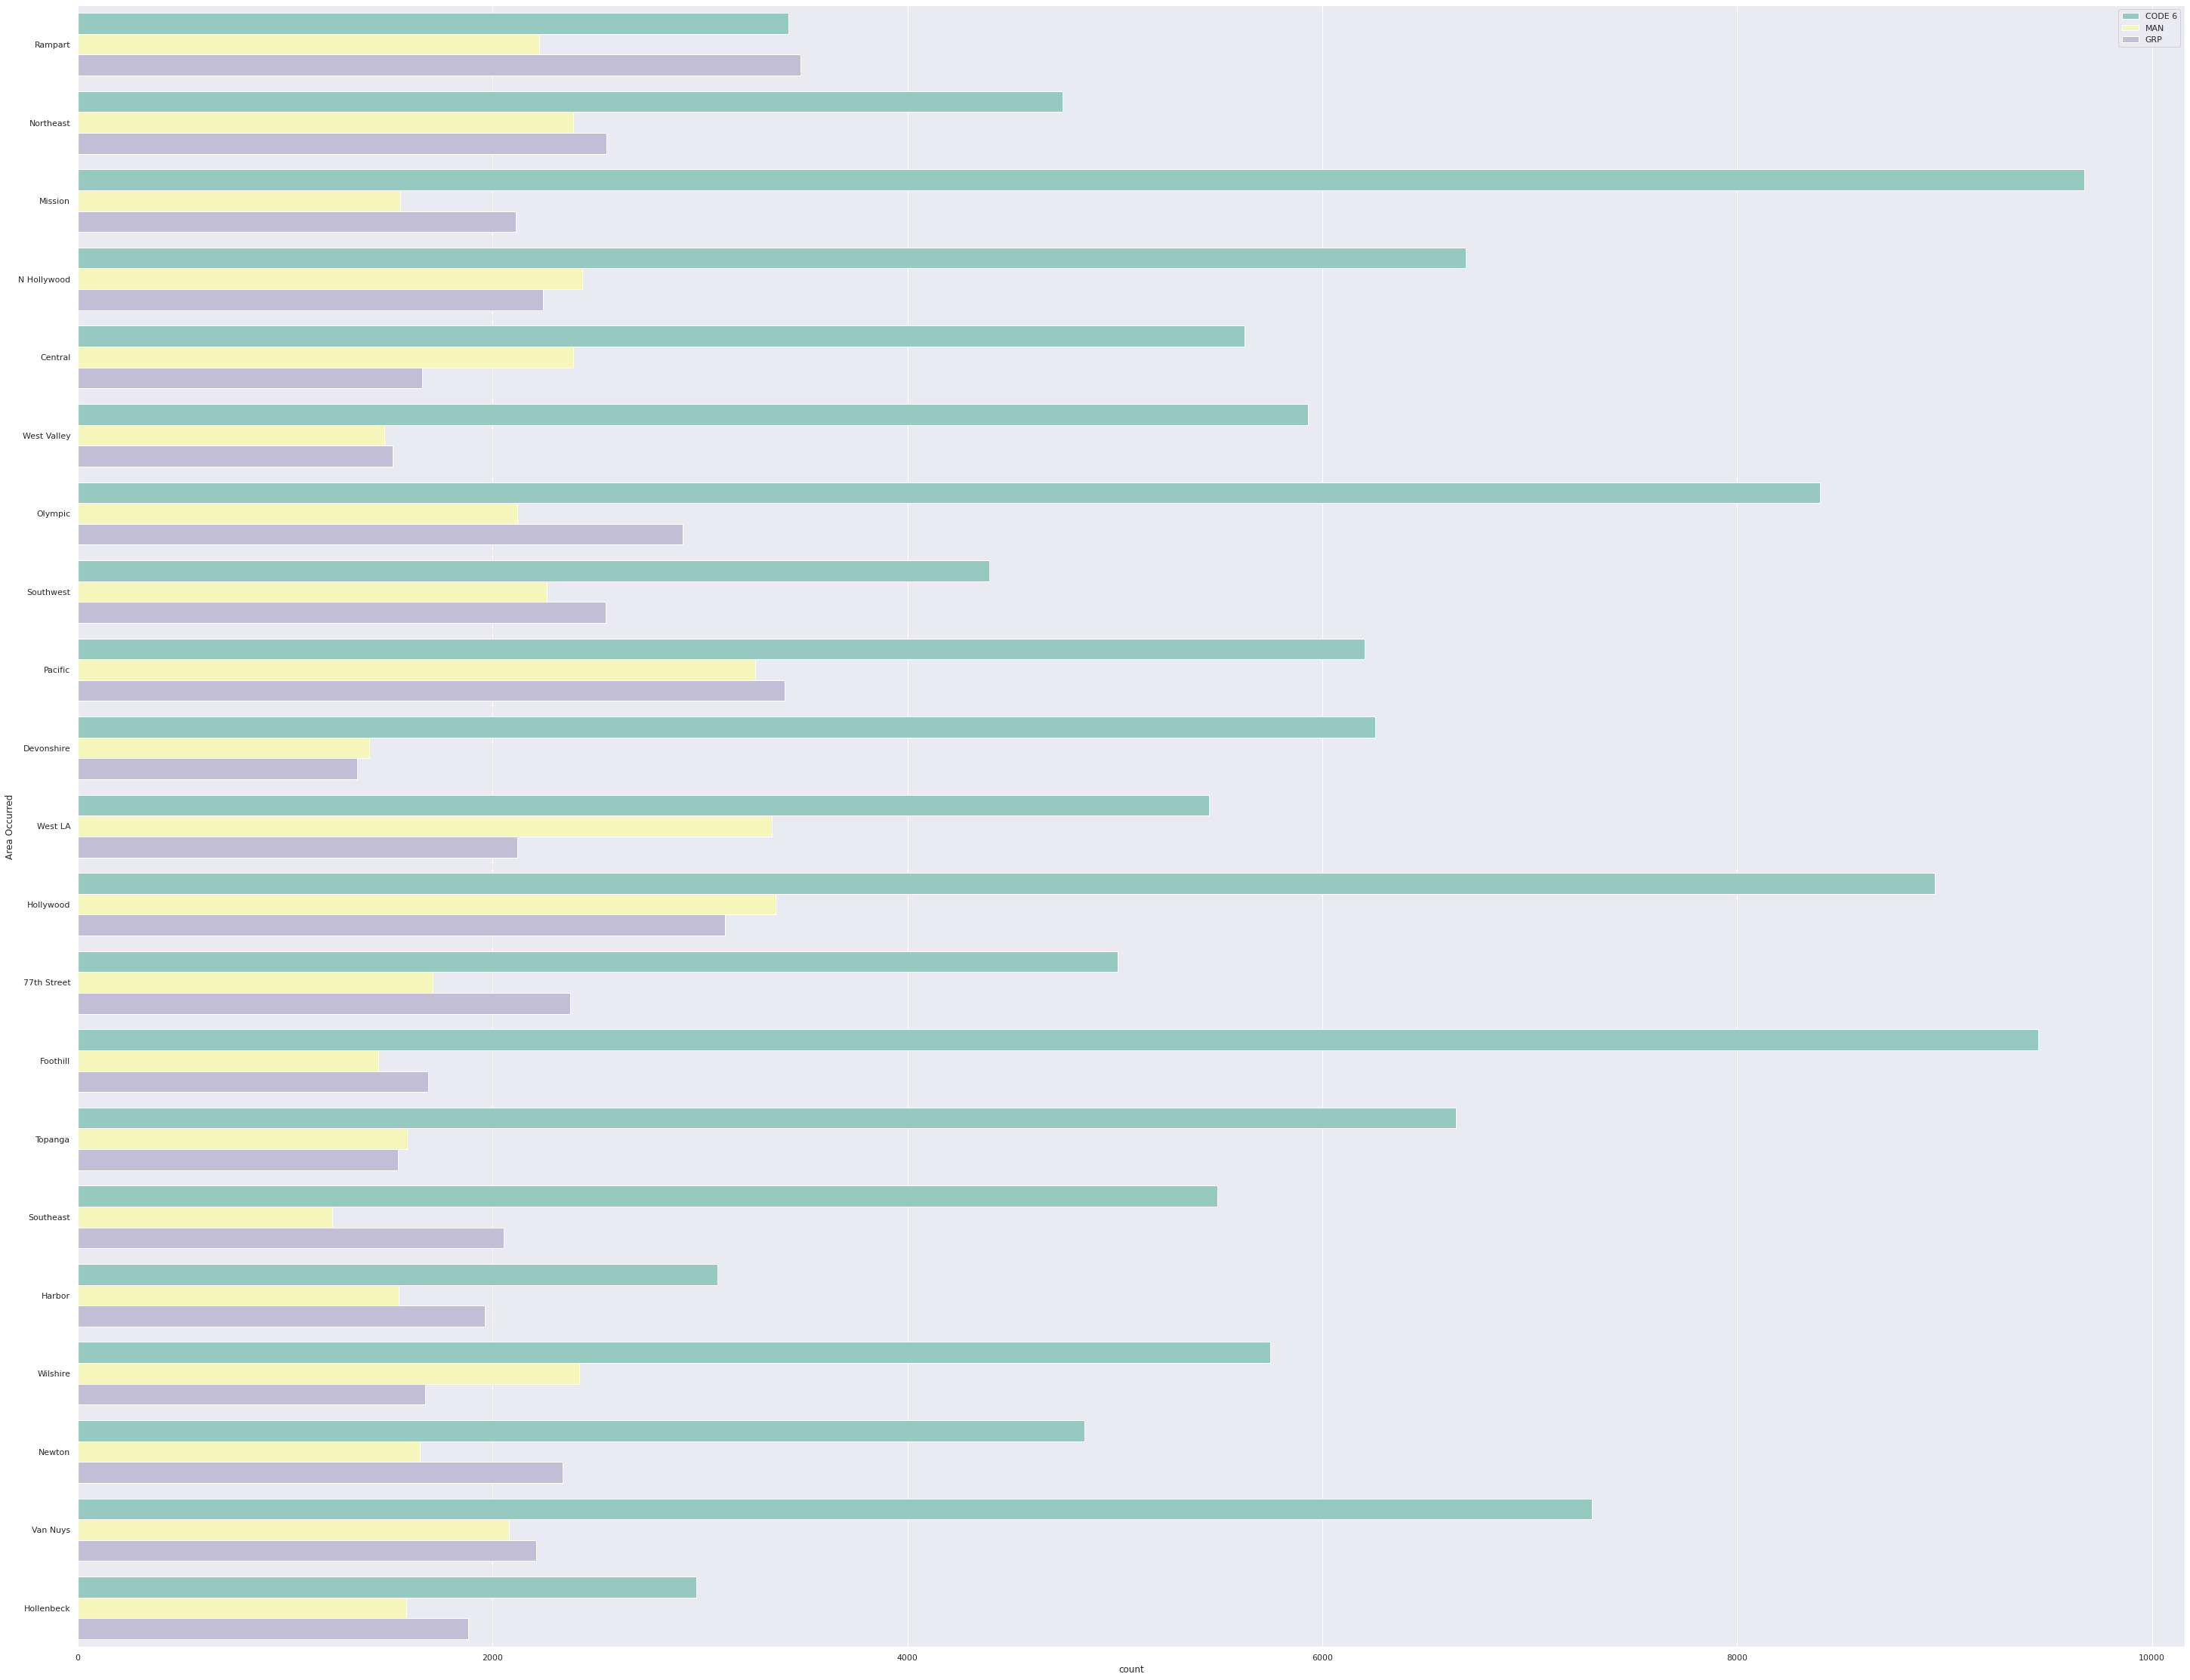

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_call.isnull().sum())
df_call = df_call.rename(columns={'Call Type Description': 'Call_Type_Description'})
df_call.Call_Type_Description.value_counts()
list = ['CODE 6', 'GRP', 'MAN']
df_call = df_call[df_call['Call_Type_Description'].isin(list)]
ax = sns.countplot(y="Area Occurred", hue="Call_Type_Description", data=df_call, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper right')

**Year 2011**

 
Count total NaN at each column in a DataFrame : 

 DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            114900
Vict Age                0
Vict Sex            95053
Vict Descent        95072
Premis Cd              38
Premis Desc            38
Weapon Used Cd     701766
Weapon Desc        701767
Status                  2
Status Desc             0
Crm Cd 1                4
Crm Cd 2           983594
Crm Cd 3          1047440
Crm Cd 4          1048537
LOCATION                0
Cross Street       875978
LAT                     0
LON                     0
dtype: int64


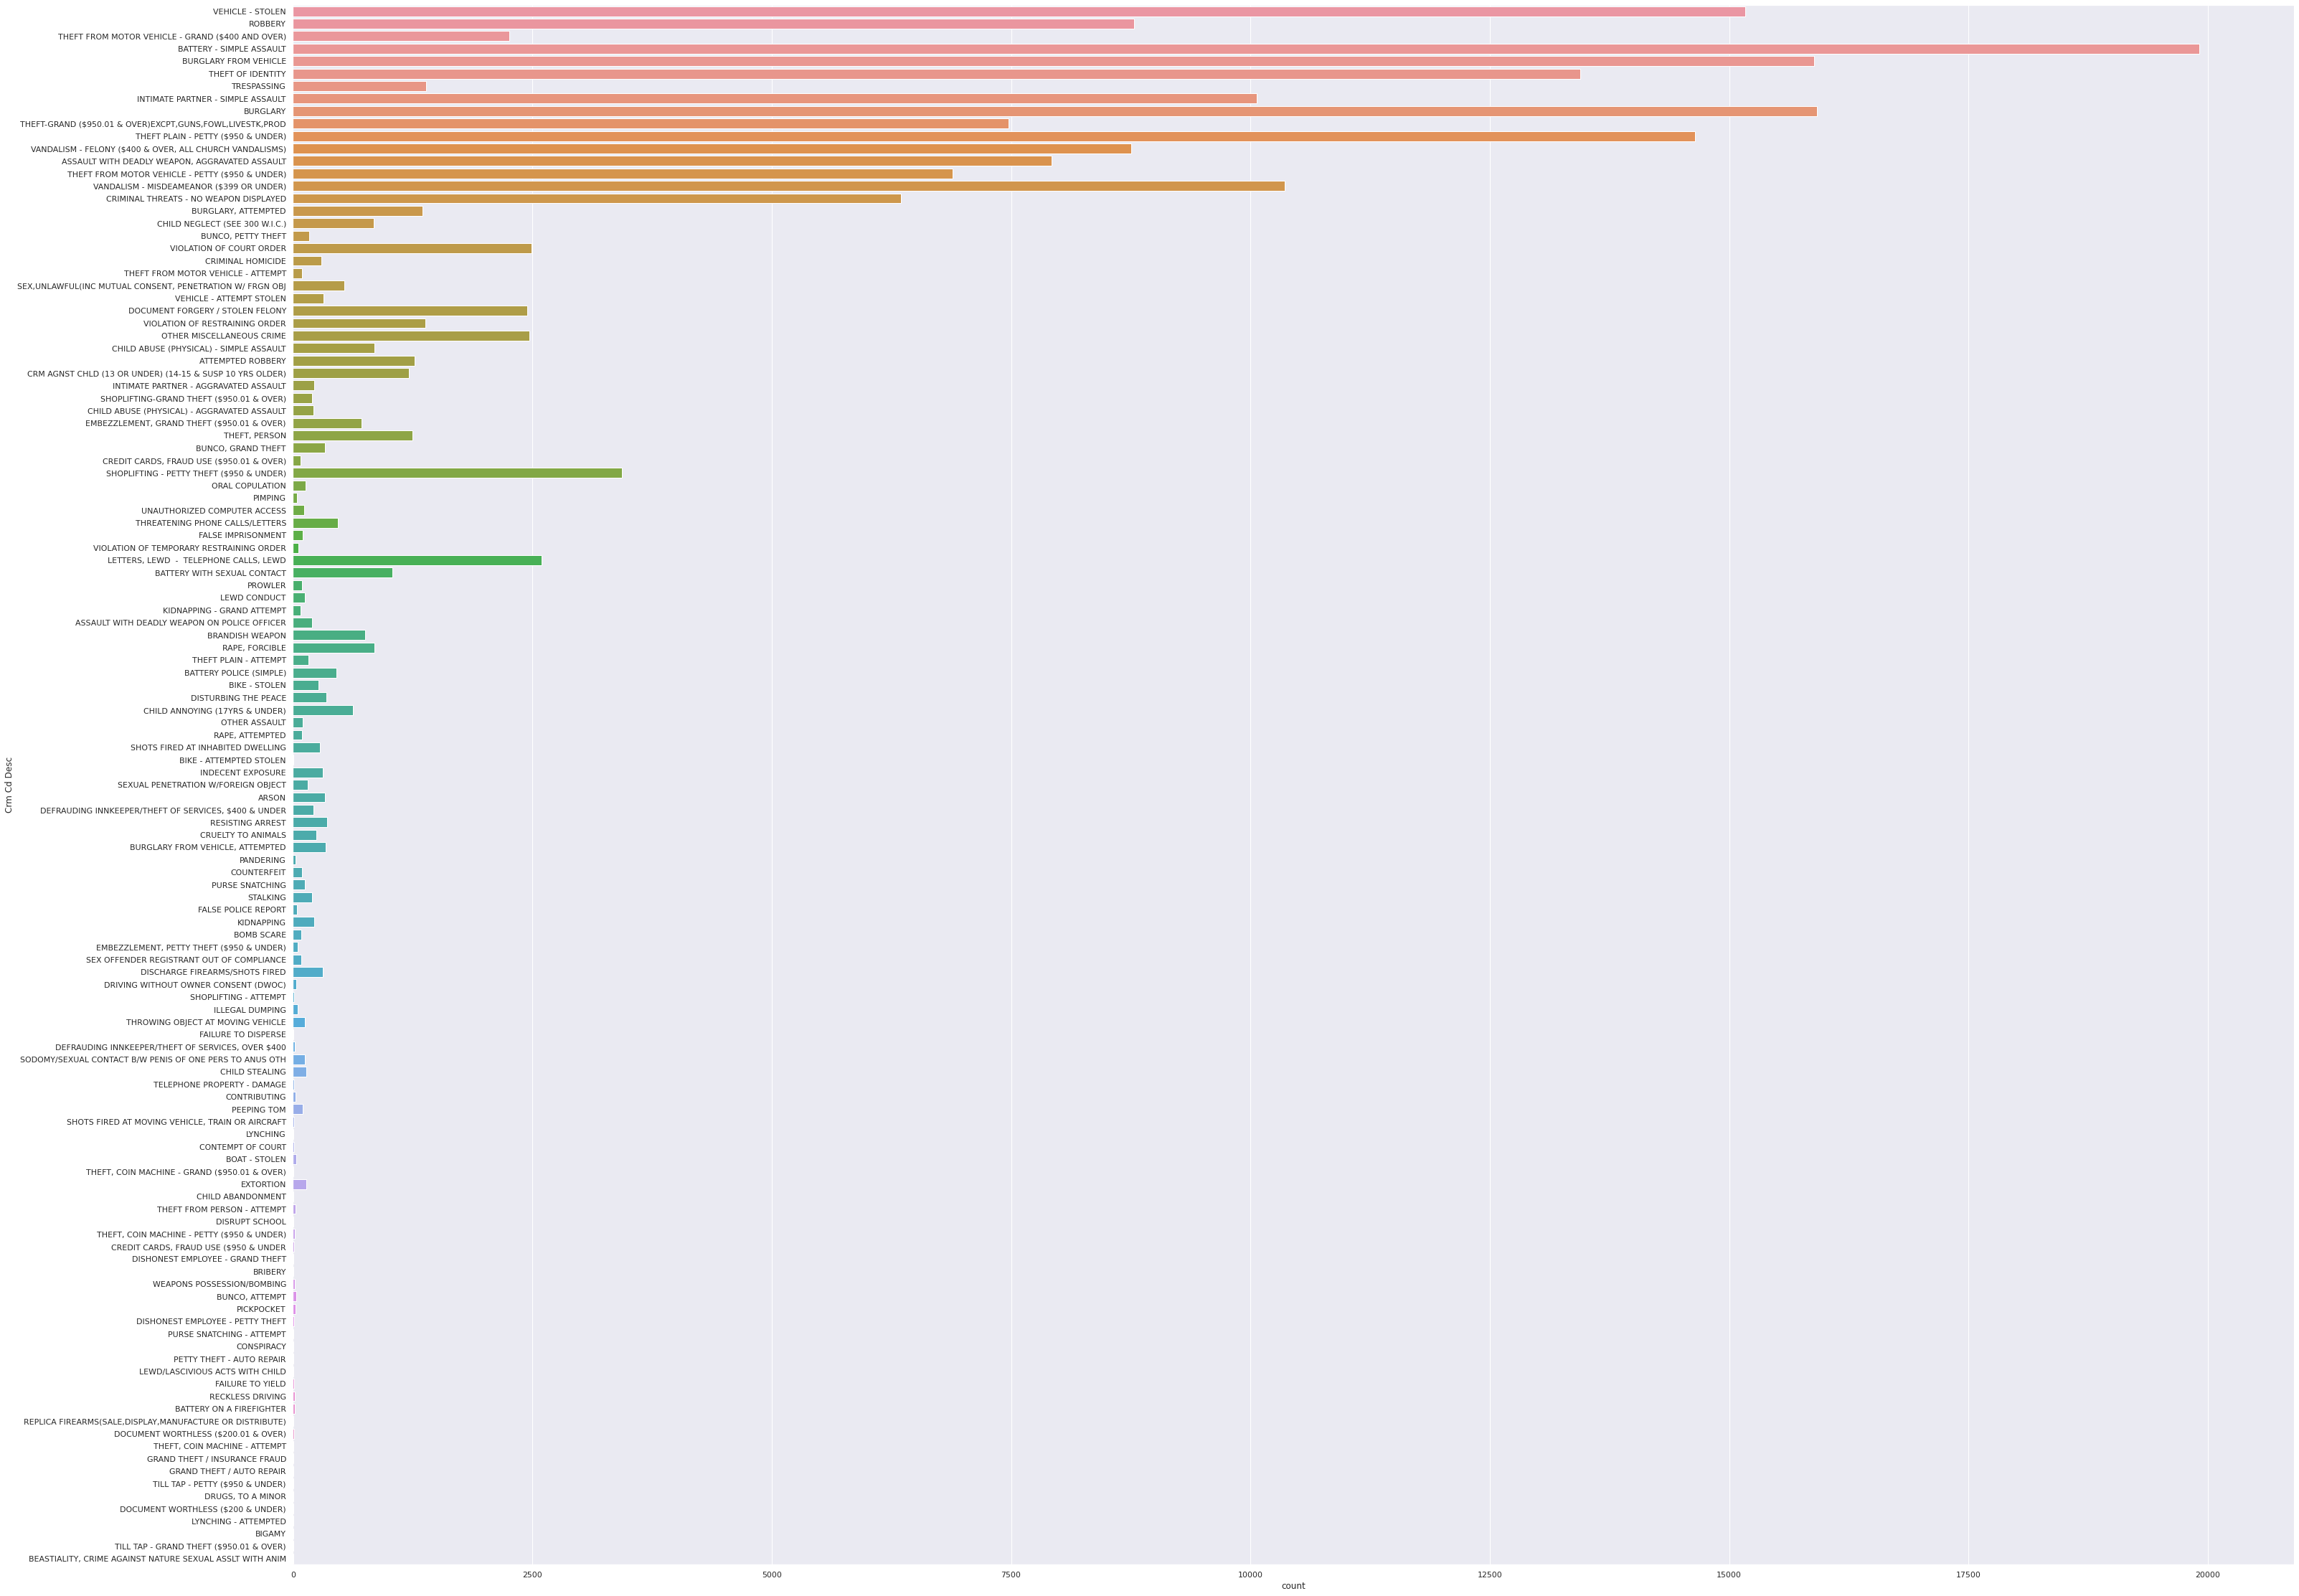

In [ ]:
df_crime = pd.read_csv('/content/gdrive/My Drive/Crime_Data_from_2010_to_2019.csv')
df_call = pd.read_csv('/content/gdrive/My Drive/lapd-calls-for-service-2011.csv')
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_crime.isnull().sum())
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC']).dt.date
df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
df_crime = df_crime.loc[df_crime['year'] == 2011]
ax = sns.countplot(y="Crm Cd Desc", data=df_crime, linewidth=1)
ax = sns.set(rc={'figure.figsize':(50, 40)})

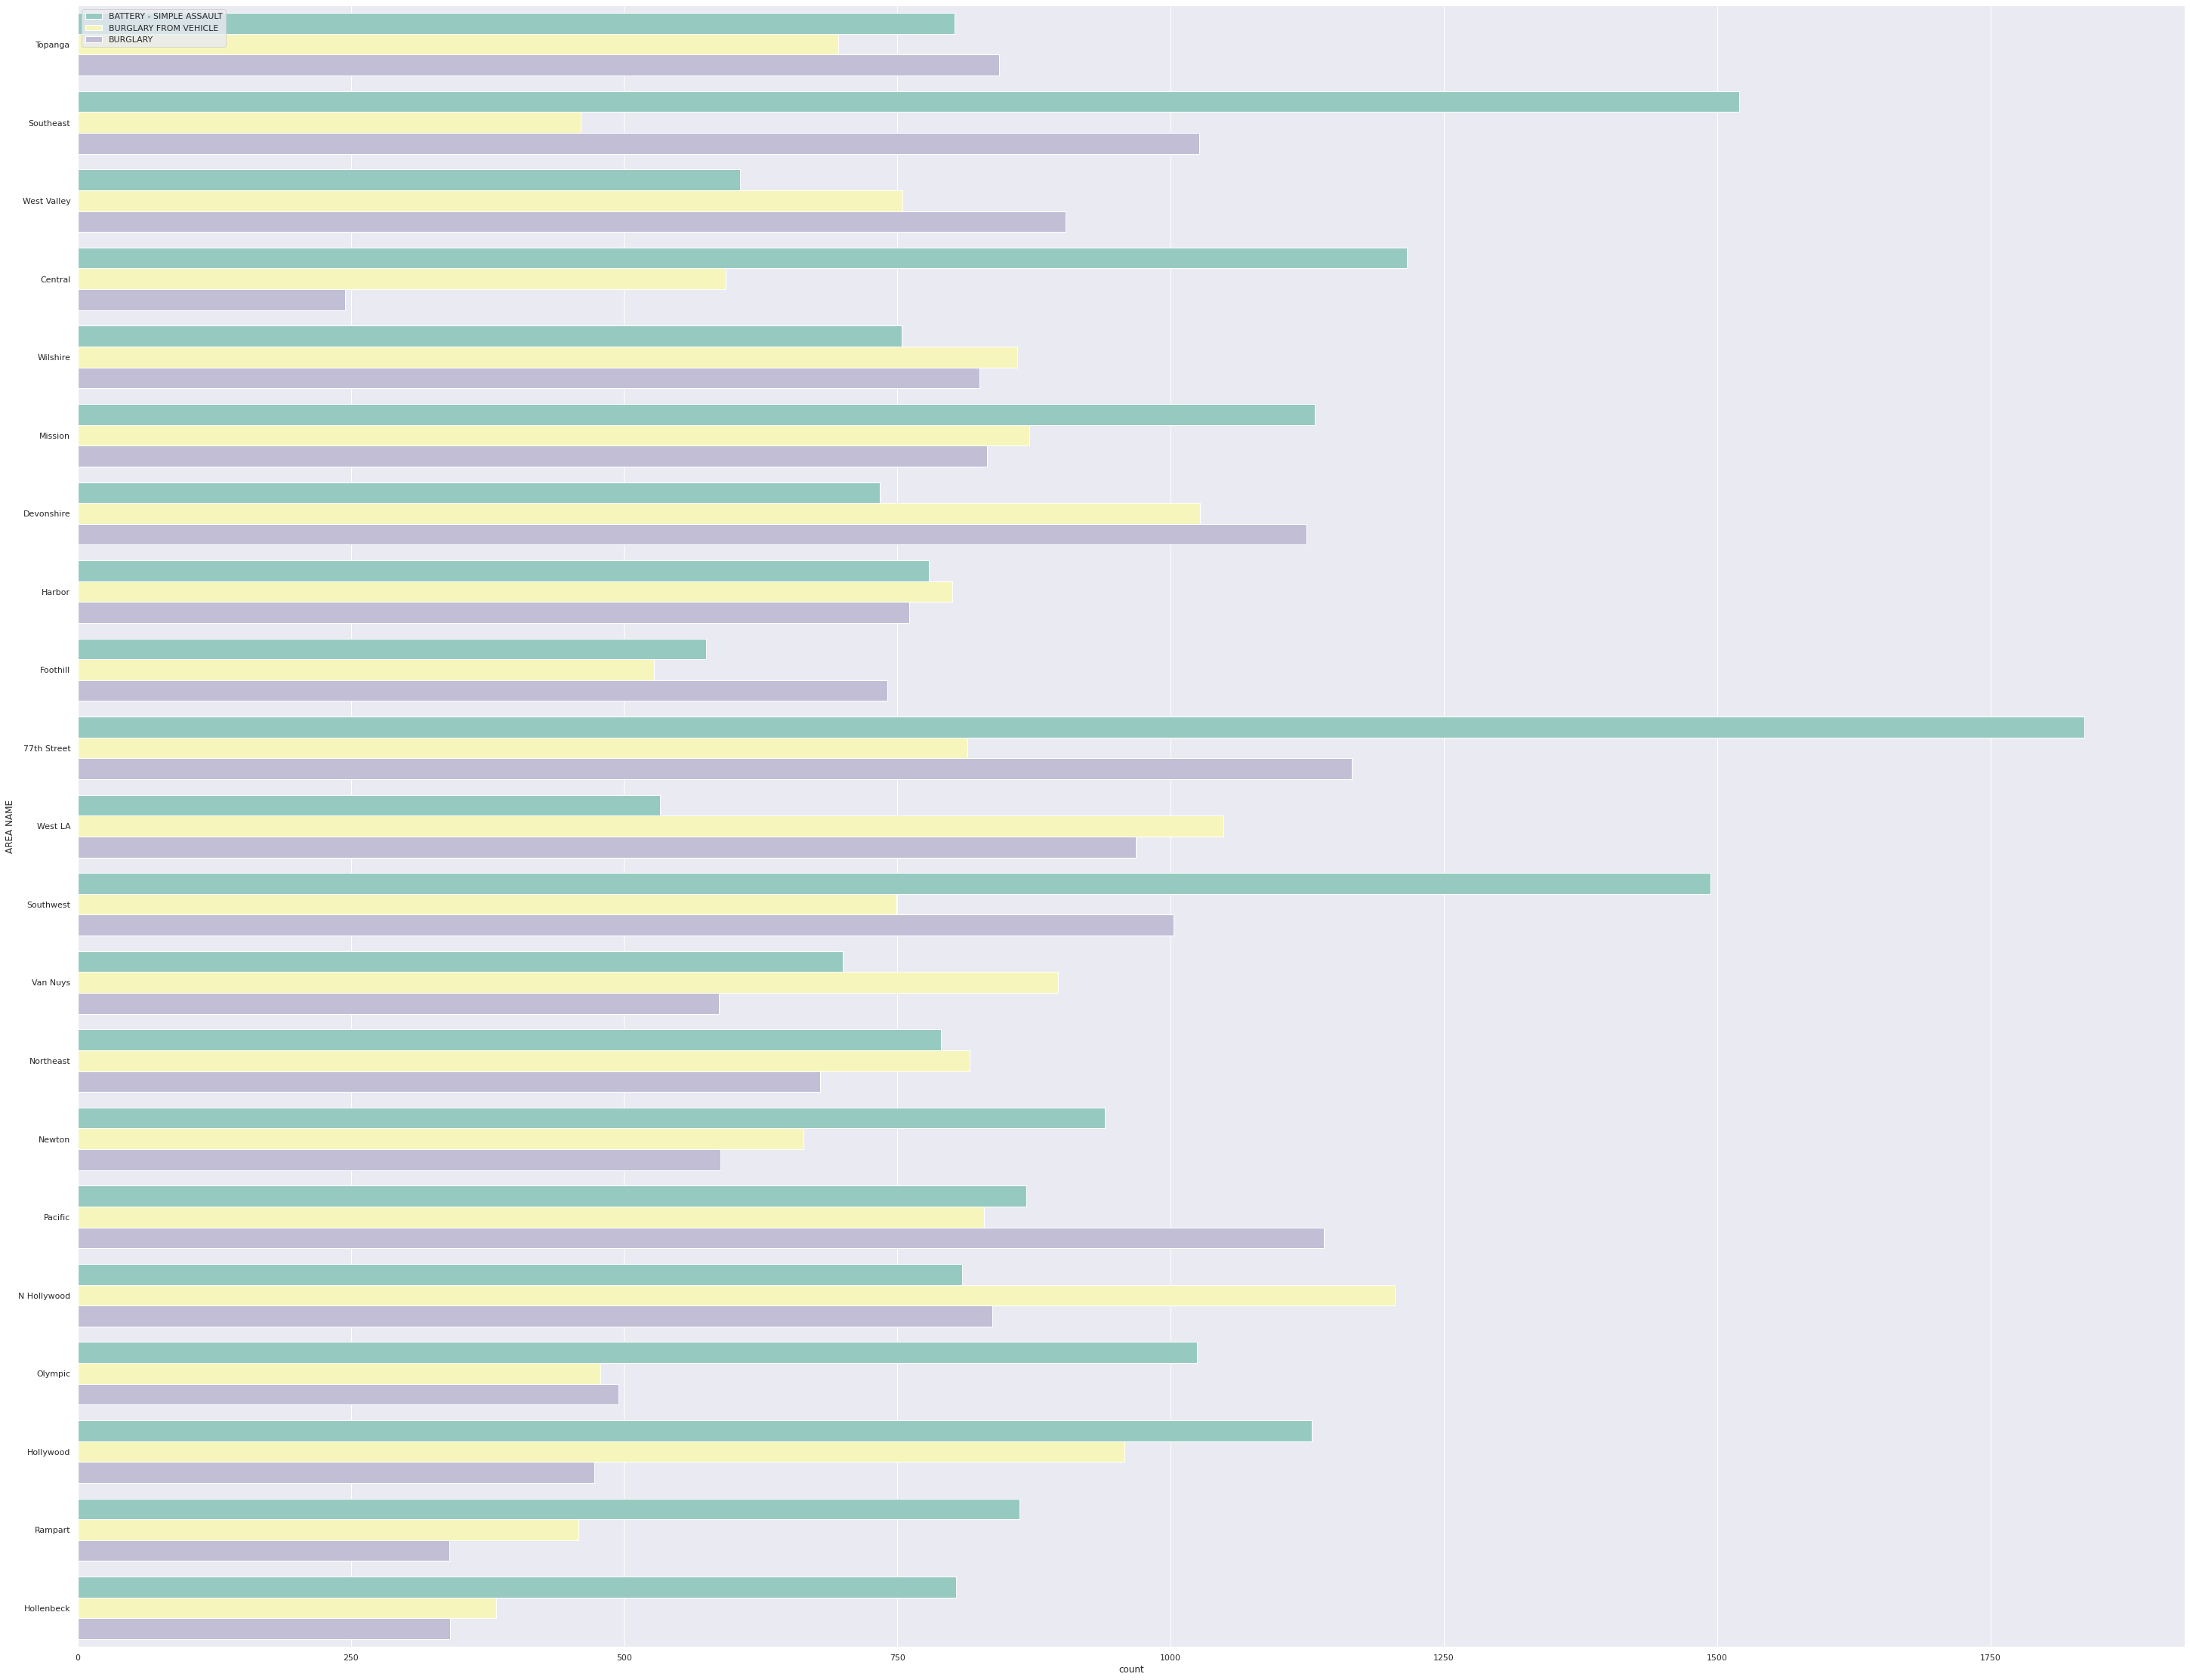

In [ ]:
df_crime = df_crime.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'})
list = ['BURGLARY', 'BURGLARY FROM VEHICLE', 'BATTERY - SIMPLE ASSAULT']
df_crime = df_crime[df_crime['Crm_Cd_Desc'].isin(list)]
ax = sns.countplot(y="AREA NAME", hue="Crm_Cd_Desc", data=df_crime, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper left')

 
Count total NaN at each column in a DataFrame : 

 Incident Number          0
Reporting District       0
Area Occurred            0
Dispatch Date            0
Dispatch Time            0
Call Type Code           0
Call Type Description    0
dtype: int64


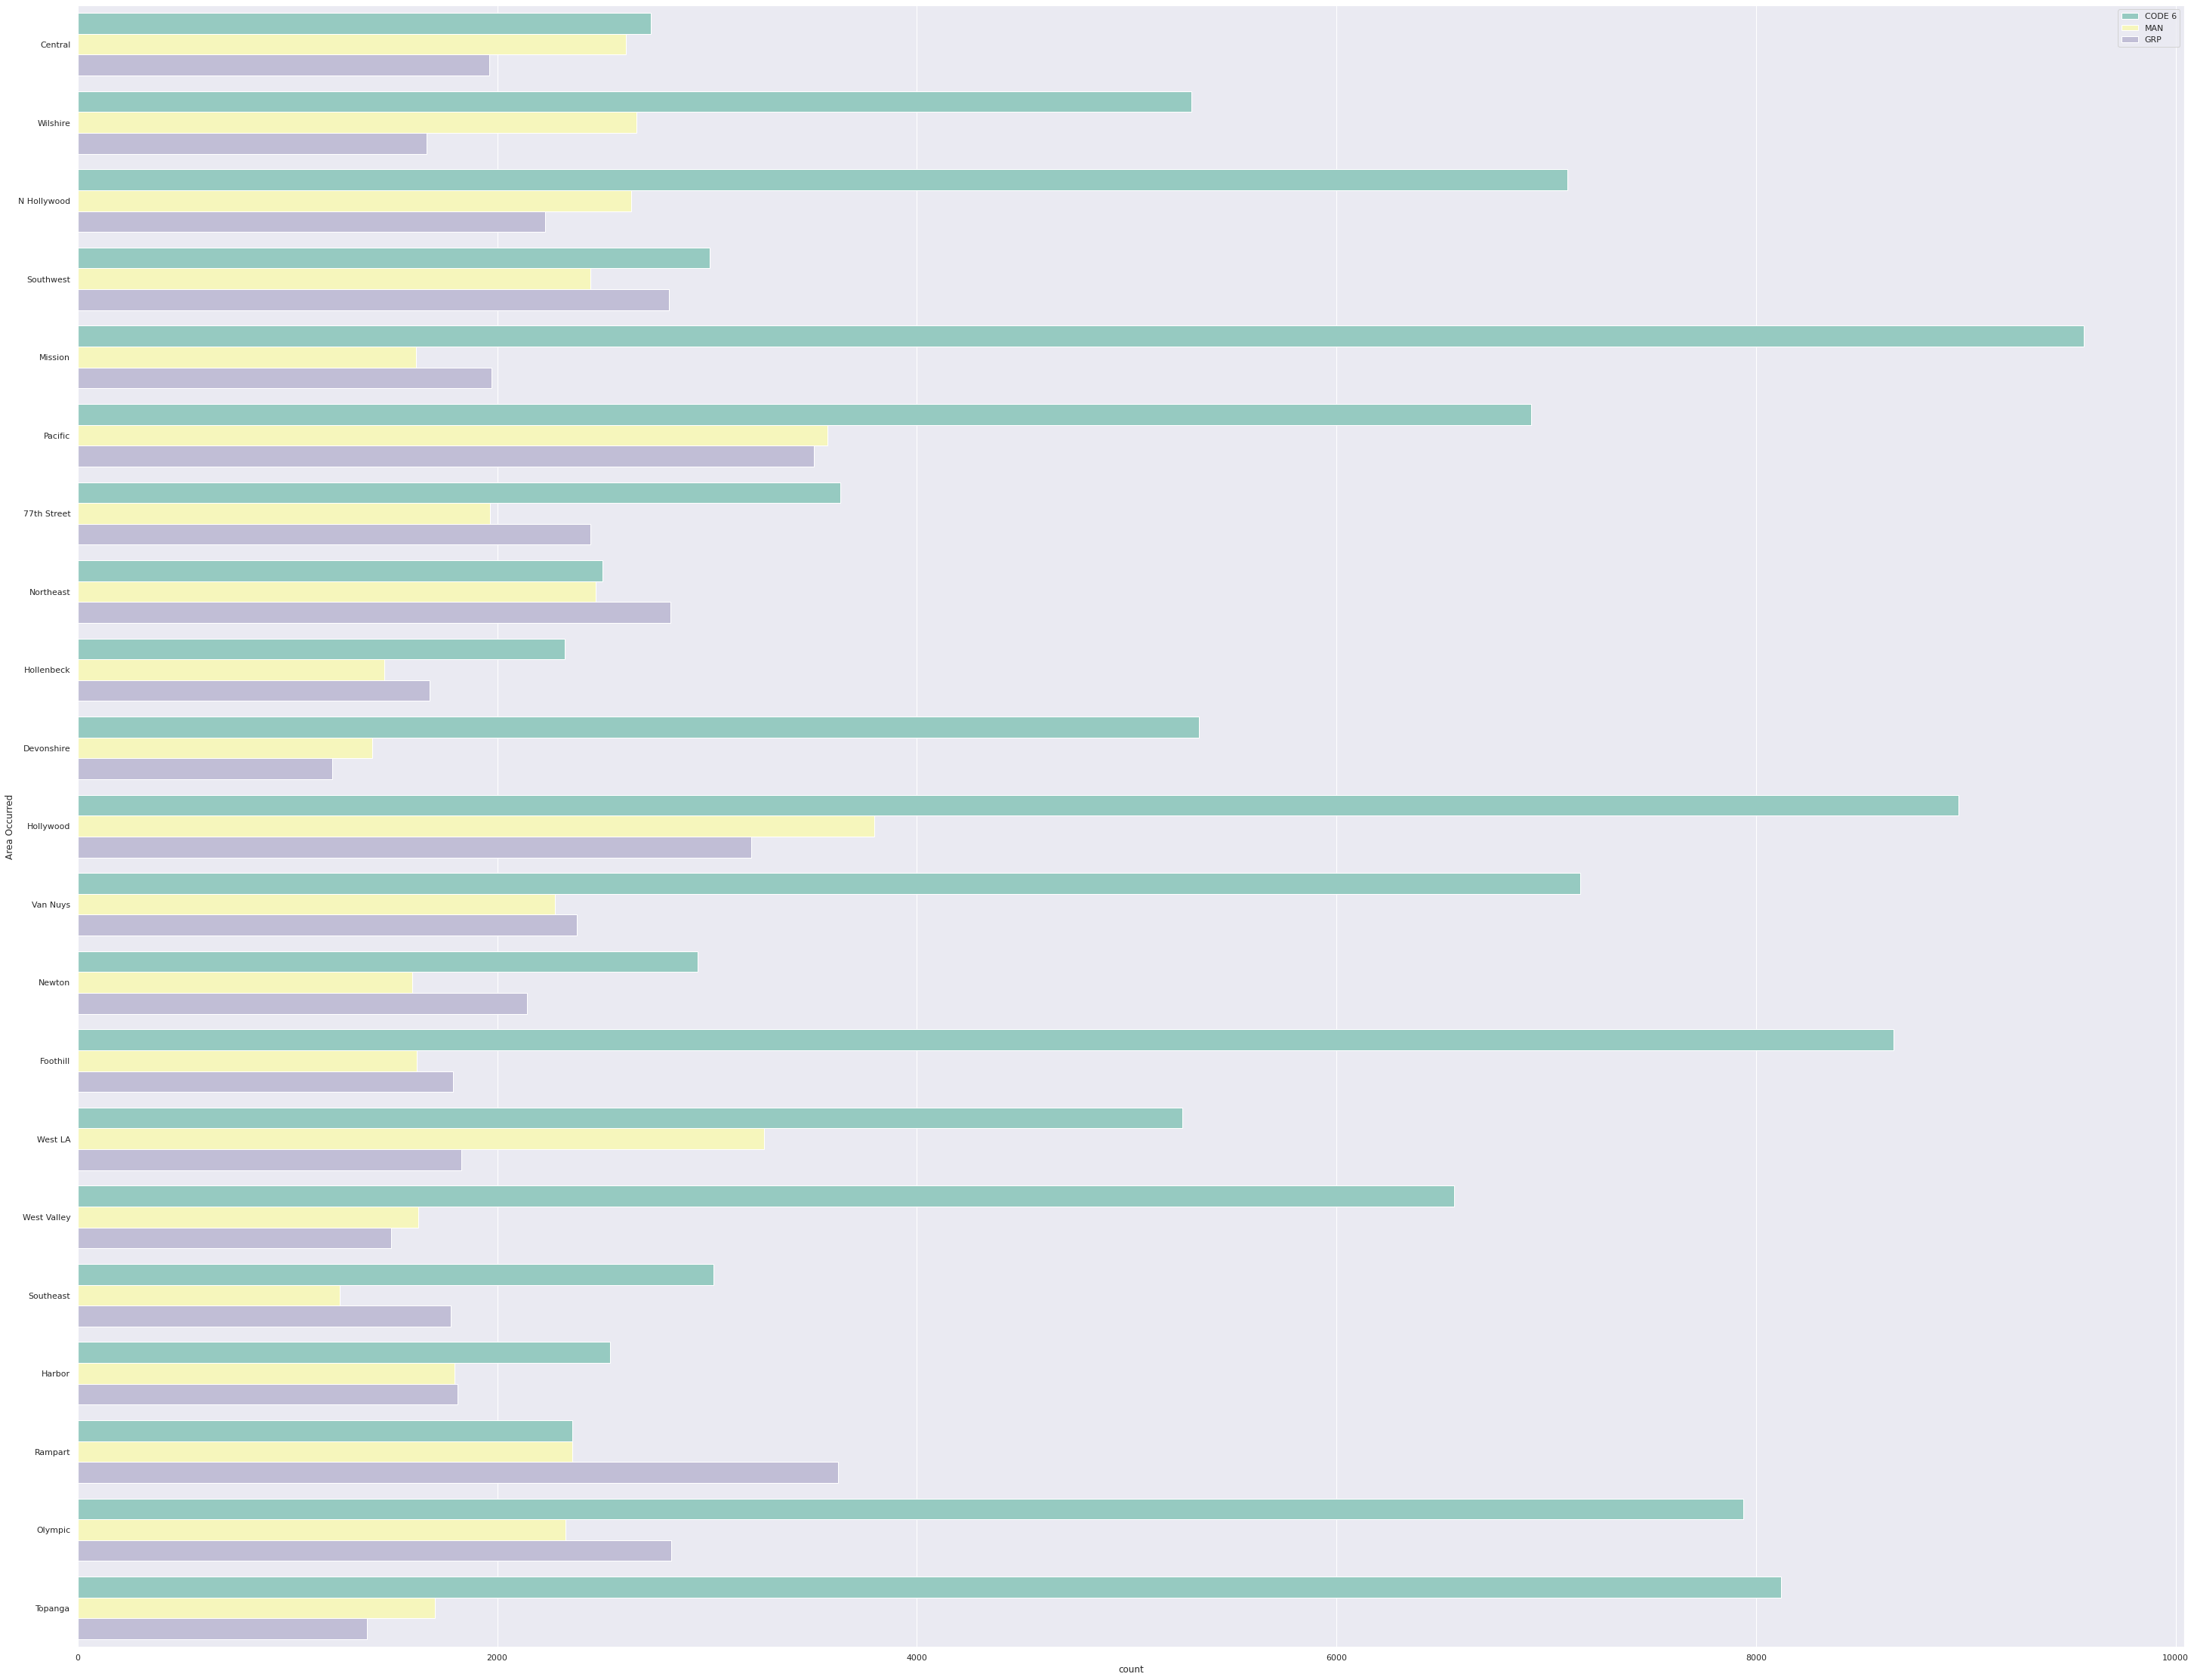

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_call.isnull().sum())
df_call = df_call.rename(columns={'Call Type Description': 'Call_Type_Description'})
df_call.Call_Type_Description.value_counts()
list = ['CODE 6', 'GRP', 'MAN']
df_call = df_call[df_call['Call_Type_Description'].isin(list)]
ax = sns.countplot(y="Area Occurred", hue="Call_Type_Description", data=df_call, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper right')

**Year 2012**

 
Count total NaN at each column in a DataFrame : 

 DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            114900
Vict Age                0
Vict Sex            95053
Vict Descent        95072
Premis Cd              38
Premis Desc            38
Weapon Used Cd     701766
Weapon Desc        701767
Status                  2
Status Desc             0
Crm Cd 1                4
Crm Cd 2           983594
Crm Cd 3          1047440
Crm Cd 4          1048537
LOCATION                0
Cross Street       875978
LAT                     0
LON                     0
dtype: int64


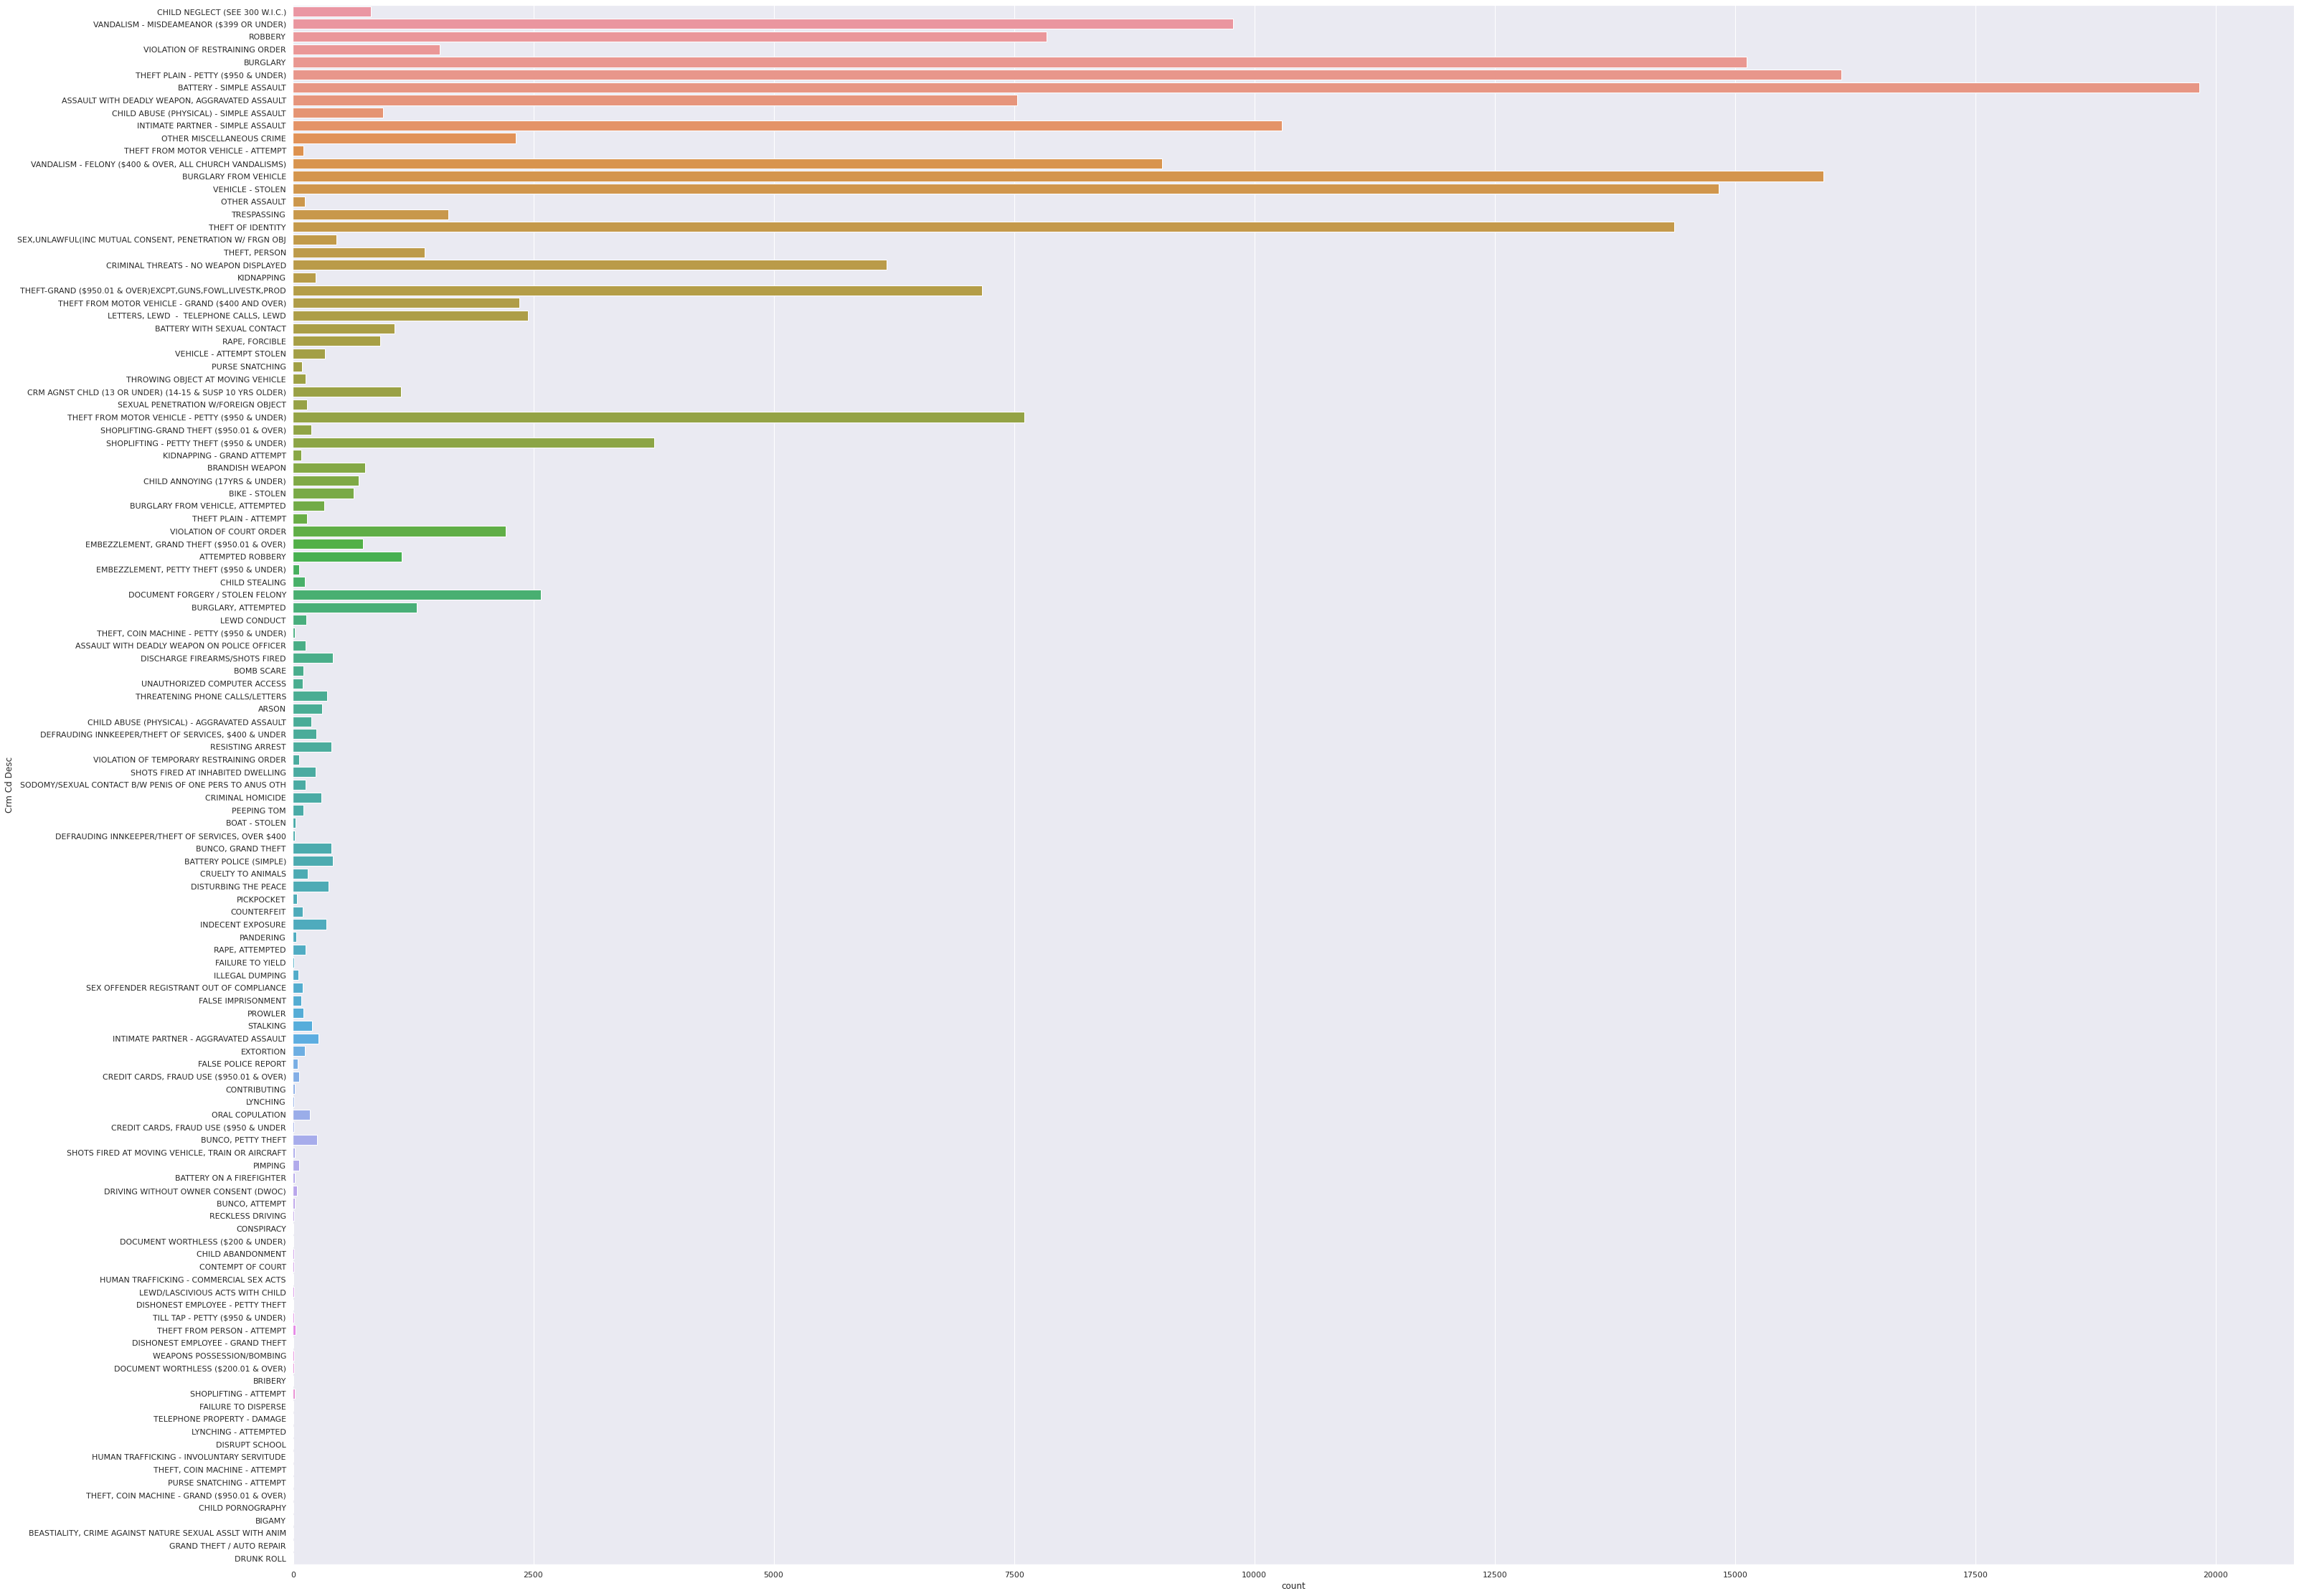

In [ ]:
df_crime = pd.read_csv('/content/gdrive/My Drive/Crime_Data_from_2010_to_2019.csv')
df_call = pd.read_csv('/content/gdrive/My Drive/lapd-calls-for-service-2012.csv')
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_crime.isnull().sum())
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC']).dt.date
df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
df_crime = df_crime.loc[df_crime['year'] == 2012]
ax = sns.countplot(y="Crm Cd Desc", data=df_crime, linewidth=1)
ax = sns.set(rc={'figure.figsize':(50, 40)})

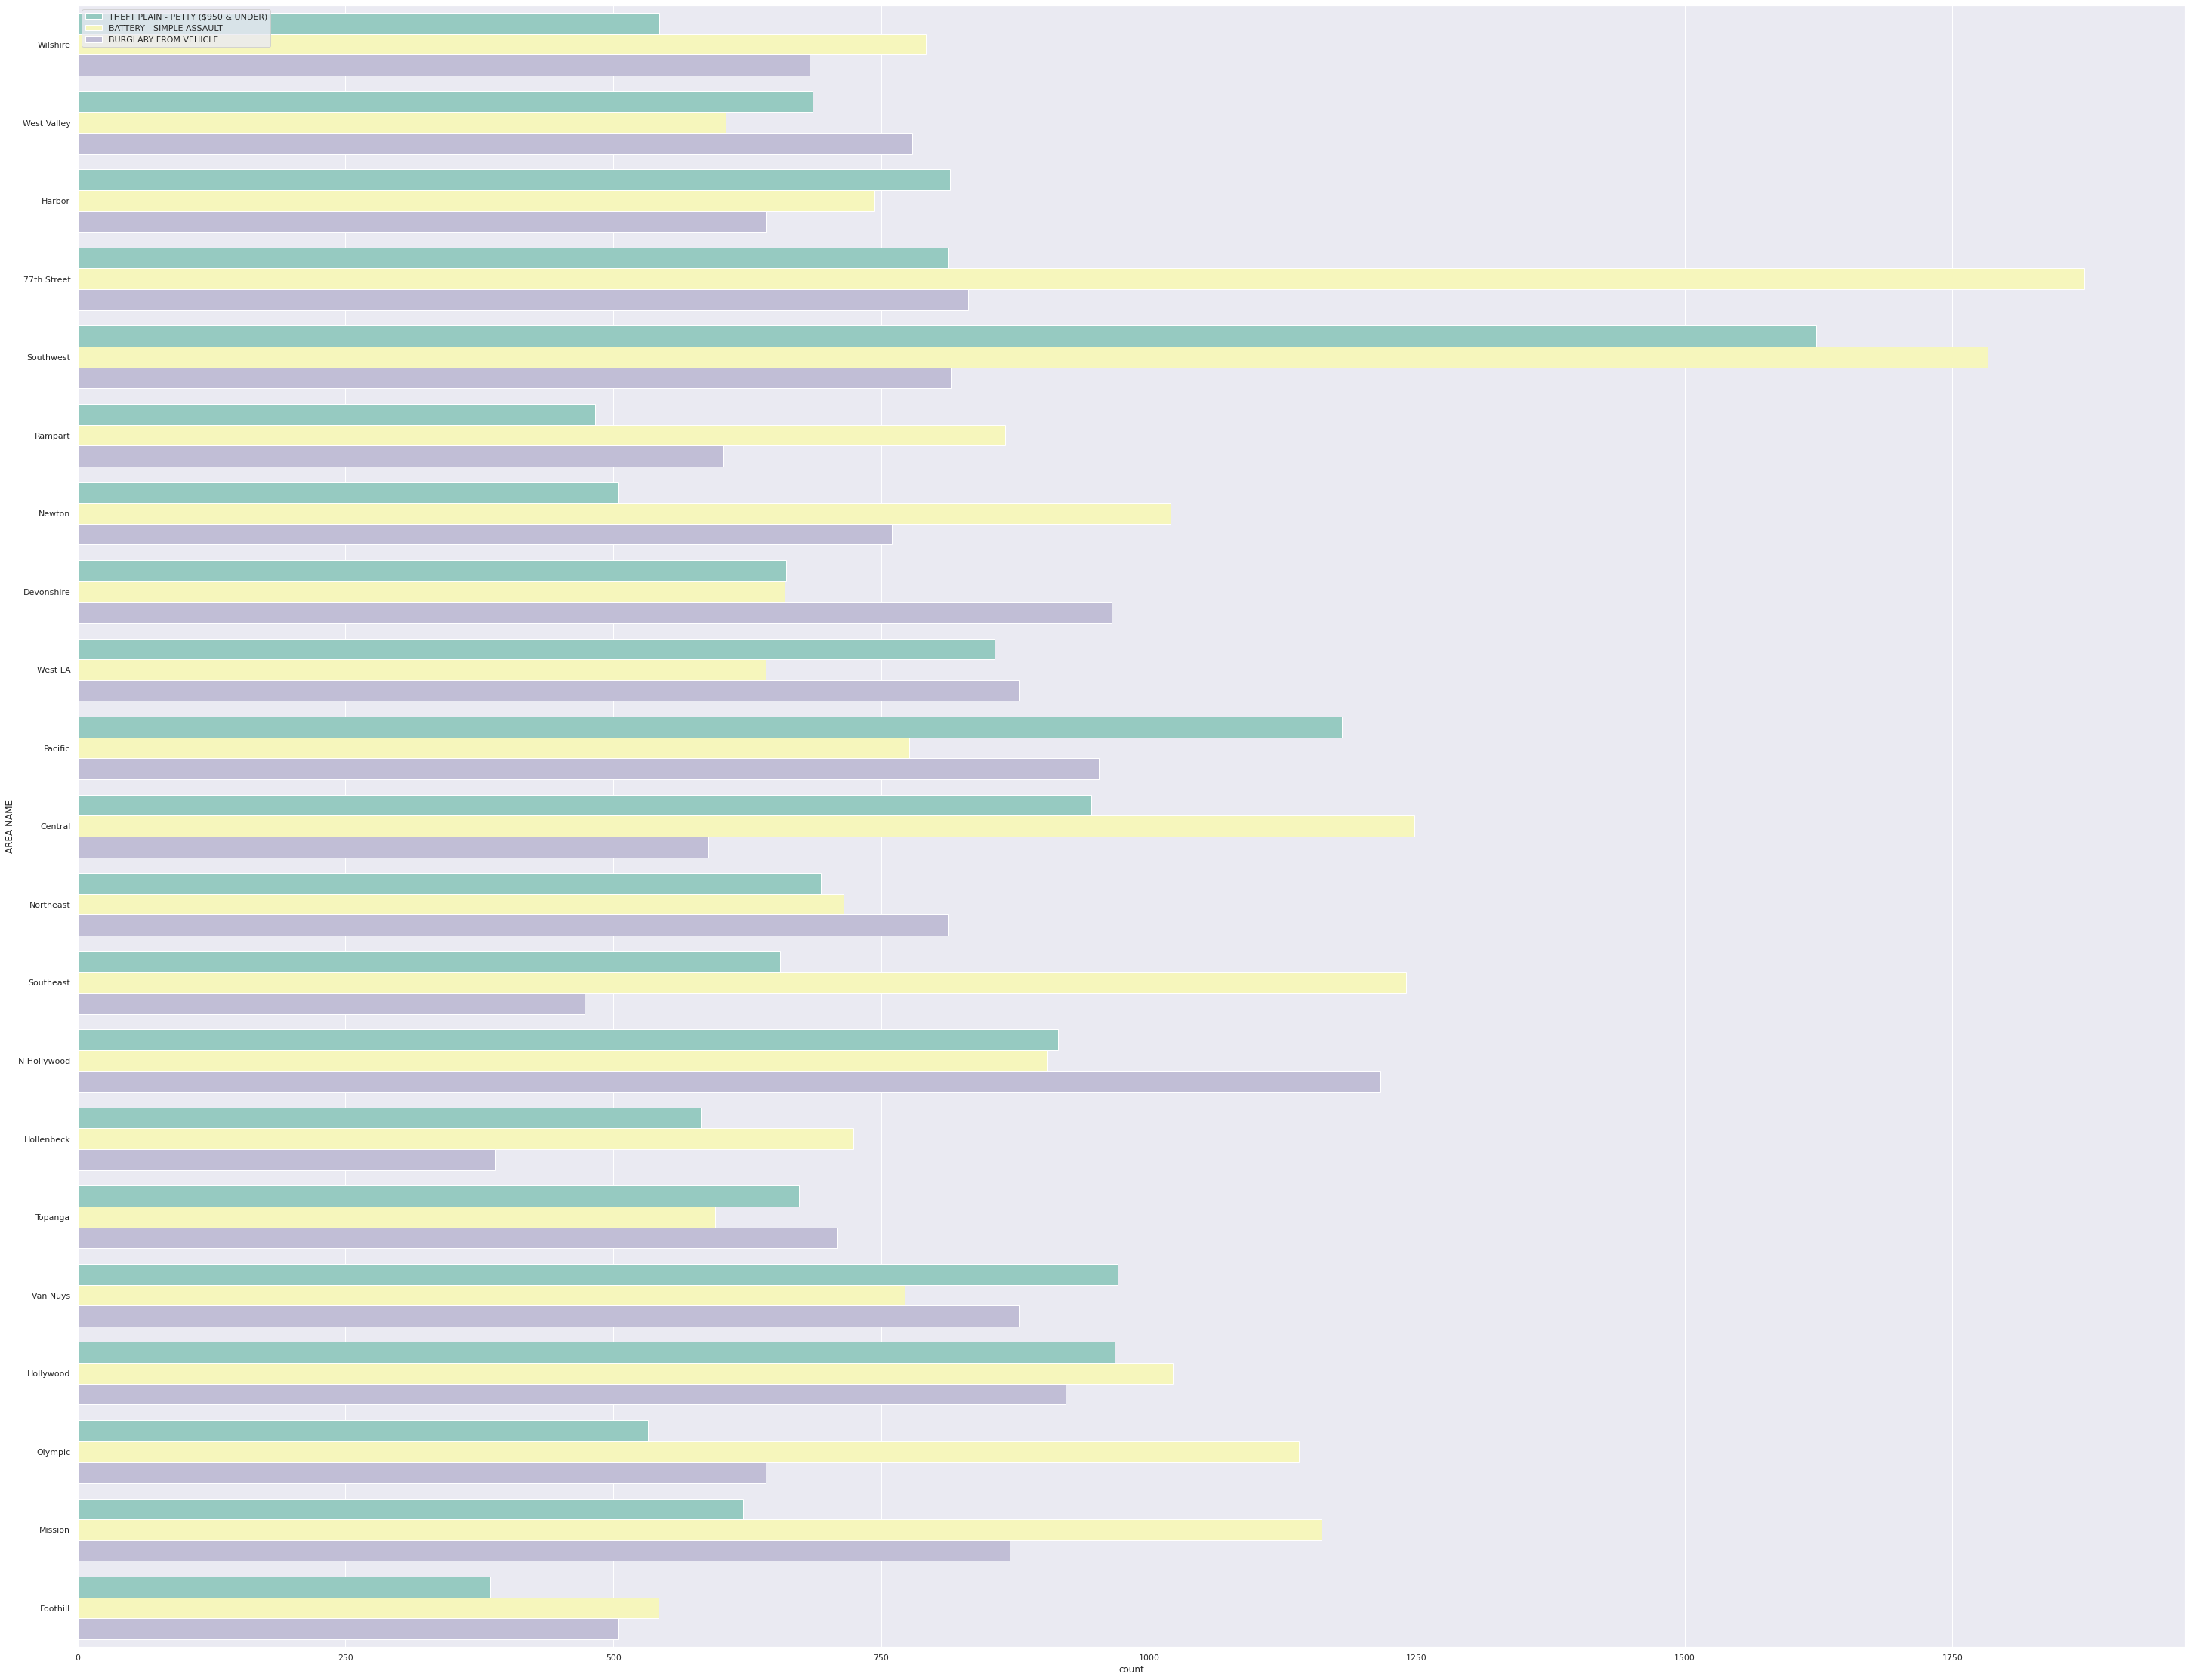

In [ ]:
df_crime = df_crime.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'})
list = ['THEFT PLAIN - PETTY ($950 & UNDER)', 'BURGLARY FROM VEHICLE', 'BATTERY - SIMPLE ASSAULT']
df_crime = df_crime[df_crime['Crm_Cd_Desc'].isin(list)]
ax = sns.countplot(y="AREA NAME", hue="Crm_Cd_Desc", data=df_crime, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper left')

 
Count total NaN at each column in a DataFrame : 

 Incident Number          0
Reporting District       0
Area Occurred            0
Dispatch Date            0
Dispatch Time            0
Call Type Code           0
Call Type Description    0
dtype: int64


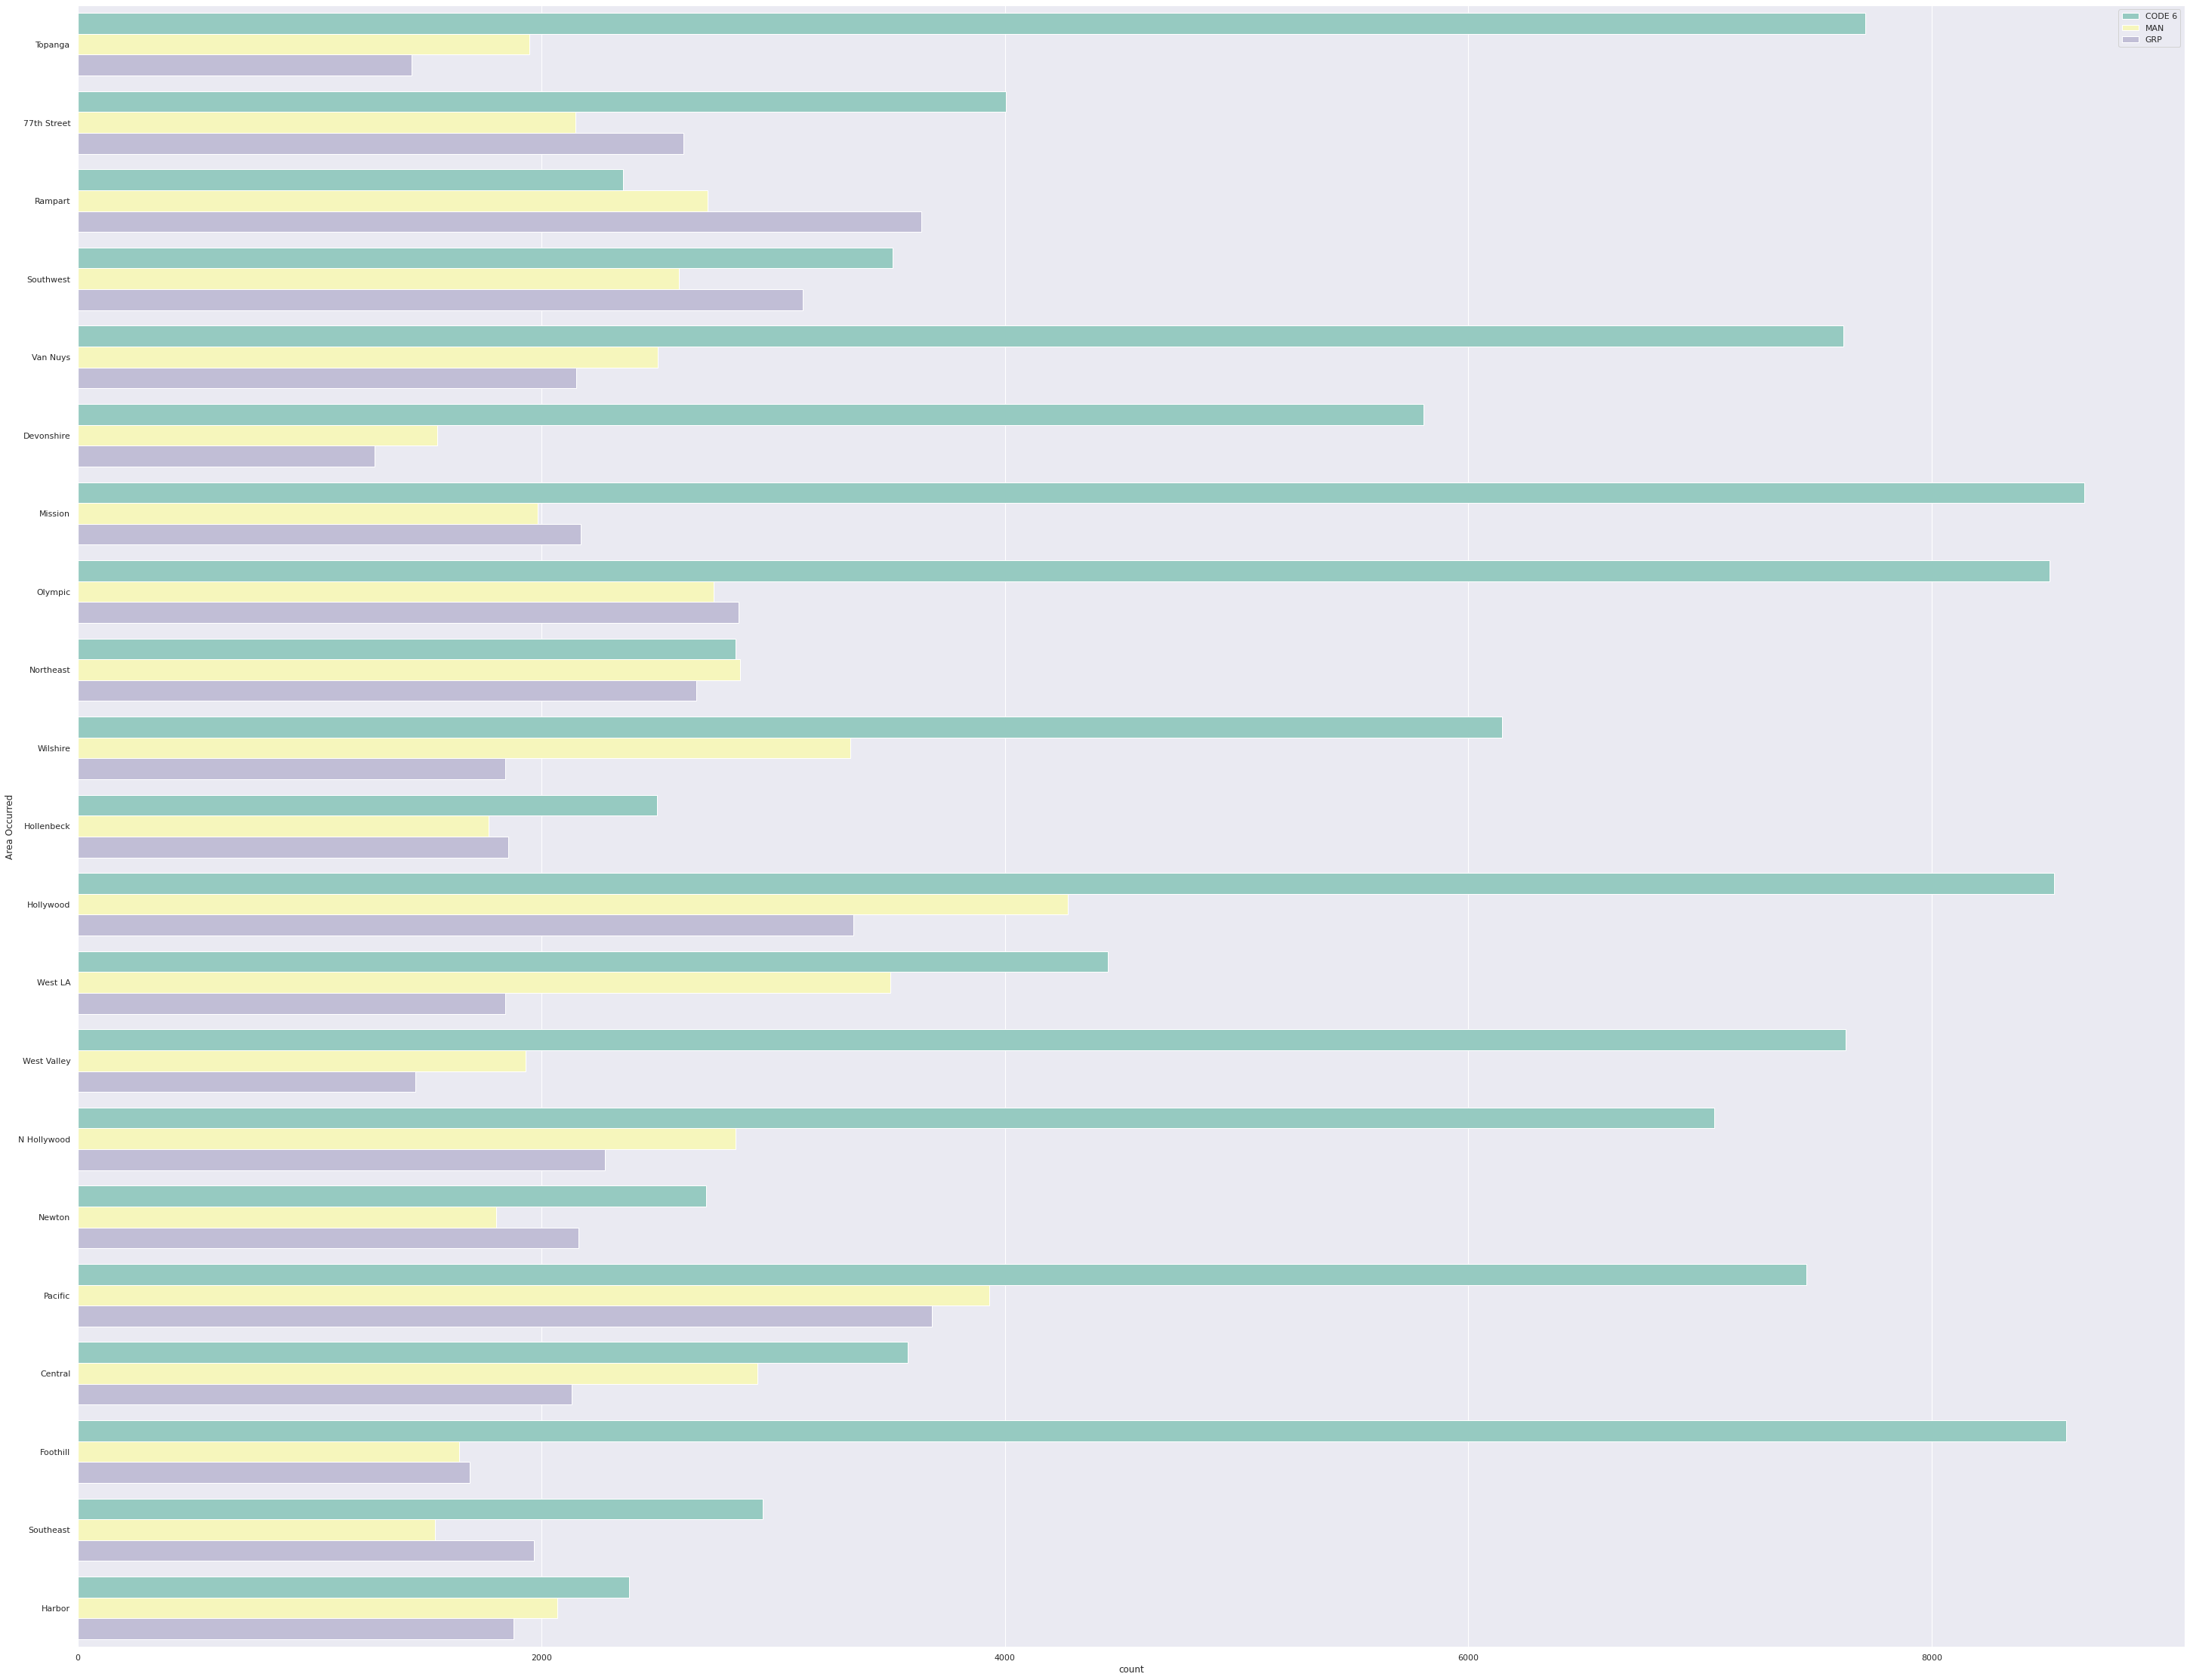

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_call.isnull().sum())
df_call = df_call.rename(columns={'Call Type Description': 'Call_Type_Description'})
df_call.Call_Type_Description.value_counts()
list = ['CODE 6', 'GRP', 'MAN']
df_call = df_call[df_call['Call_Type_Description'].isin(list)]
ax = sns.countplot(y="Area Occurred", hue="Call_Type_Description", data=df_call, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper right')

**Year 2013**

 
Count total NaN at each column in a DataFrame : 

 DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            114900
Vict Age                0
Vict Sex            95053
Vict Descent        95072
Premis Cd              38
Premis Desc            38
Weapon Used Cd     701766
Weapon Desc        701767
Status                  2
Status Desc             0
Crm Cd 1                4
Crm Cd 2           983594
Crm Cd 3          1047440
Crm Cd 4          1048537
LOCATION                0
Cross Street       875978
LAT                     0
LON                     0
dtype: int64


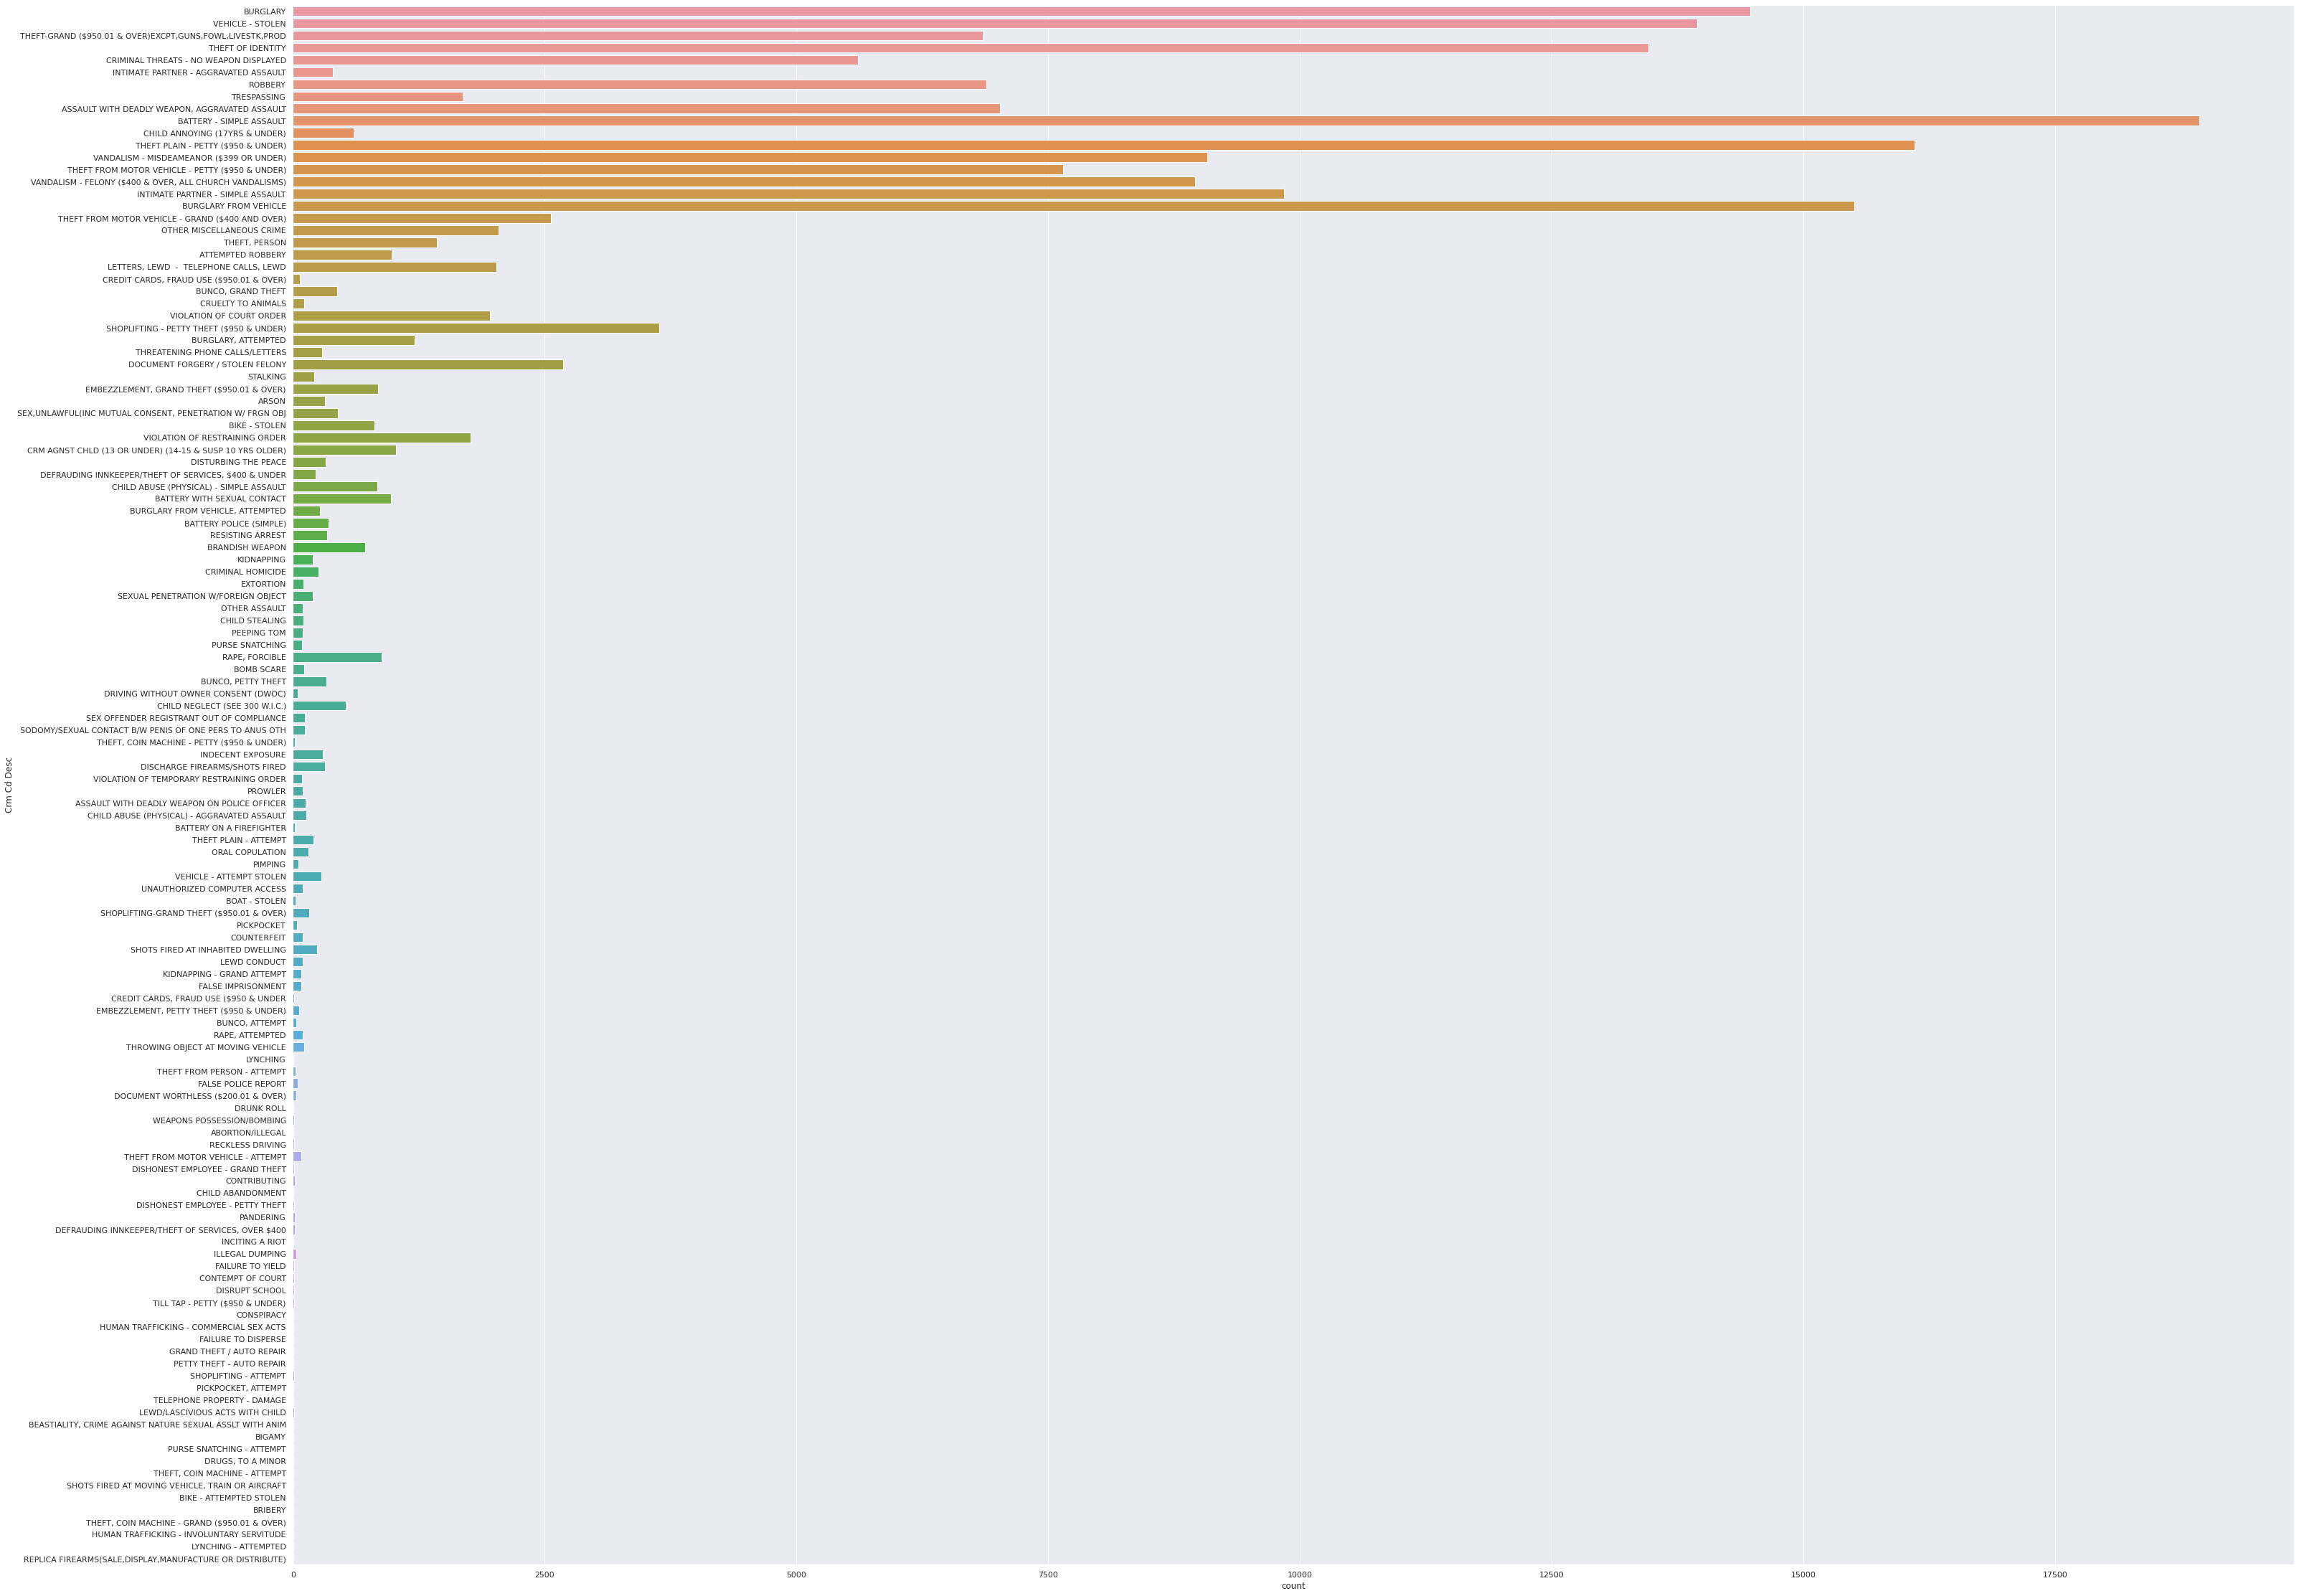

In [ ]:
df_crime = pd.read_csv('/content/gdrive/My Drive/Crime_Data_from_2010_to_2019.csv')
df_call = pd.read_csv('/content/gdrive/My Drive/lapd-calls-for-service-2013.csv')
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_crime.isnull().sum())
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC']).dt.date
df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
df_crime = df_crime.loc[df_crime['year'] == 2013]
ax = sns.countplot(y="Crm Cd Desc", data=df_crime, linewidth=1)
ax = sns.set(rc={'figure.figsize':(50, 40)})

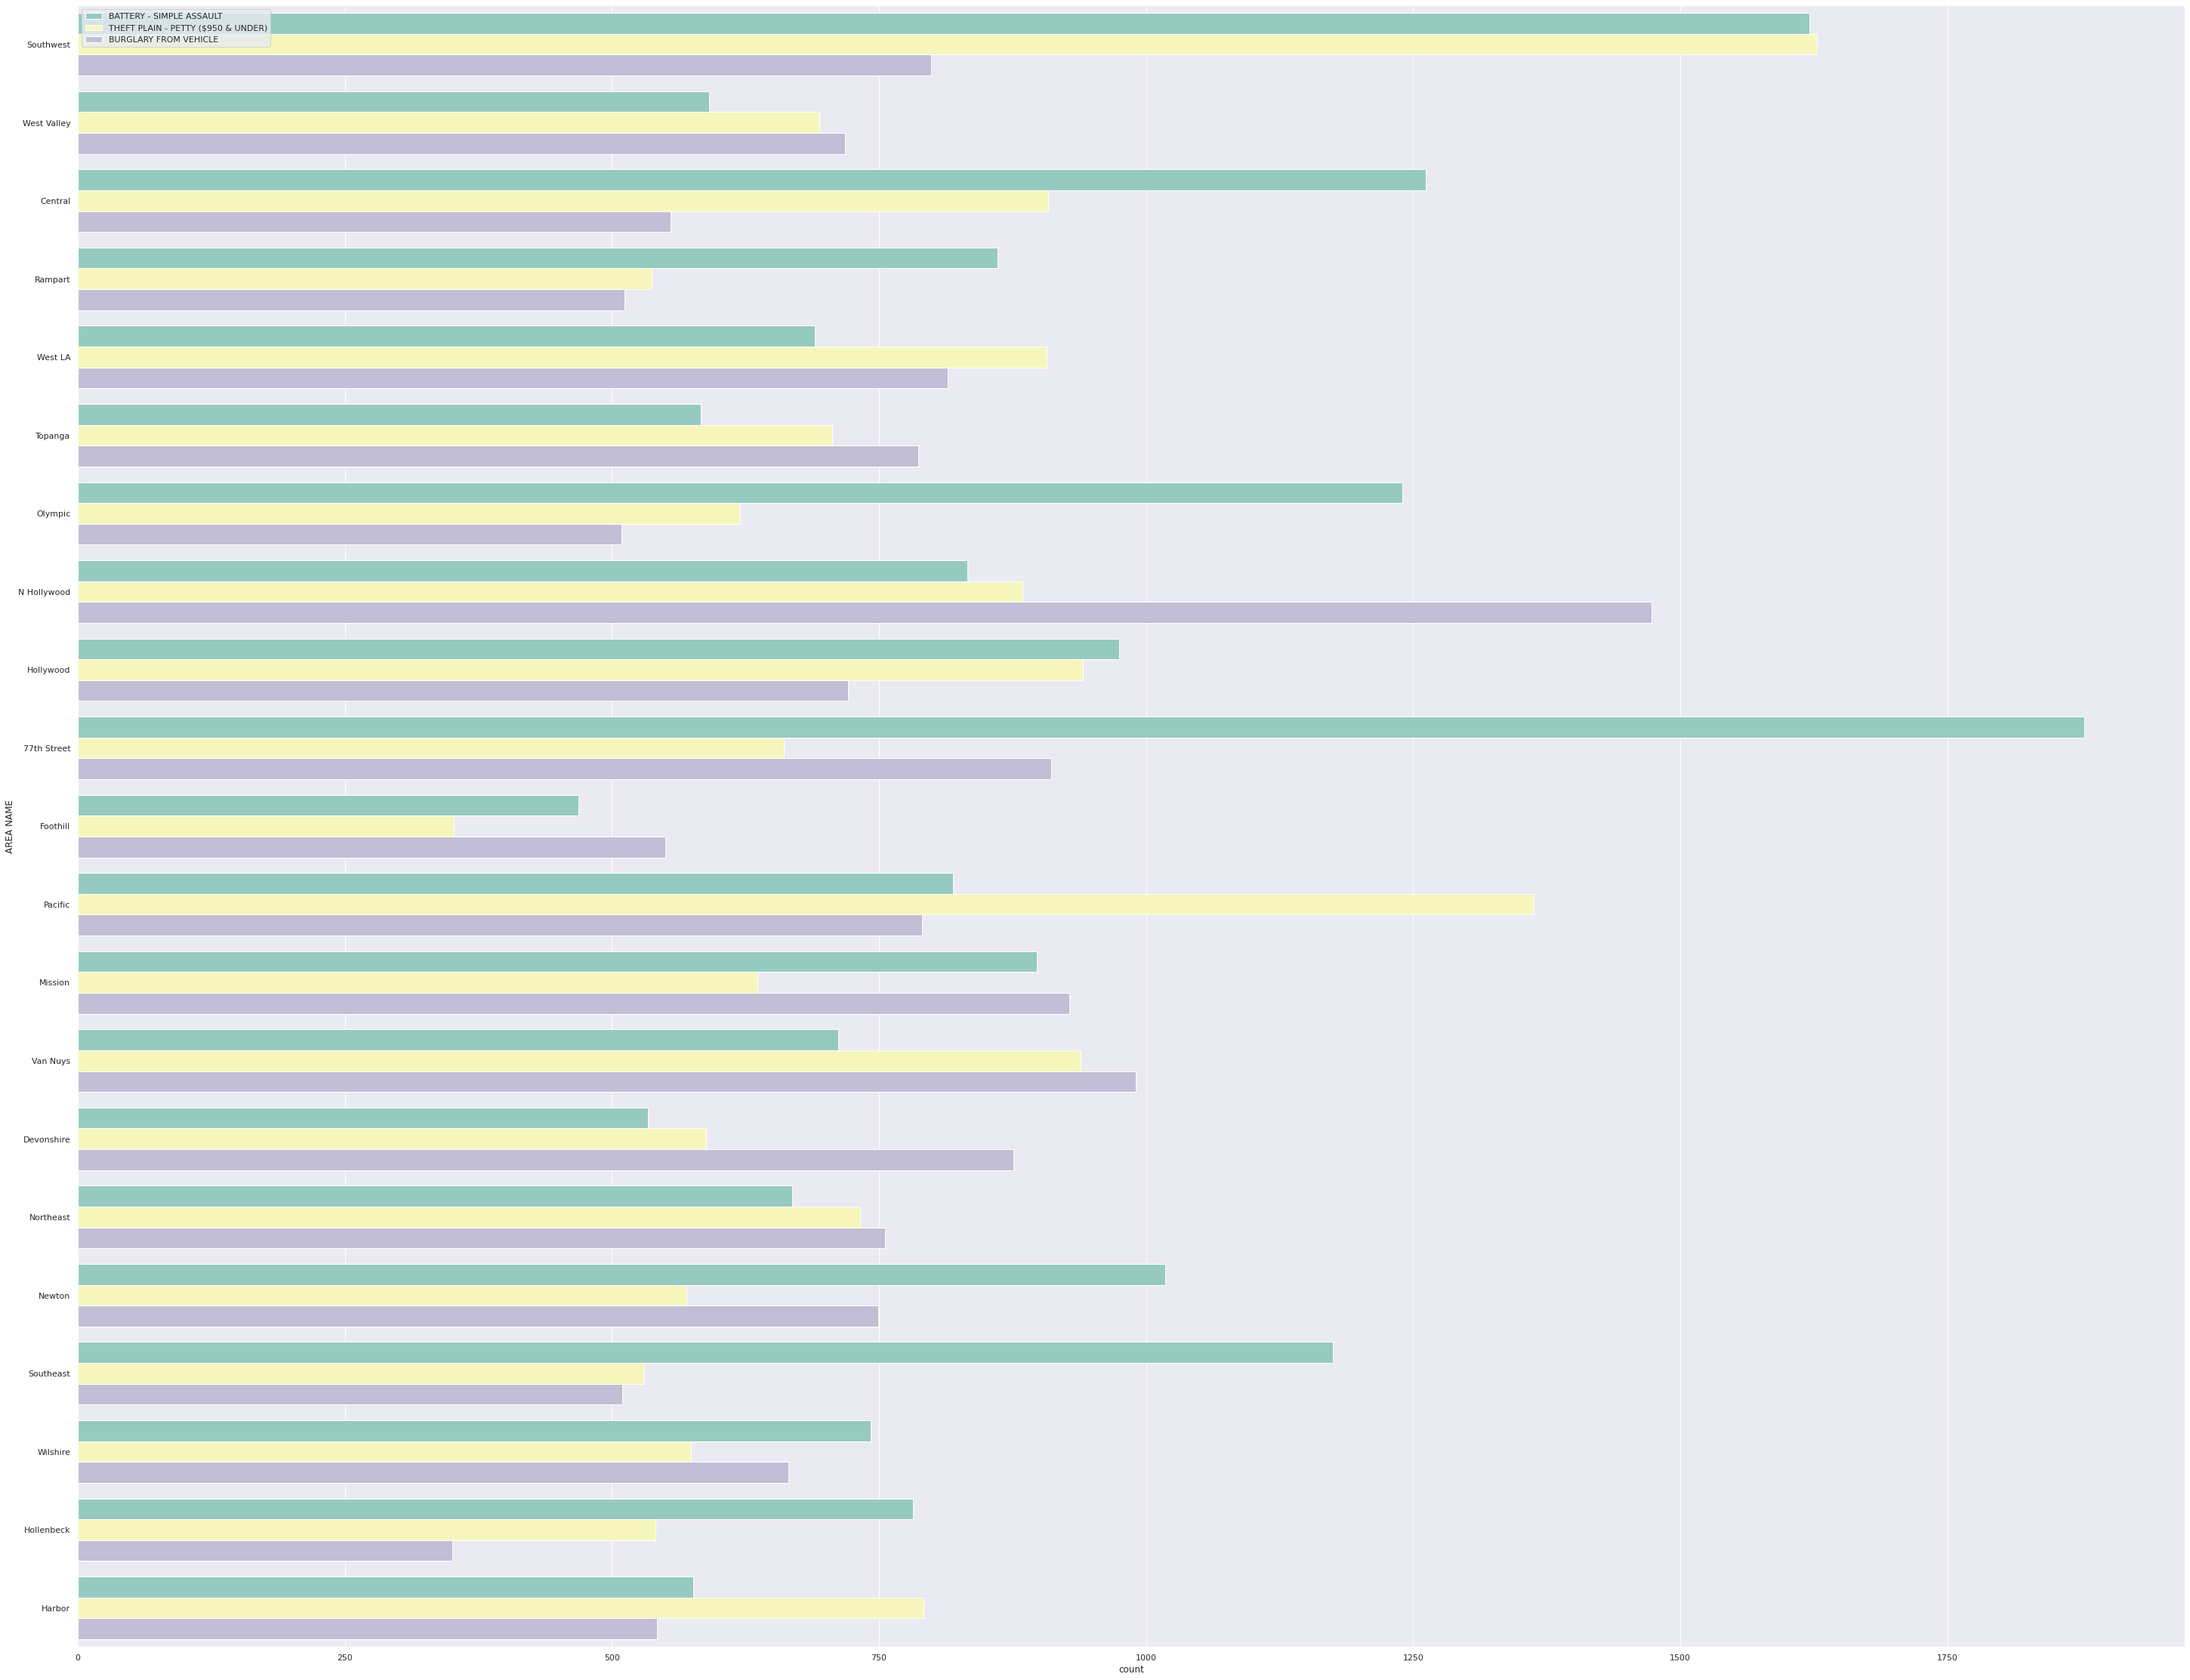

In [ ]:
df_crime = df_crime.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'})
list = ['THEFT PLAIN - PETTY ($950 & UNDER)', 'BURGLARY FROM VEHICLE', 'BATTERY - SIMPLE ASSAULT']
df_crime = df_crime[df_crime['Crm_Cd_Desc'].isin(list)]
ax = sns.countplot(y="AREA NAME", hue="Crm_Cd_Desc", data=df_crime, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper left')

 
Count total NaN at each column in a DataFrame : 

 Incident Number          0
Reporting District       0
Area Occurred            0
Dispatch Date            0
Dispatch Time            0
Call Type Code           0
Call Type Description    0
dtype: int64


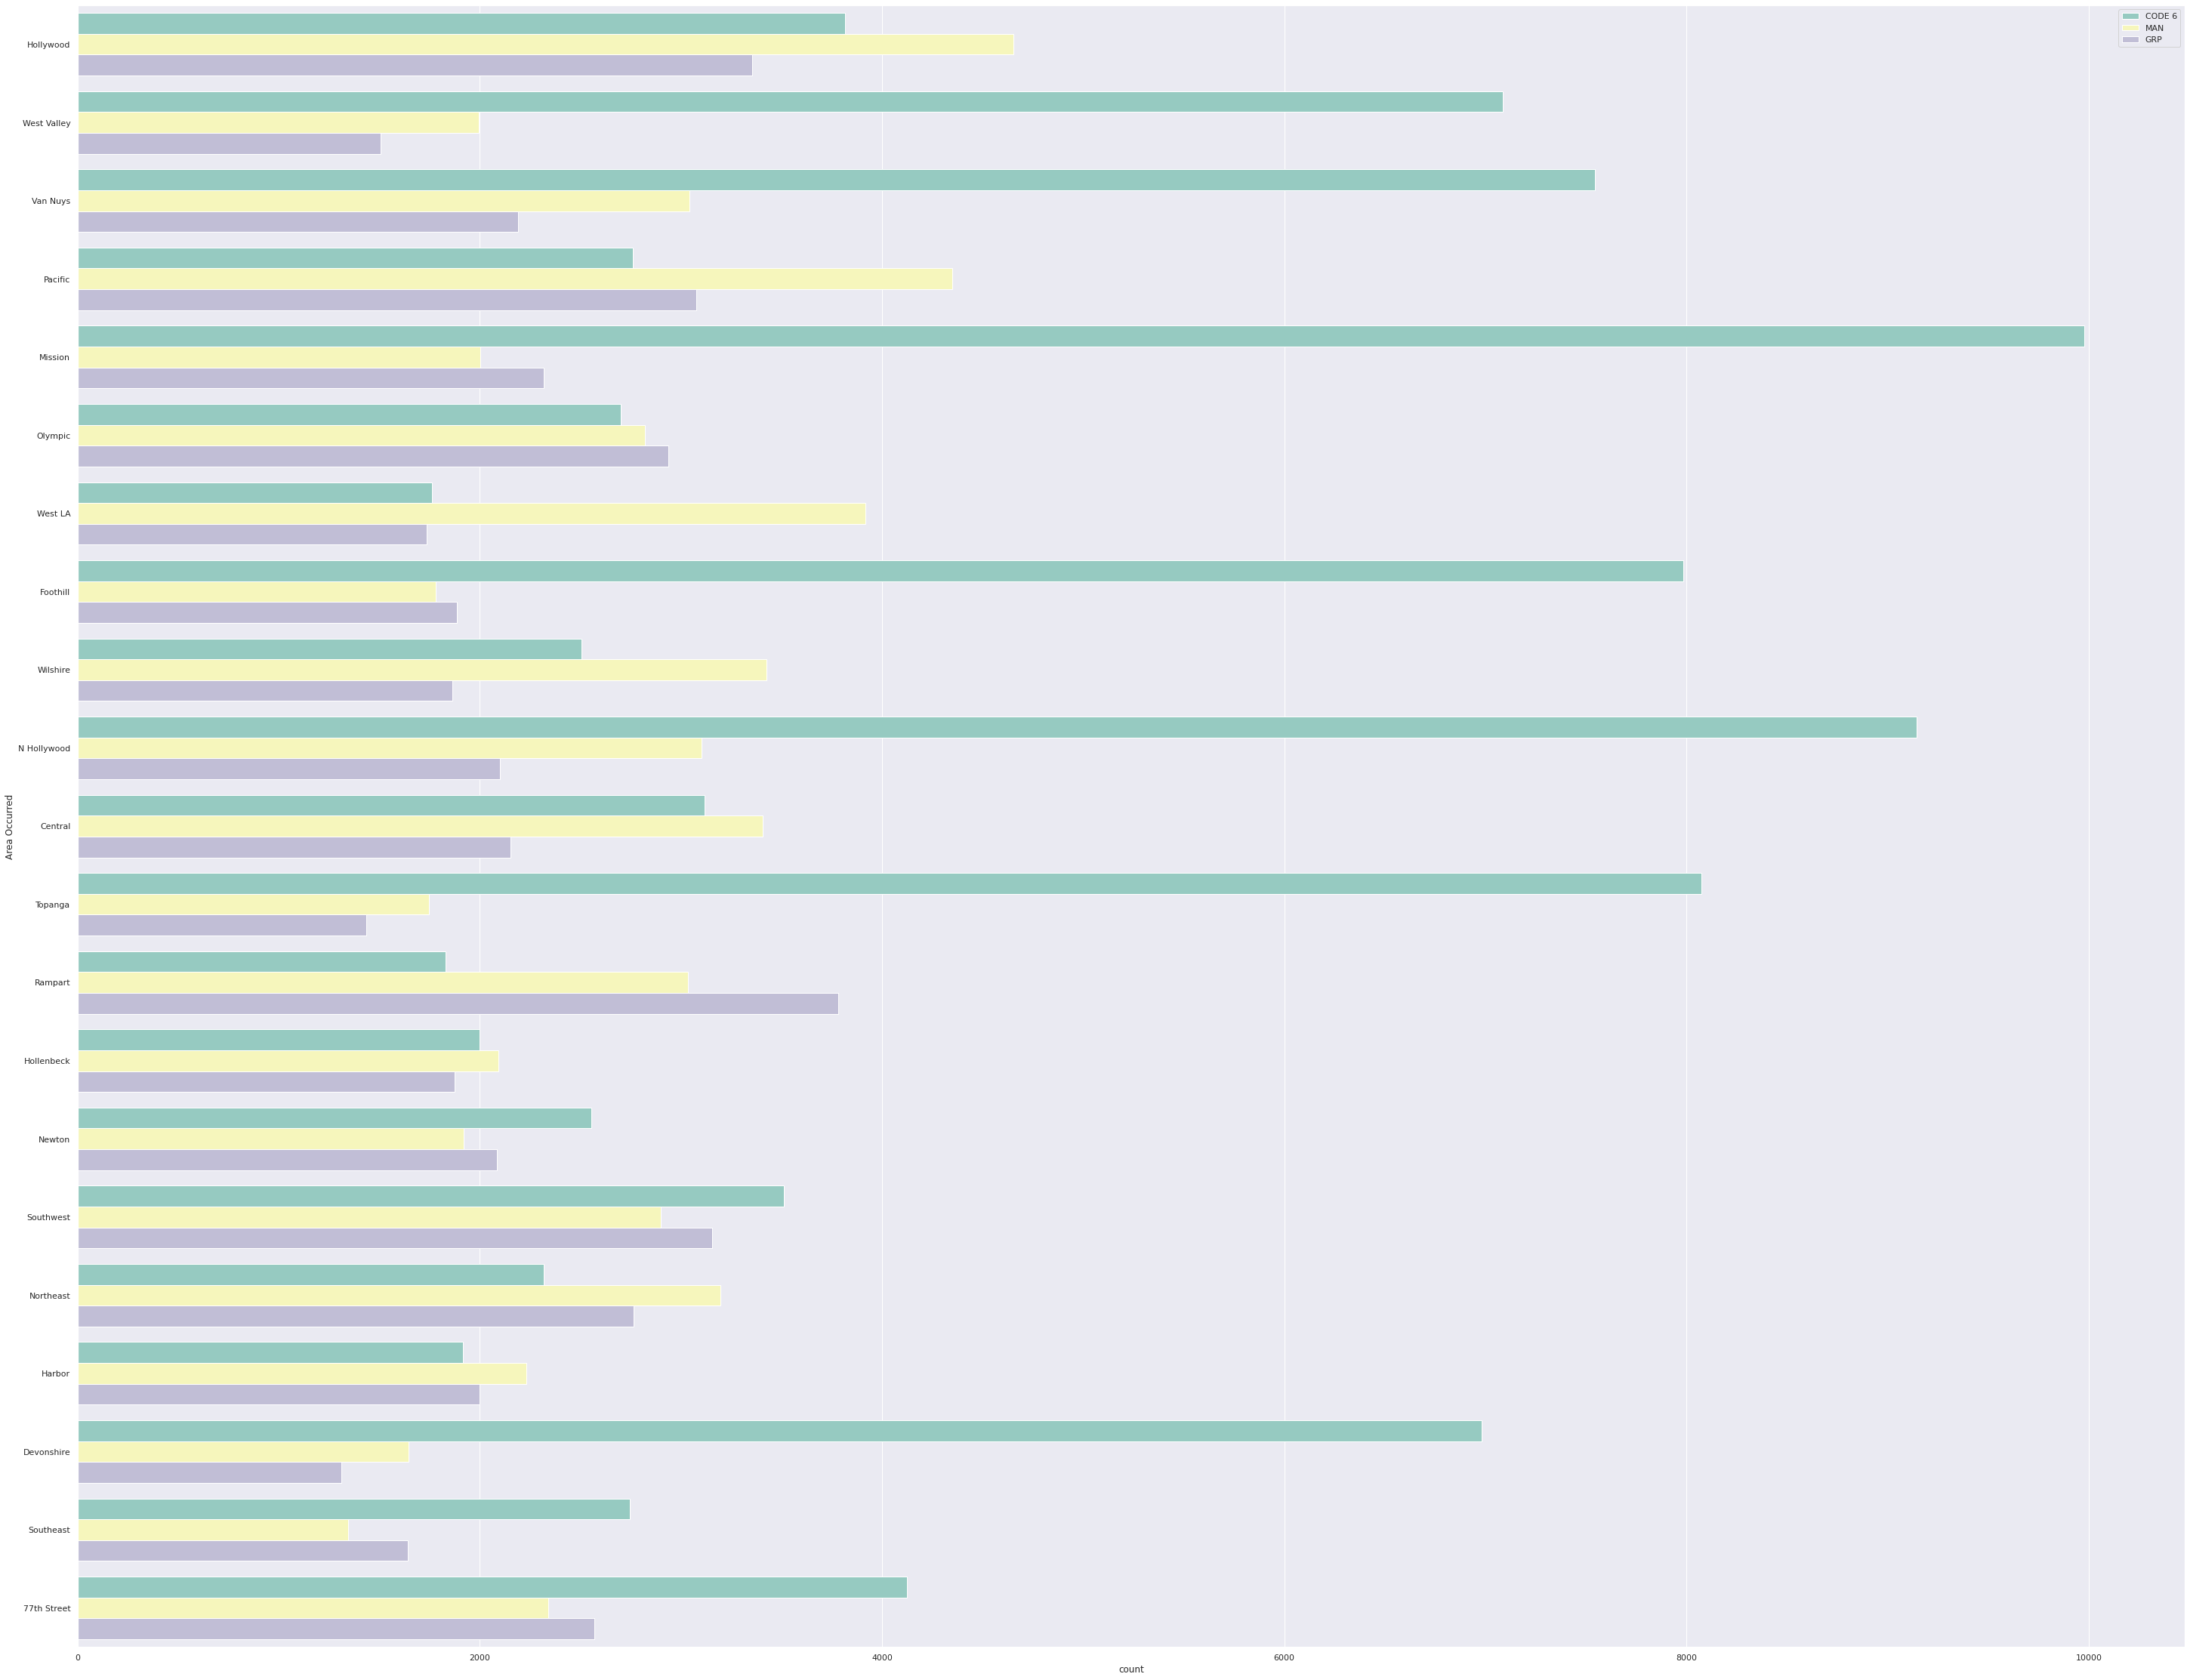

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_call.isnull().sum())
df_call = df_call.rename(columns={'Call Type Description': 'Call_Type_Description'})
df_call.Call_Type_Description.value_counts()
list = ['CODE 6', 'GRP', 'MAN']
df_call = df_call[df_call['Call_Type_Description'].isin(list)]
ax = sns.countplot(y="Area Occurred", hue="Call_Type_Description", data=df_call, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper right')

**Year 2014**

 
Count total NaN at each column in a DataFrame : 

 DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            114900
Vict Age                0
Vict Sex            95053
Vict Descent        95072
Premis Cd              38
Premis Desc            38
Weapon Used Cd     701766
Weapon Desc        701767
Status                  2
Status Desc             0
Crm Cd 1                4
Crm Cd 2           983594
Crm Cd 3          1047440
Crm Cd 4          1048537
LOCATION                0
Cross Street       875978
LAT                     0
LON                     0
dtype: int64


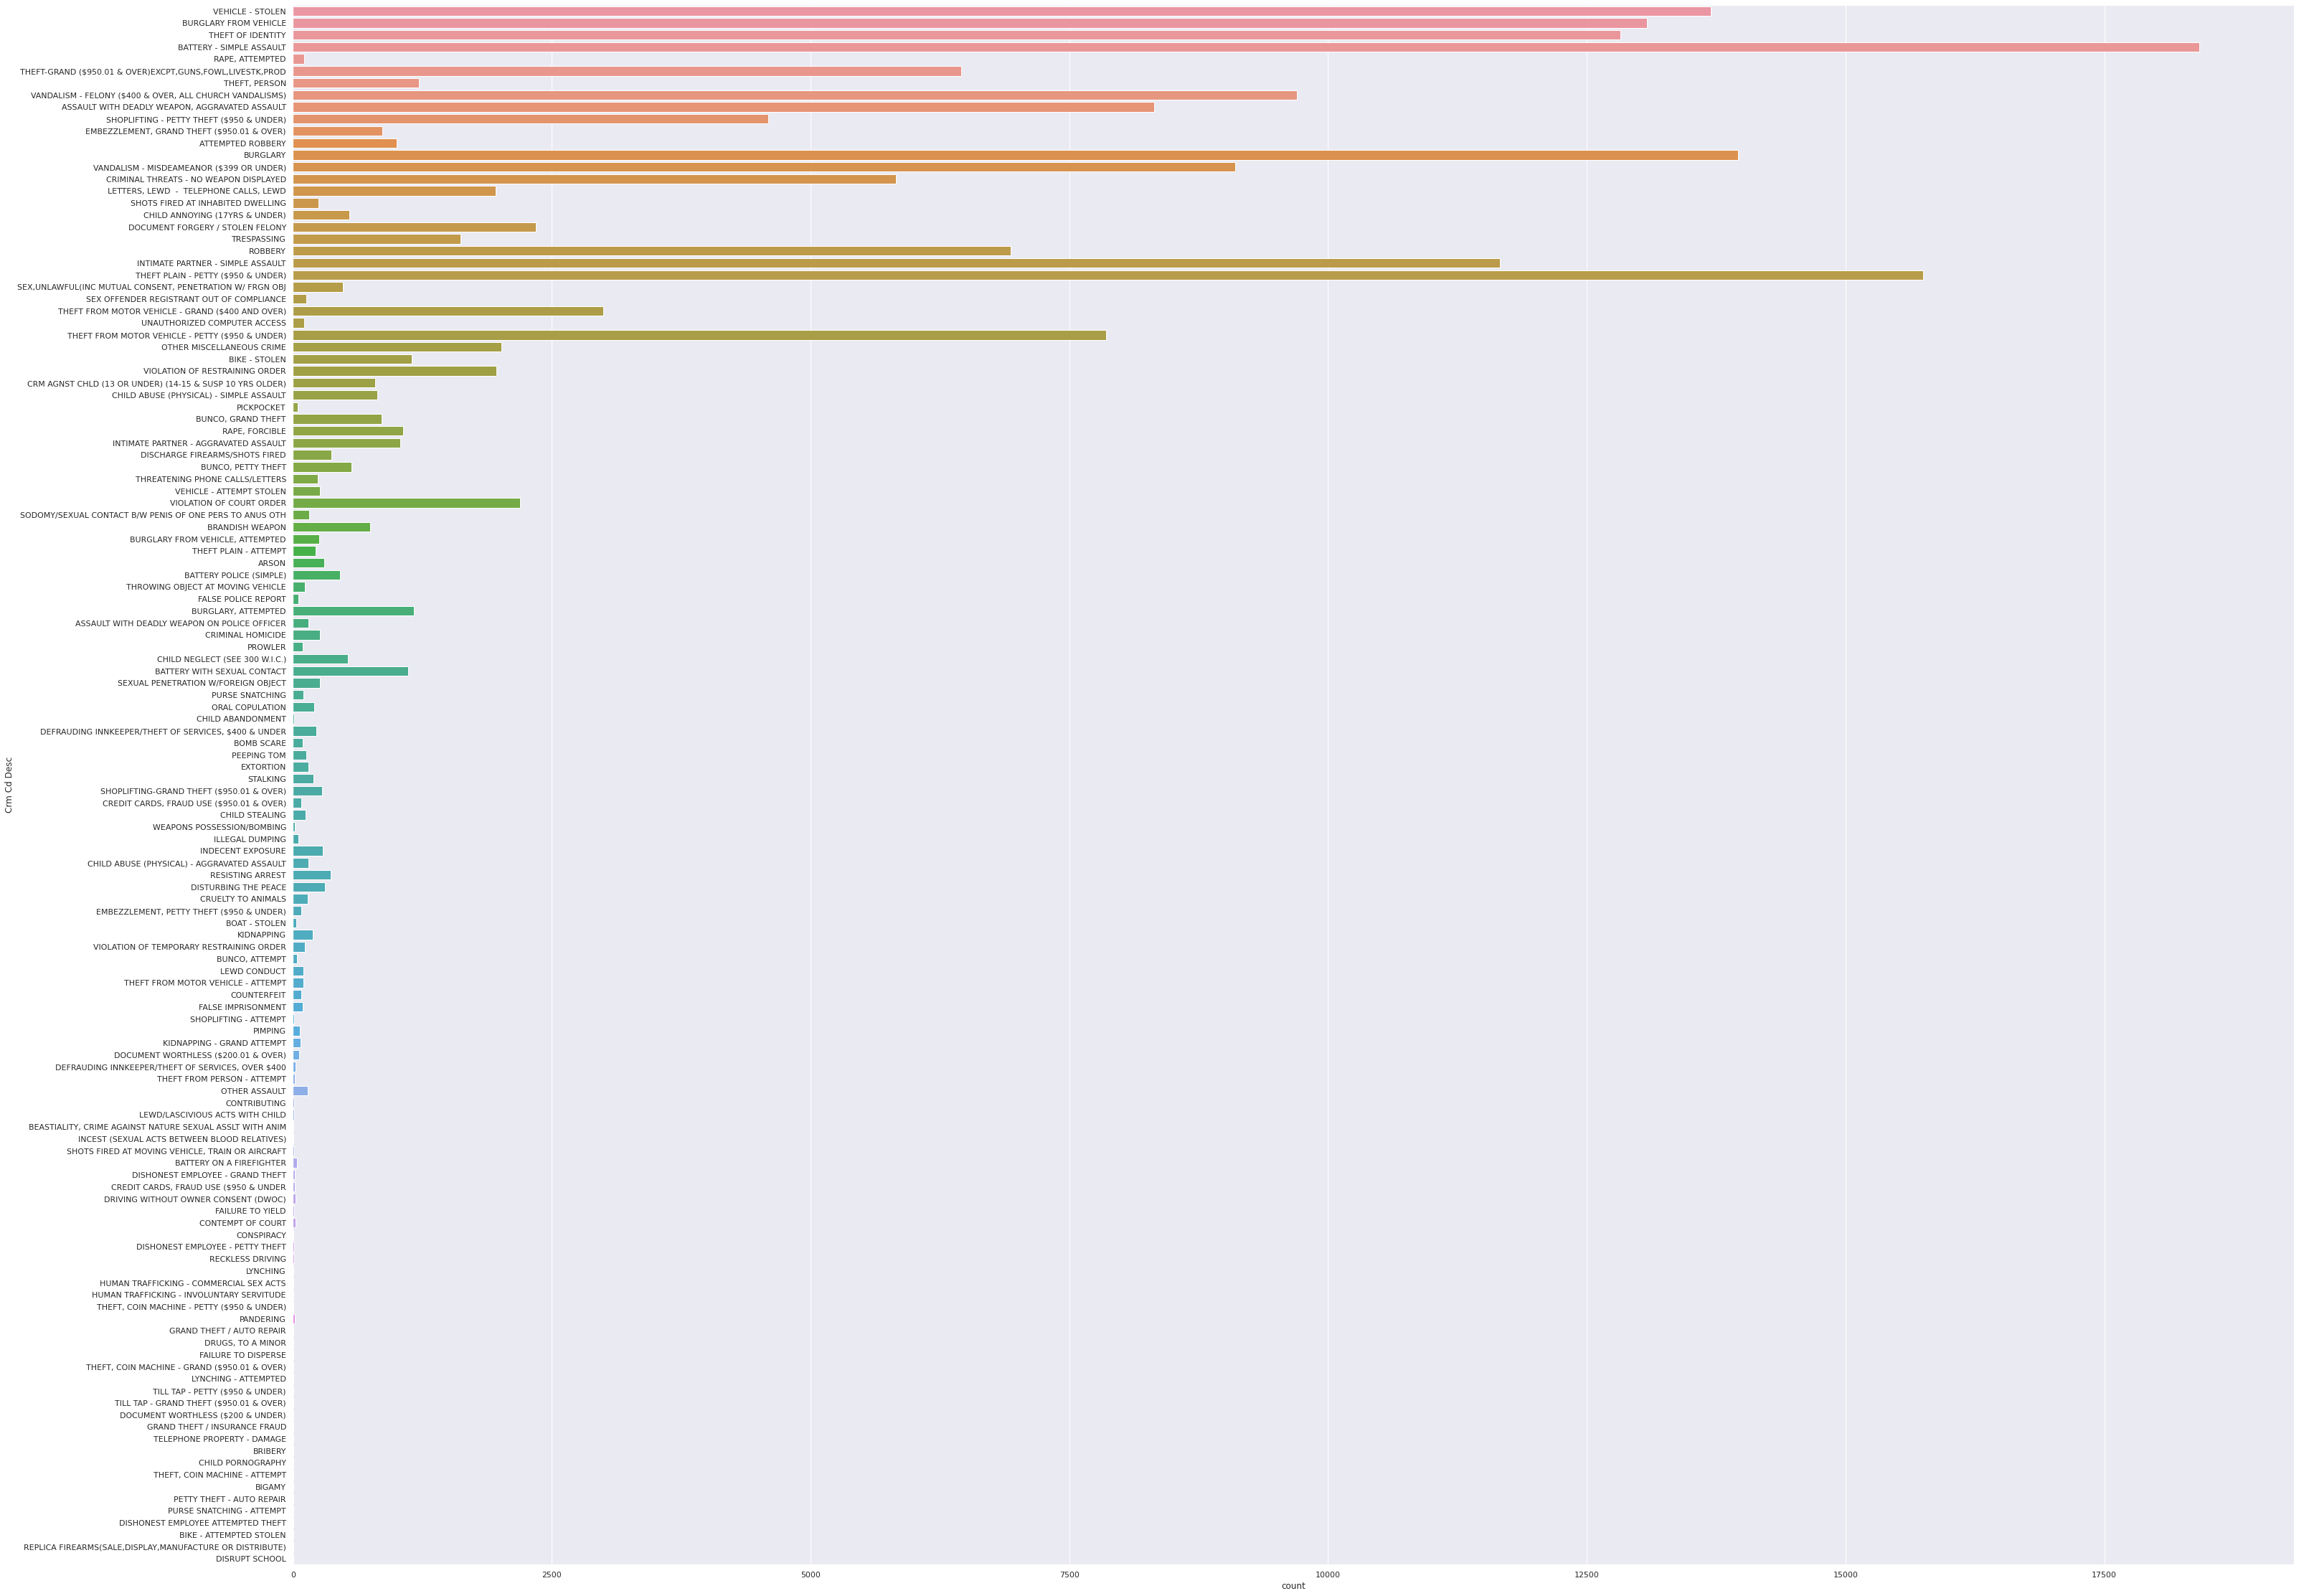

In [ ]:
df_crime = pd.read_csv('/content/gdrive/My Drive/Crime_Data_from_2010_to_2019.csv')
df_call = pd.read_csv('/content/gdrive/My Drive/lapd-calls-for-service-2014.csv')
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_crime.isnull().sum())
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC']).dt.date
df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
df_crime = df_crime.loc[df_crime['year'] == 2014]
ax = sns.countplot(y="Crm Cd Desc", data=df_crime, linewidth=1)
ax = sns.set(rc={'figure.figsize':(50, 40)})

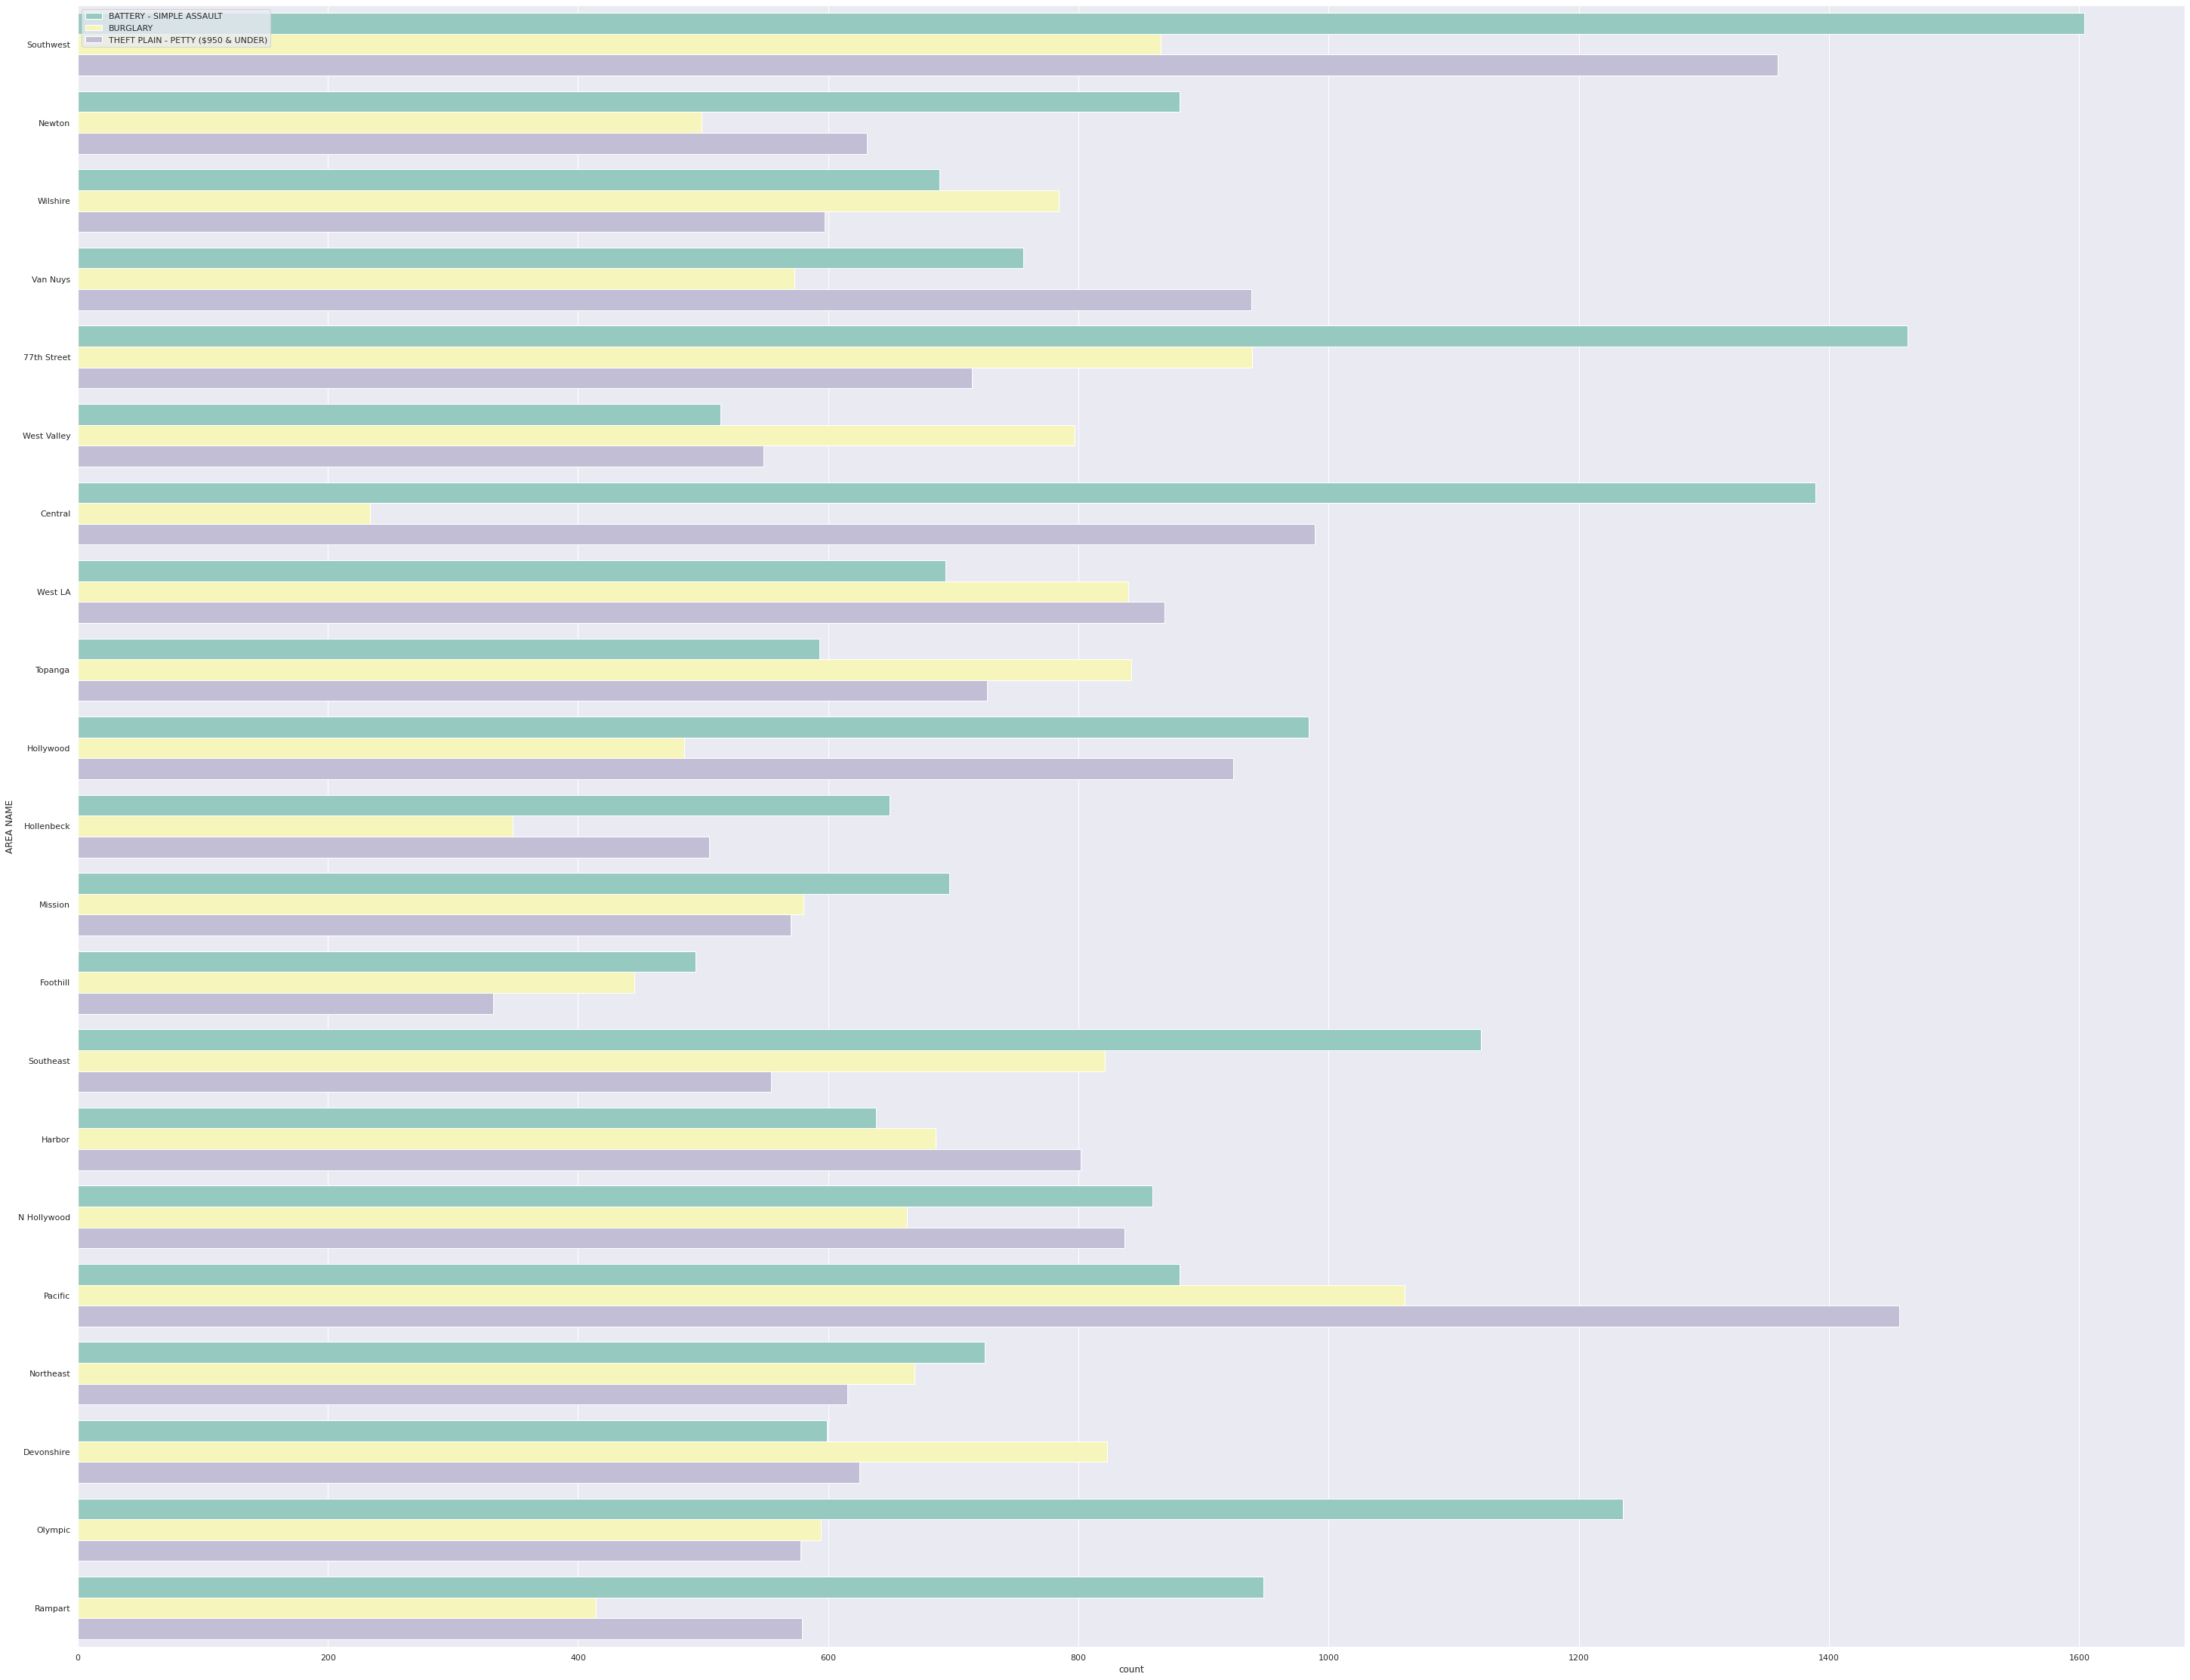

In [ ]:
df_crime = df_crime.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'})
list = ['THEFT PLAIN - PETTY ($950 & UNDER)', 'BURGLARY', 'BATTERY - SIMPLE ASSAULT']
df_crime = df_crime[df_crime['Crm_Cd_Desc'].isin(list)]
ax = sns.countplot(y="AREA NAME", hue="Crm_Cd_Desc", data=df_crime, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper left')

 
Count total NaN at each column in a DataFrame : 

 Incident Number          0
Reporting District       0
Area Occurred            0
Dispatch Date            0
Dispatch Time            0
Call Type Code           0
Call Type Description    0
dtype: int64


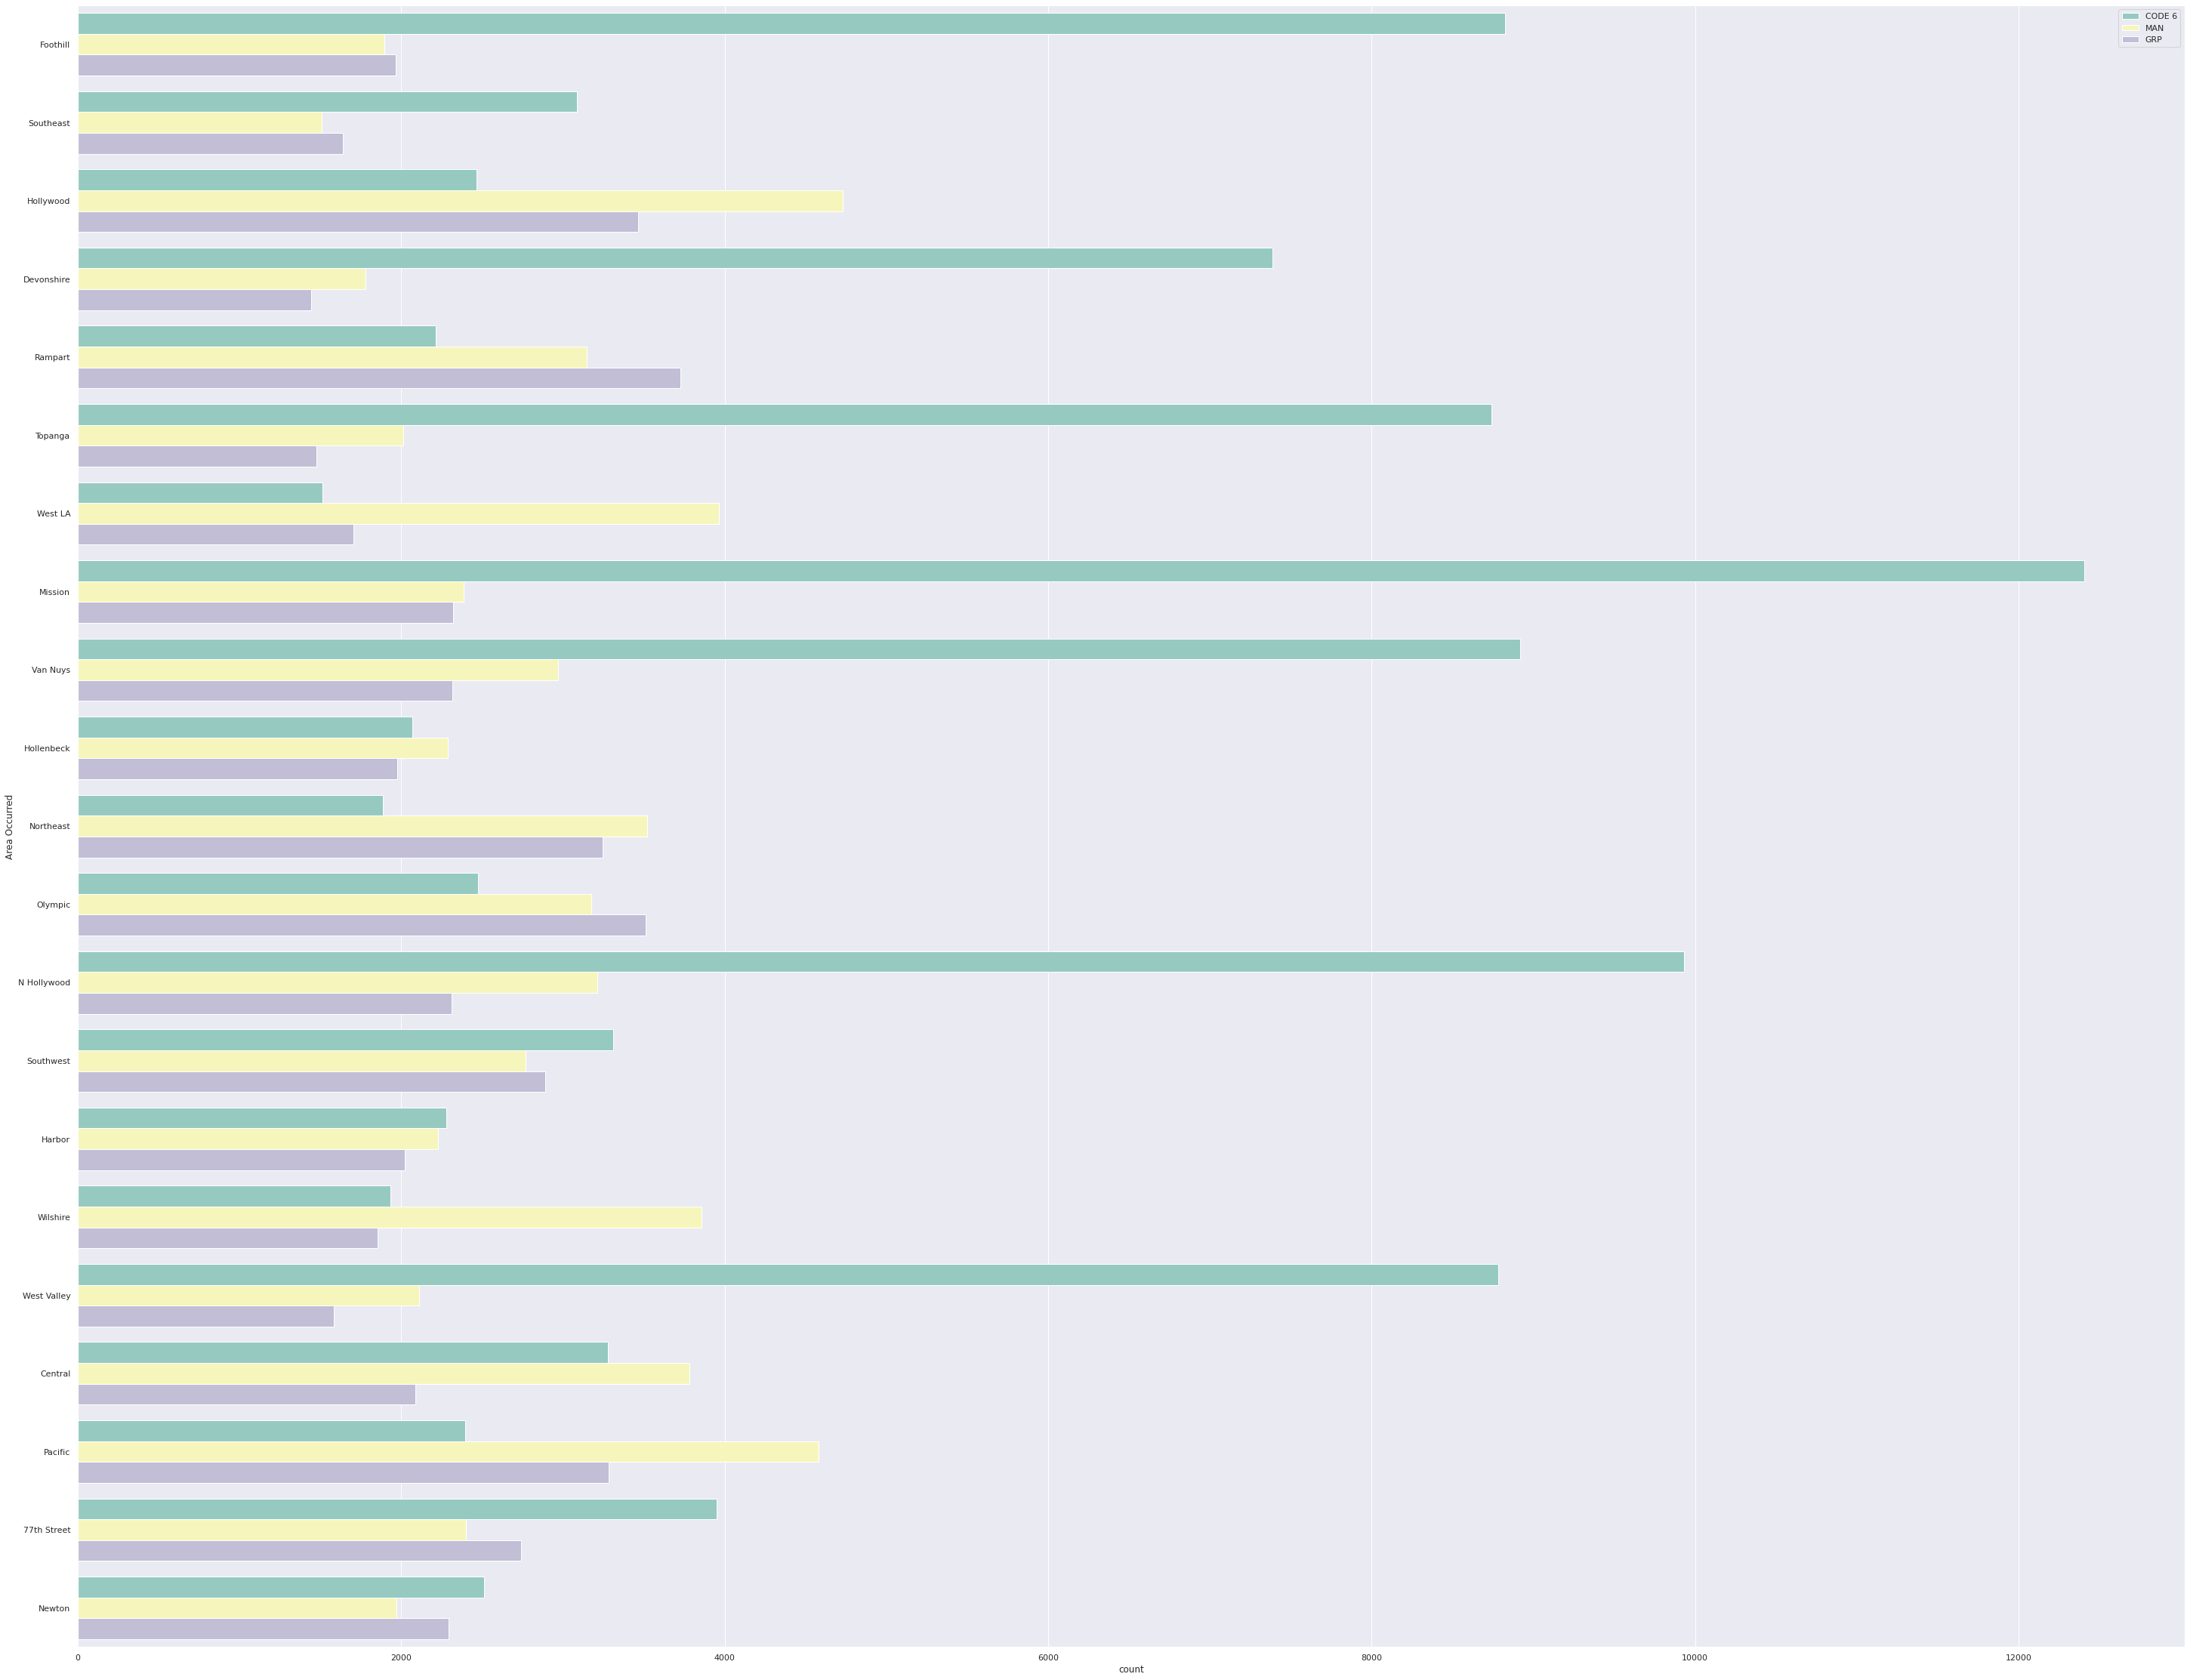

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_call.isnull().sum())
df_call = df_call.rename(columns={'Call Type Description': 'Call_Type_Description'})
df_call.Call_Type_Description.value_counts()
list = ['CODE 6', 'GRP', 'MAN']
df_call = df_call[df_call['Call_Type_Description'].isin(list)]
ax = sns.countplot(y="Area Occurred", hue="Call_Type_Description", data=df_call, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper right')

**Year 2015**

 
Count total NaN at each column in a DataFrame : 

 DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            114900
Vict Age                0
Vict Sex            95053
Vict Descent        95072
Premis Cd              38
Premis Desc            38
Weapon Used Cd     701766
Weapon Desc        701767
Status                  2
Status Desc             0
Crm Cd 1                4
Crm Cd 2           983594
Crm Cd 3          1047440
Crm Cd 4          1048537
LOCATION                0
Cross Street       875978
LAT                     0
LON                     0
dtype: int64


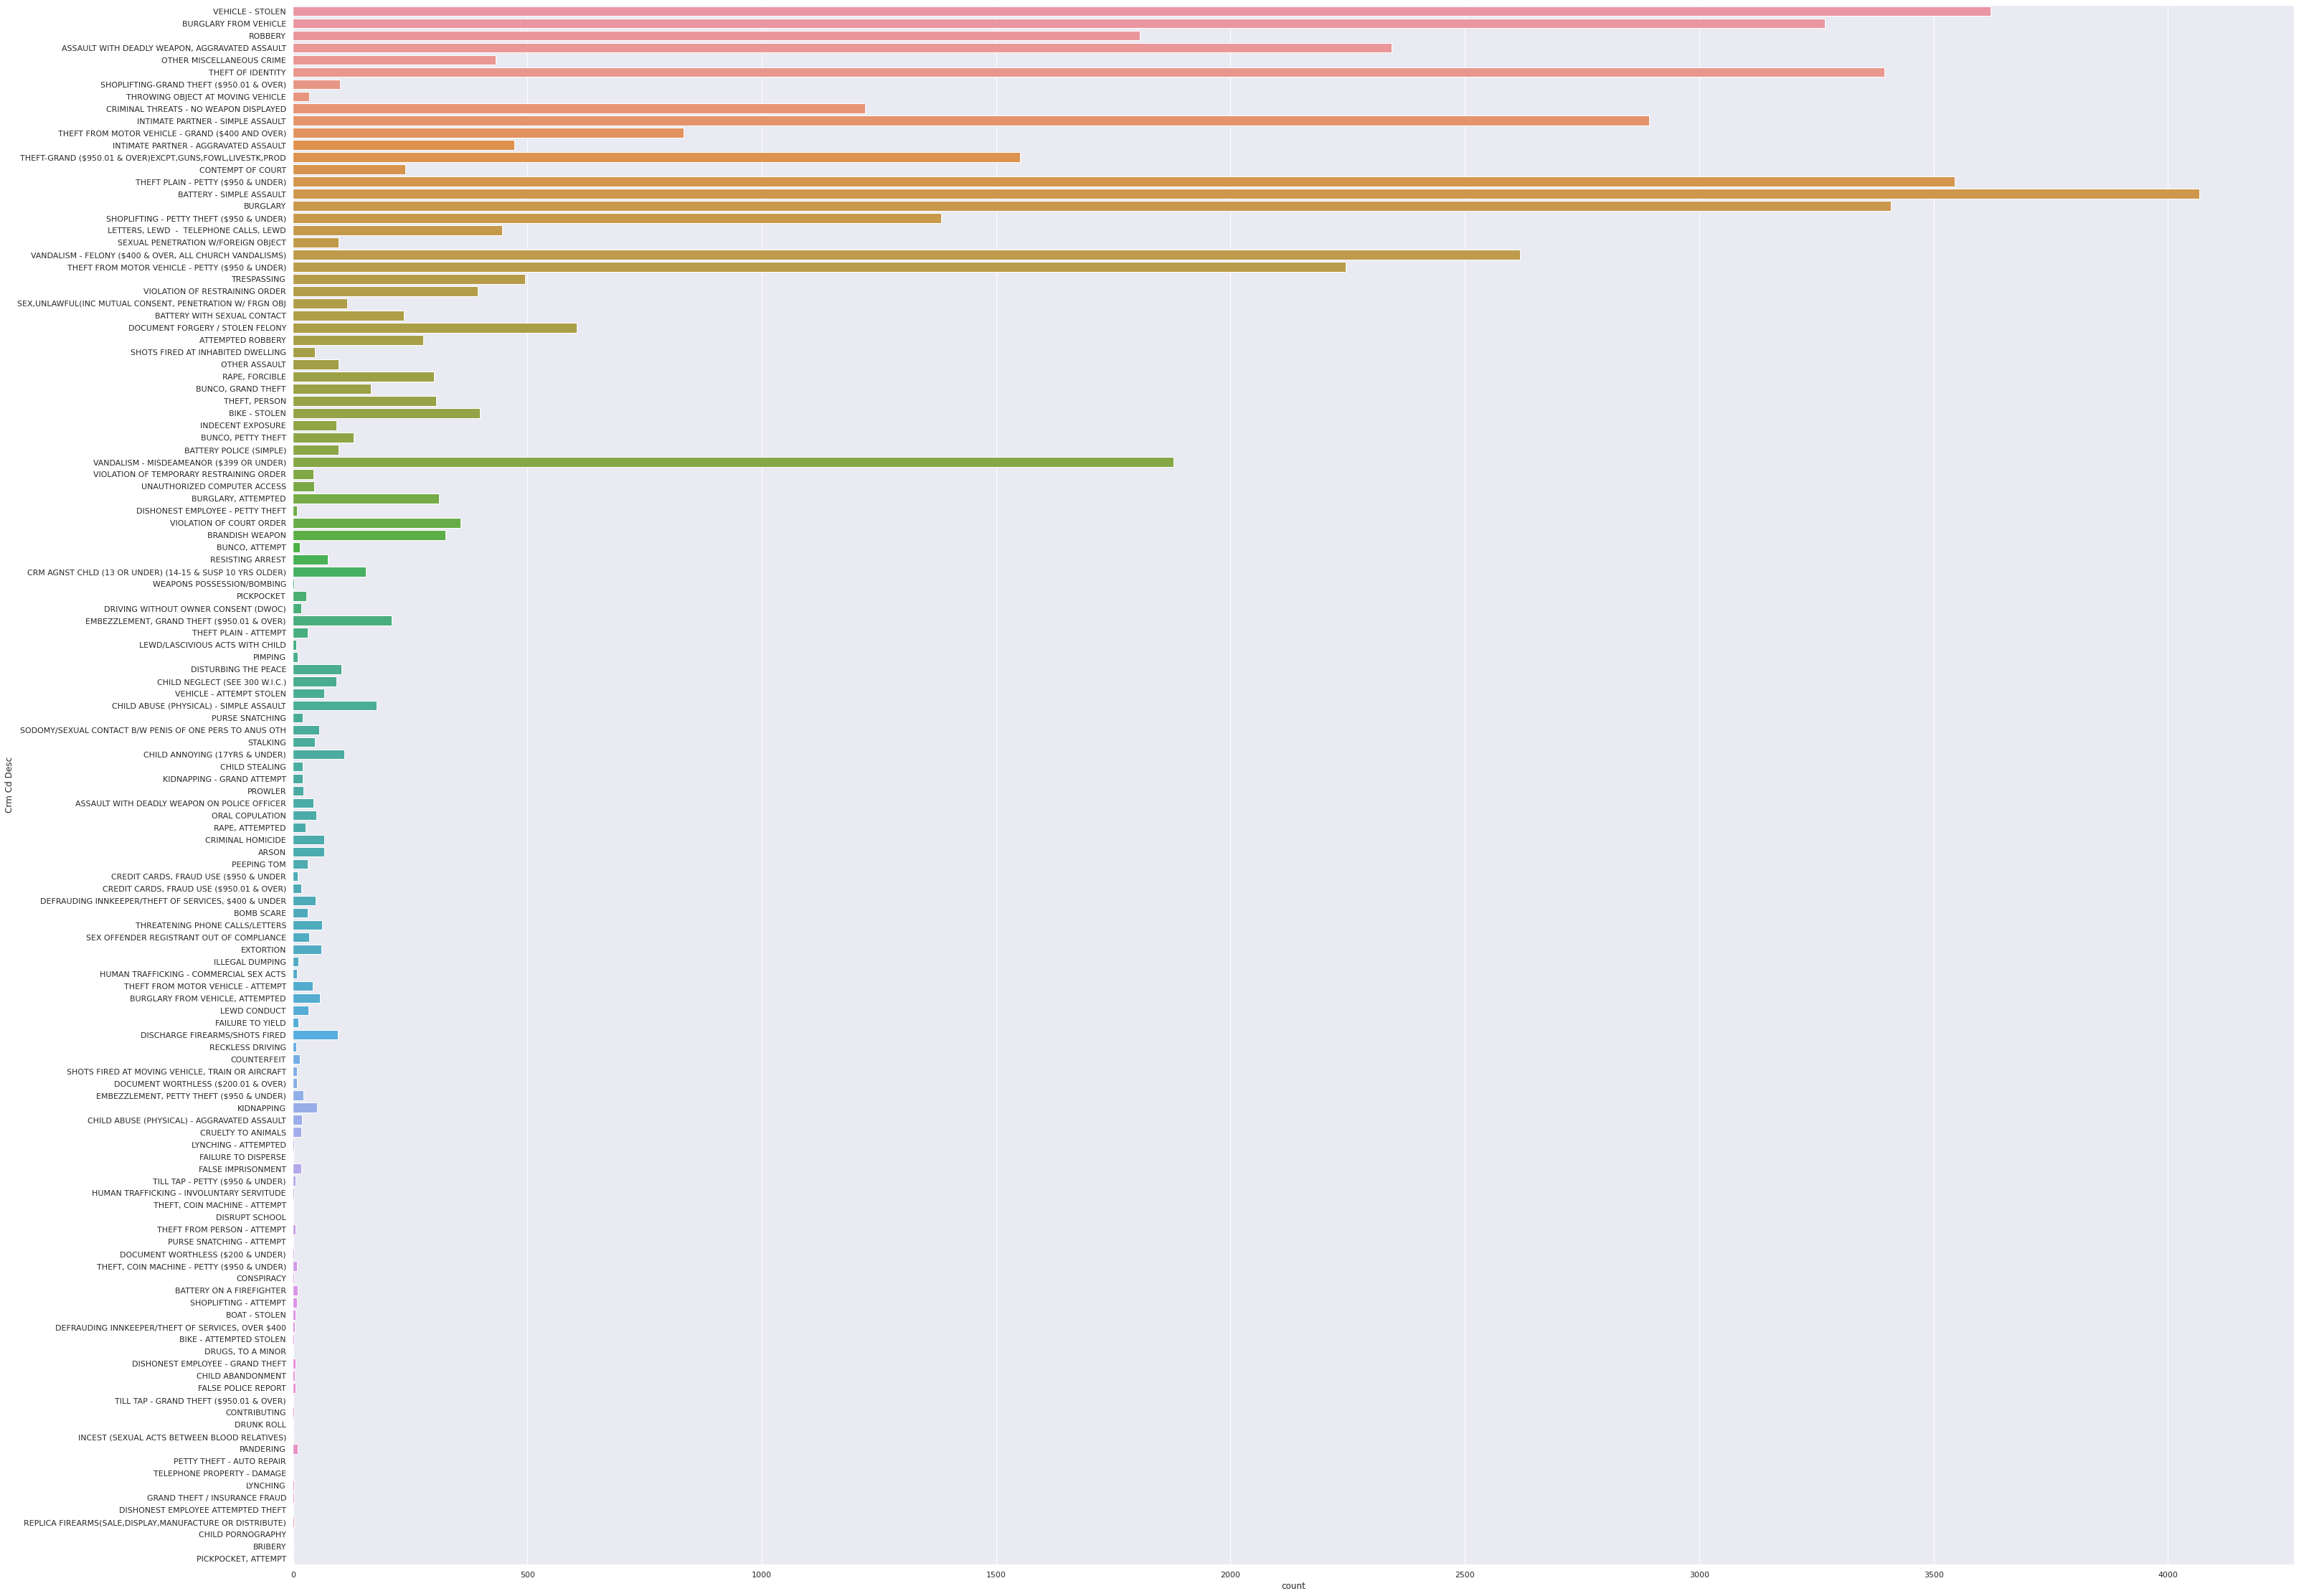

In [ ]:
df_crime = pd.read_csv('/content/gdrive/My Drive/Crime_Data_from_2010_to_2019.csv')
df_call = pd.read_csv('/content/gdrive/My Drive/lapd-calls-for-service-2015.csv')
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_crime.isnull().sum())
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC']).dt.date
df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
df_crime = df_crime.loc[df_crime['year'] == 2015]
ax = sns.countplot(y="Crm Cd Desc", data=df_crime, linewidth=1)
ax = sns.set(rc={'figure.figsize':(50, 40)})

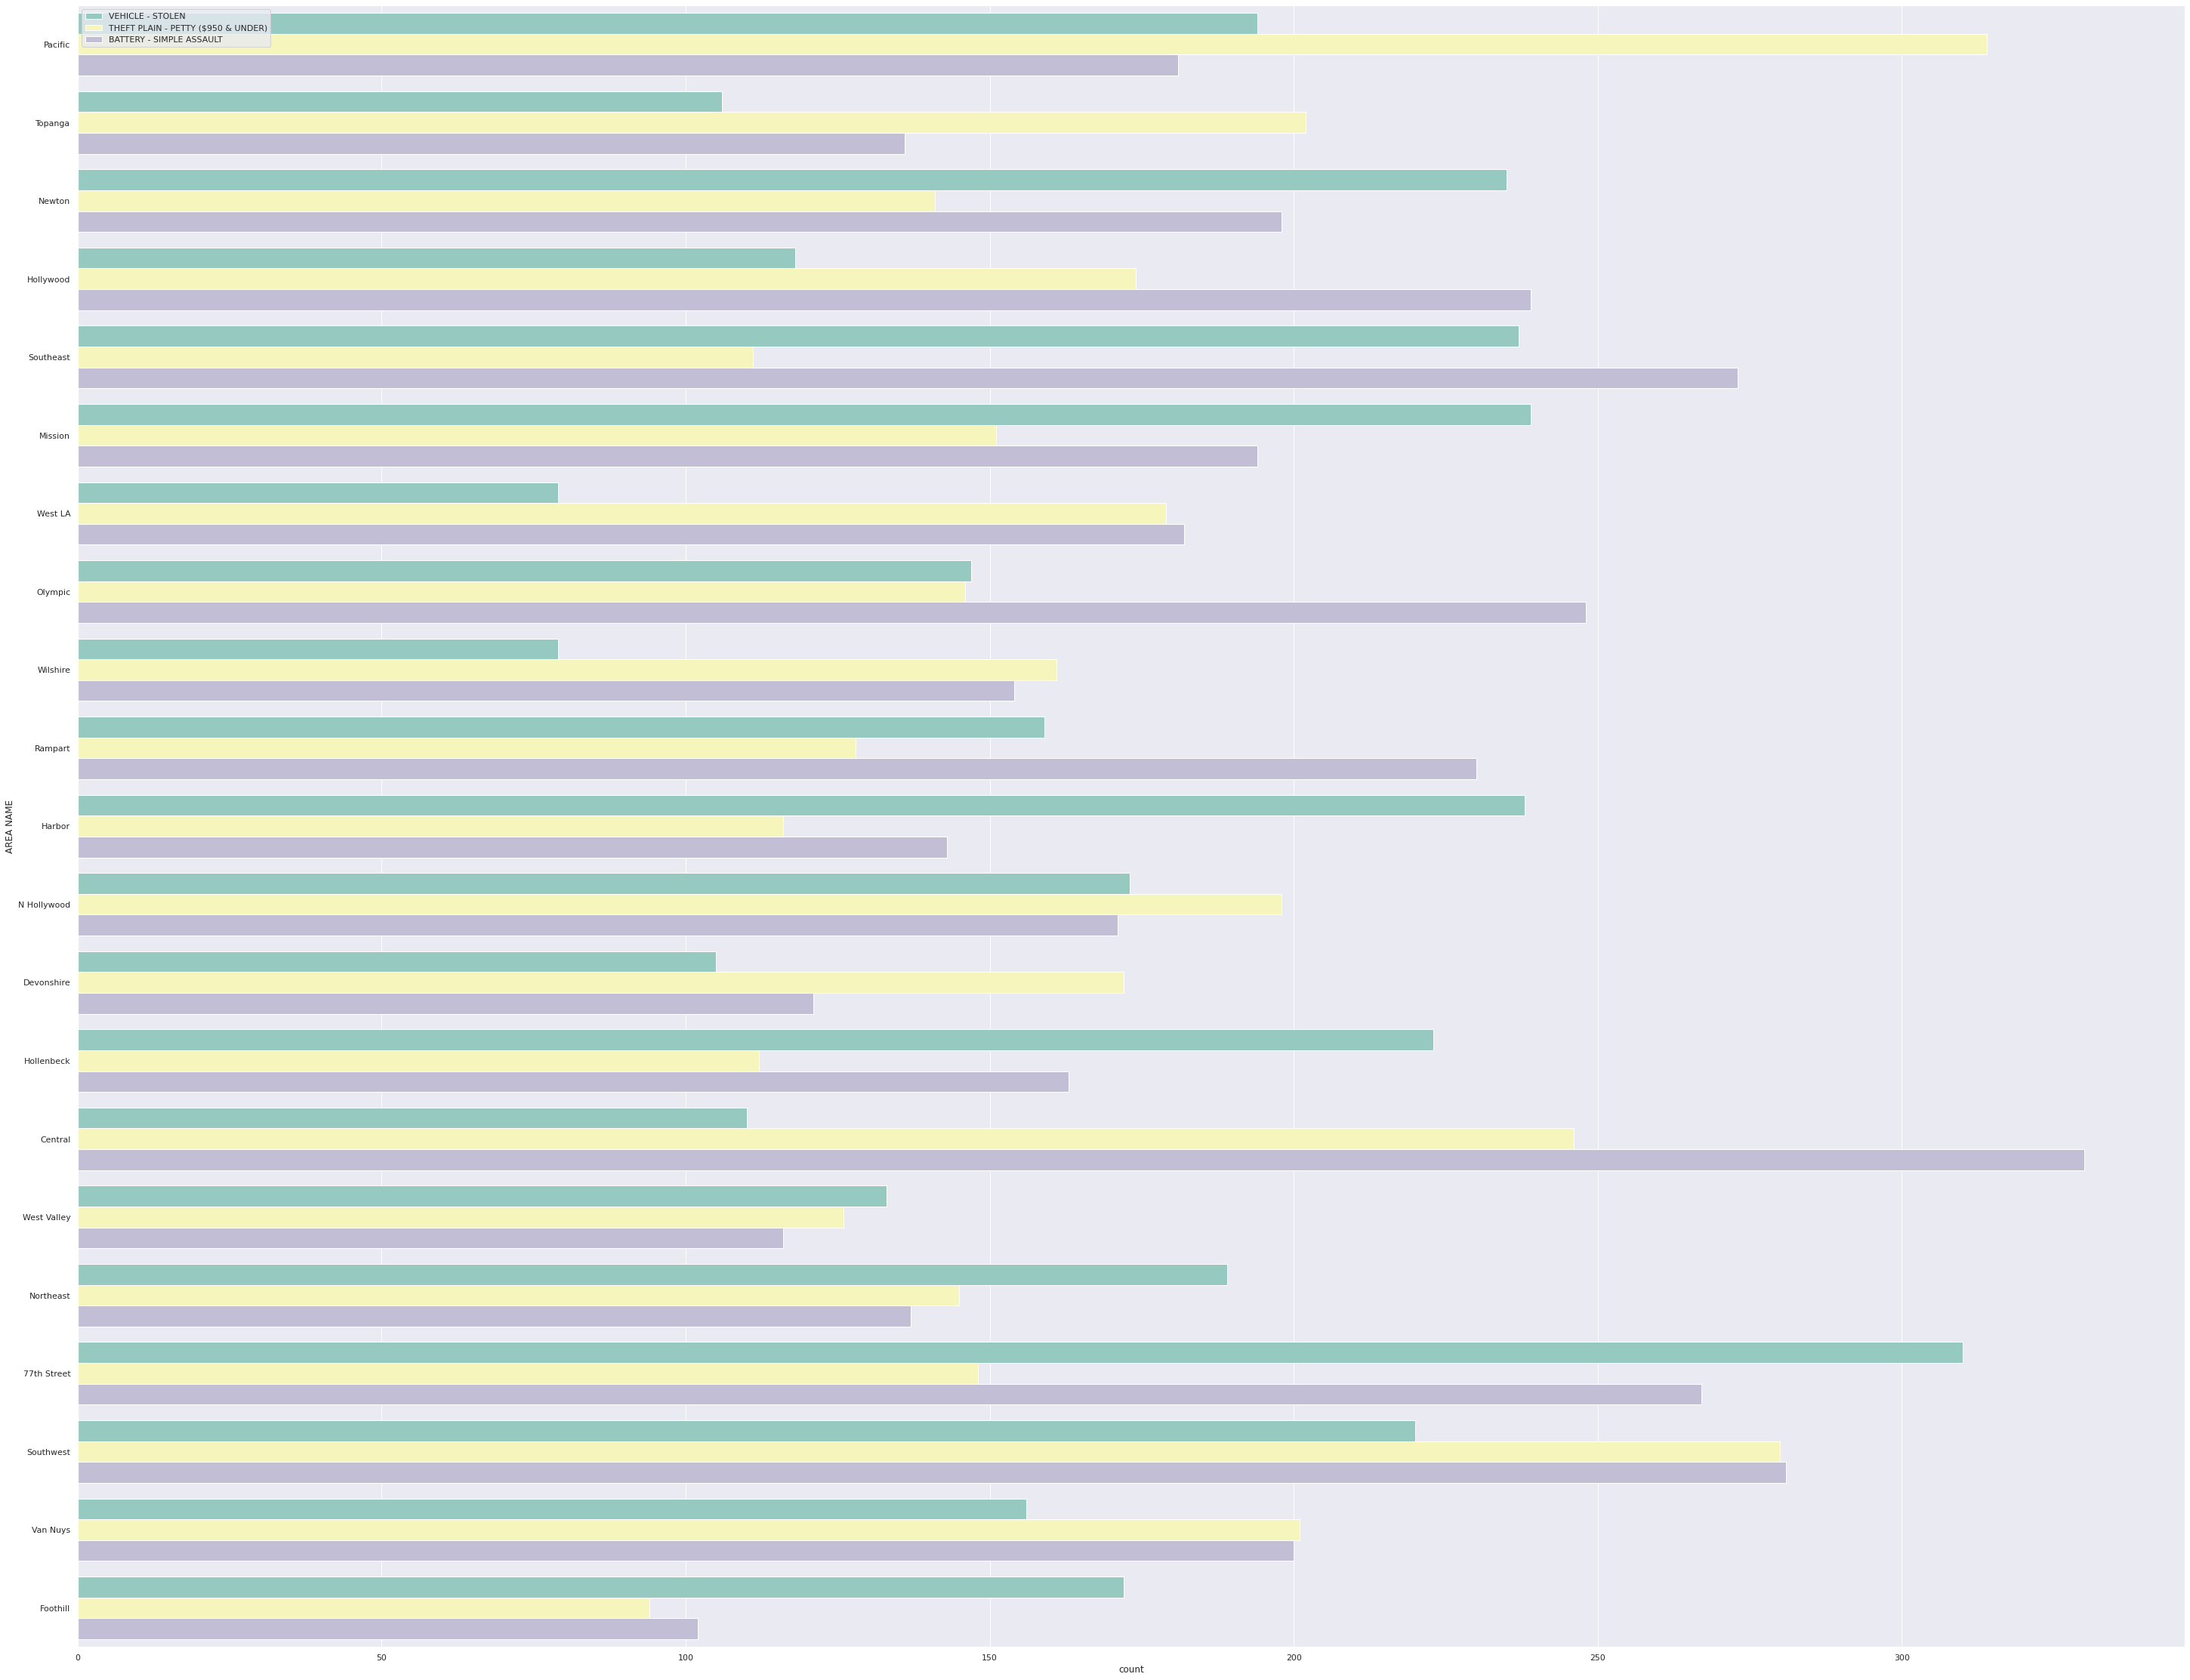

In [ ]:
df_crime = df_crime.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'})
list = ['THEFT PLAIN - PETTY ($950 & UNDER)', 'VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT']
df_crime = df_crime[df_crime['Crm_Cd_Desc'].isin(list)]
ax = sns.countplot(y="AREA NAME", hue="Crm_Cd_Desc", data=df_crime, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper left')

 
Count total NaN at each column in a DataFrame : 

 Incident Number          0
Reporting District       0
Area Occurred            0
Dispatch Date            0
Dispatch Time            0
Call Type Code           0
Call Type Description    0
dtype: int64


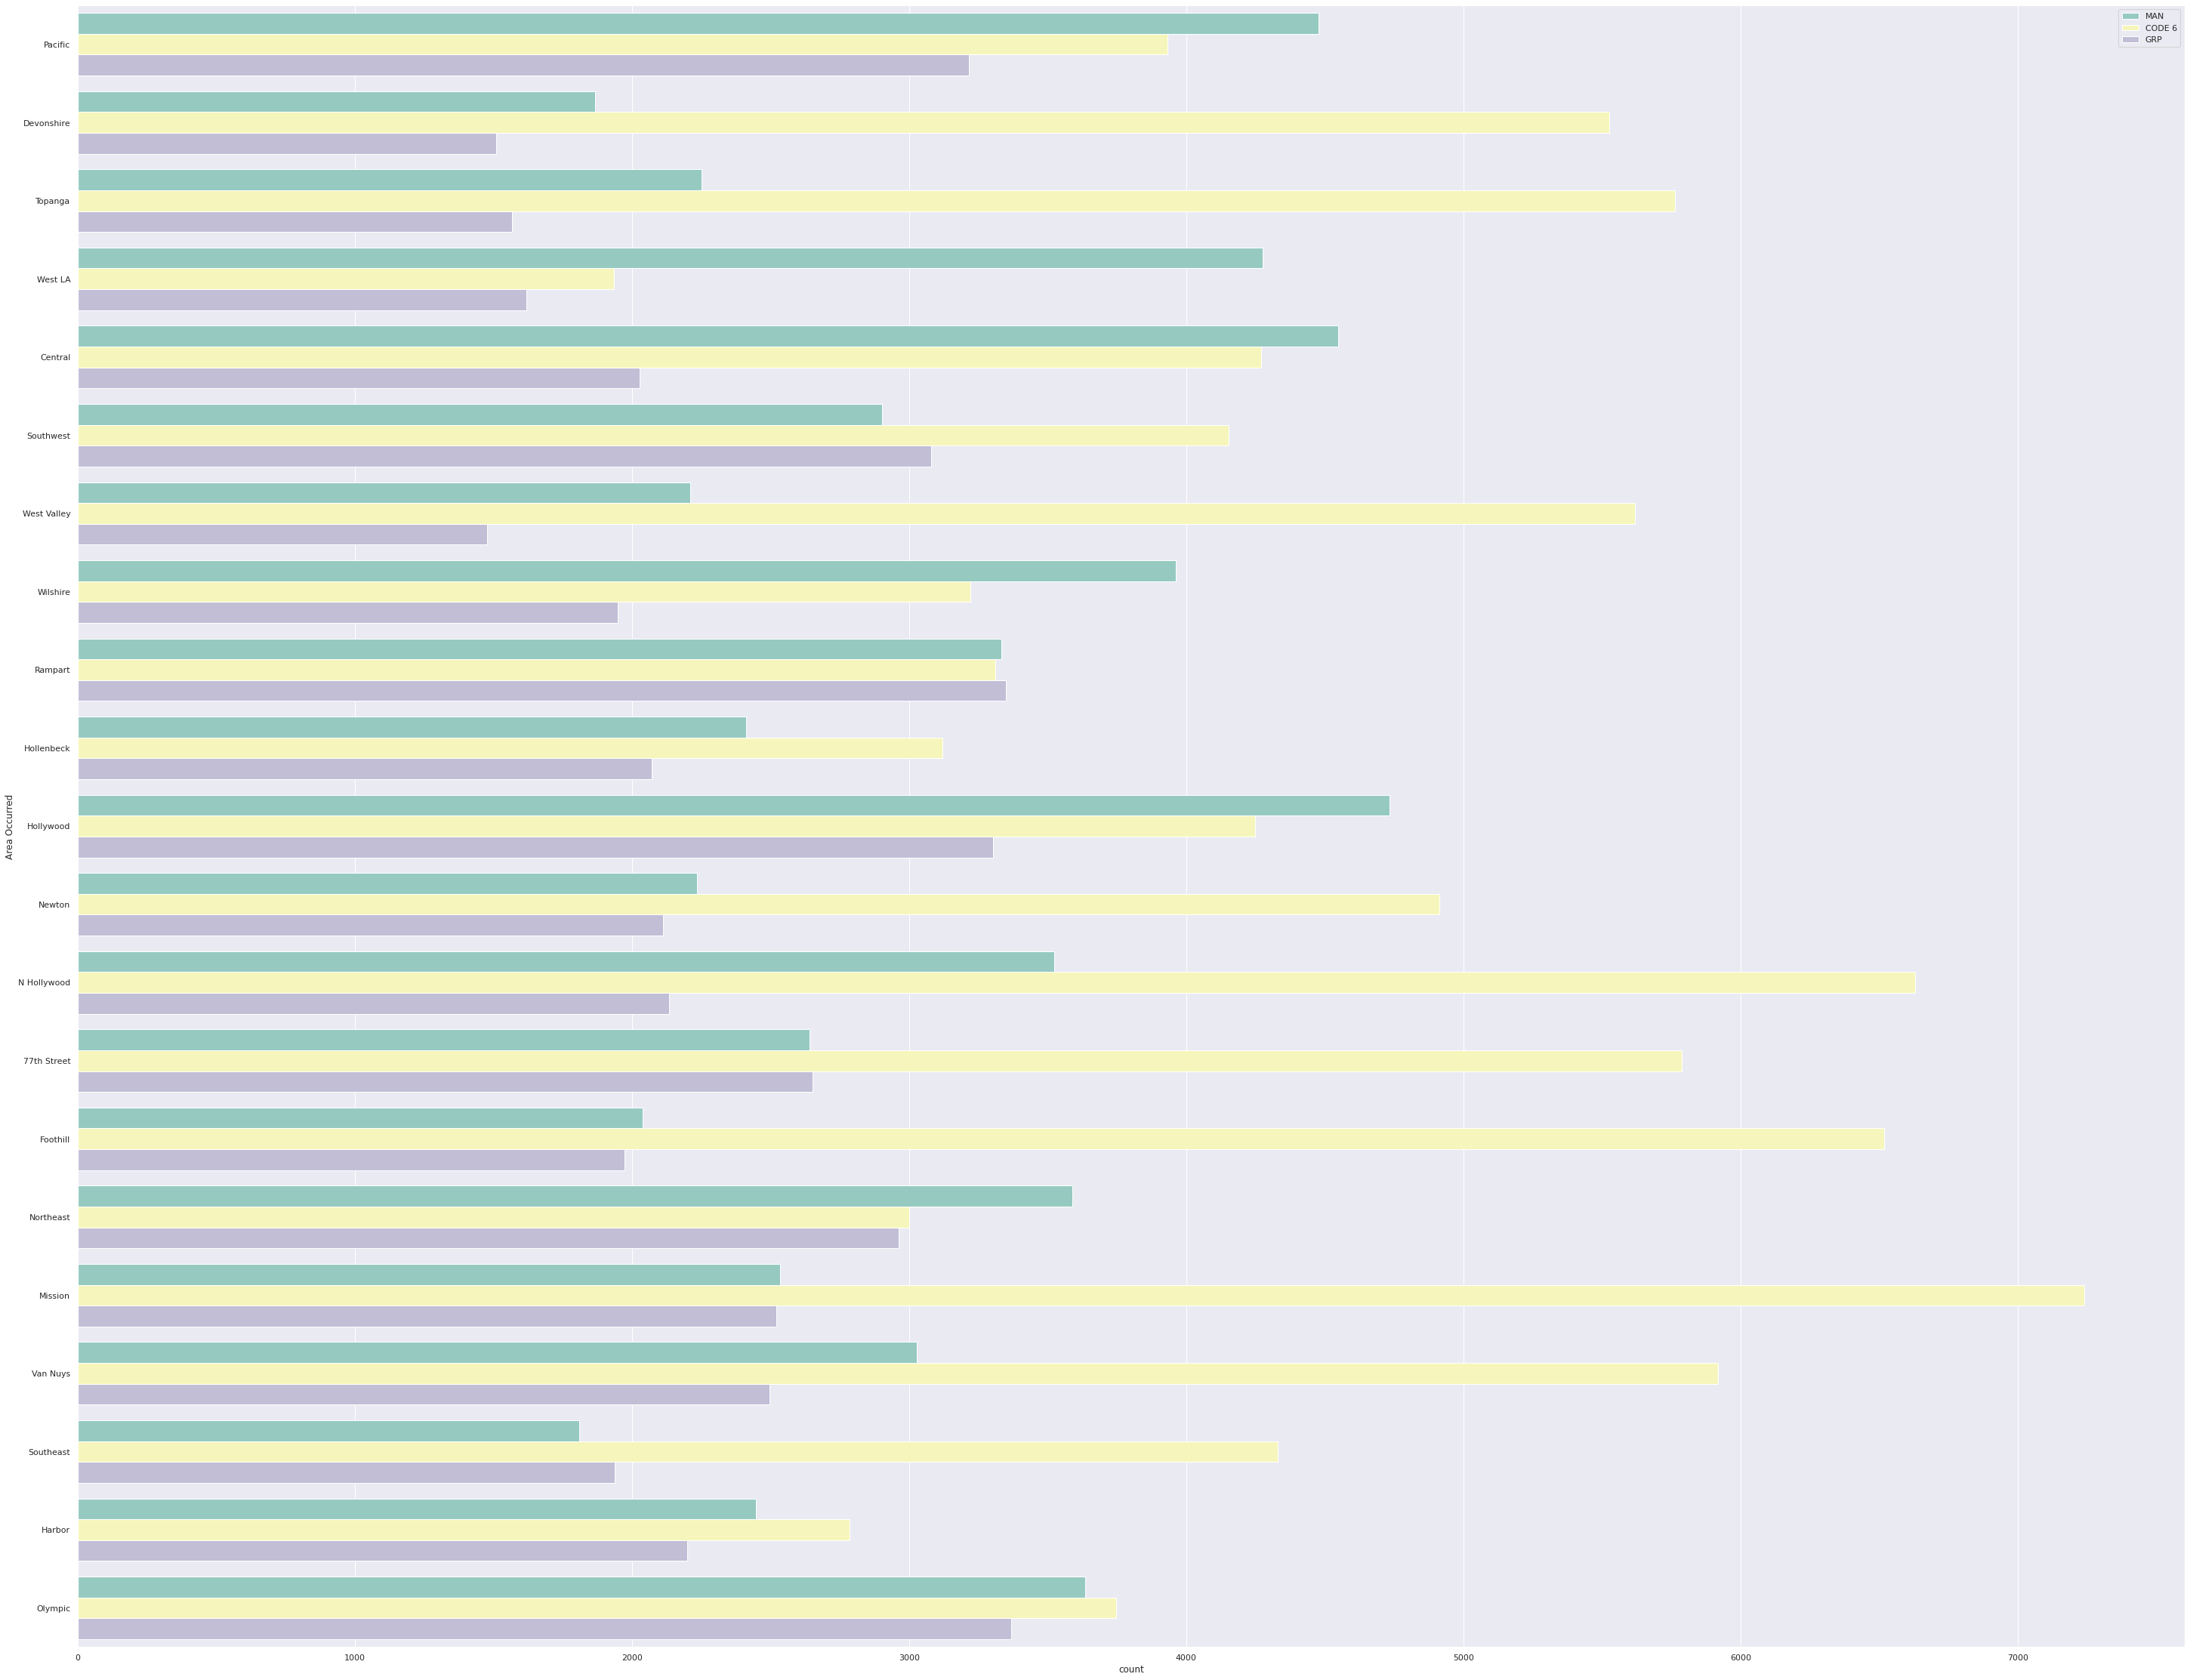

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_call.isnull().sum())
df_call = df_call.rename(columns={'Call Type Description': 'Call_Type_Description'})
df_call.Call_Type_Description.value_counts()
list = ['CODE 6', 'GRP', 'MAN']
df_call = df_call[df_call['Call_Type_Description'].isin(list)]
ax = sns.countplot(y="Area Occurred", hue="Call_Type_Description", data=df_call, linewidth=1, palette="Set3")
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper right')

## **Question 3: Does Weather has any effect on the crime rate over the years?**

In [ ]:
df_weather = pd.read_csv('/content/gdrive/My Drive/weather_description.csv')
df_weather = df_weather[['datetime', 'Los Angeles']]
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_weather.isnull().sum())
df_weather = df_weather.dropna(subset=['Los Angeles'])
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date
df_weather['year'] = pd.to_datetime(df_weather['datetime']).dt.year
#df_crime = df_crime.loc[df_crime['year'] == 2010]
df_weather['year'] = pd.to_datetime(df_weather['datetime']).dt.year

 
Count total NaN at each column in a DataFrame : 

 datetime       0
Los Angeles    1
dtype: int64


In [ ]:
df_crime = pd.read_csv('/content/gdrive/My Drive/Crime_Data_from_2010_to_2019.csv')
df_crime = df_crime[['DR_NO', 'DATE OCC']]
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_crime.isnull().sum())
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC']).dt.date
df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year

 
Count total NaN at each column in a DataFrame : 

 DR_NO       0
DATE OCC    0
dtype: int64


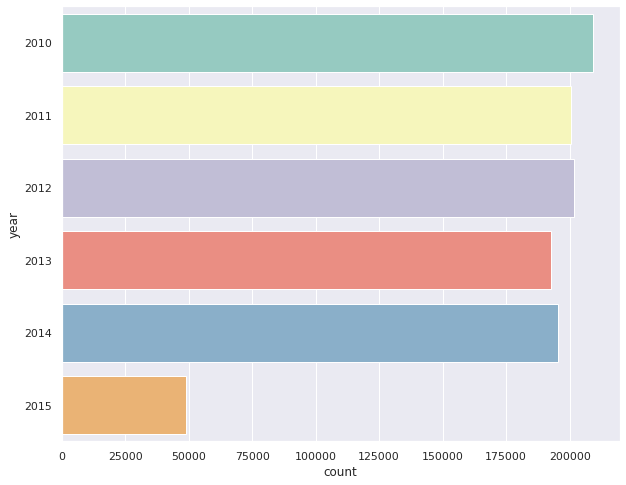

In [ ]:
ax = sns.countplot(y="year", data=df_crime, palette="Set3")
ax = sns.set(rc={'figure.figsize':(10, 8)})

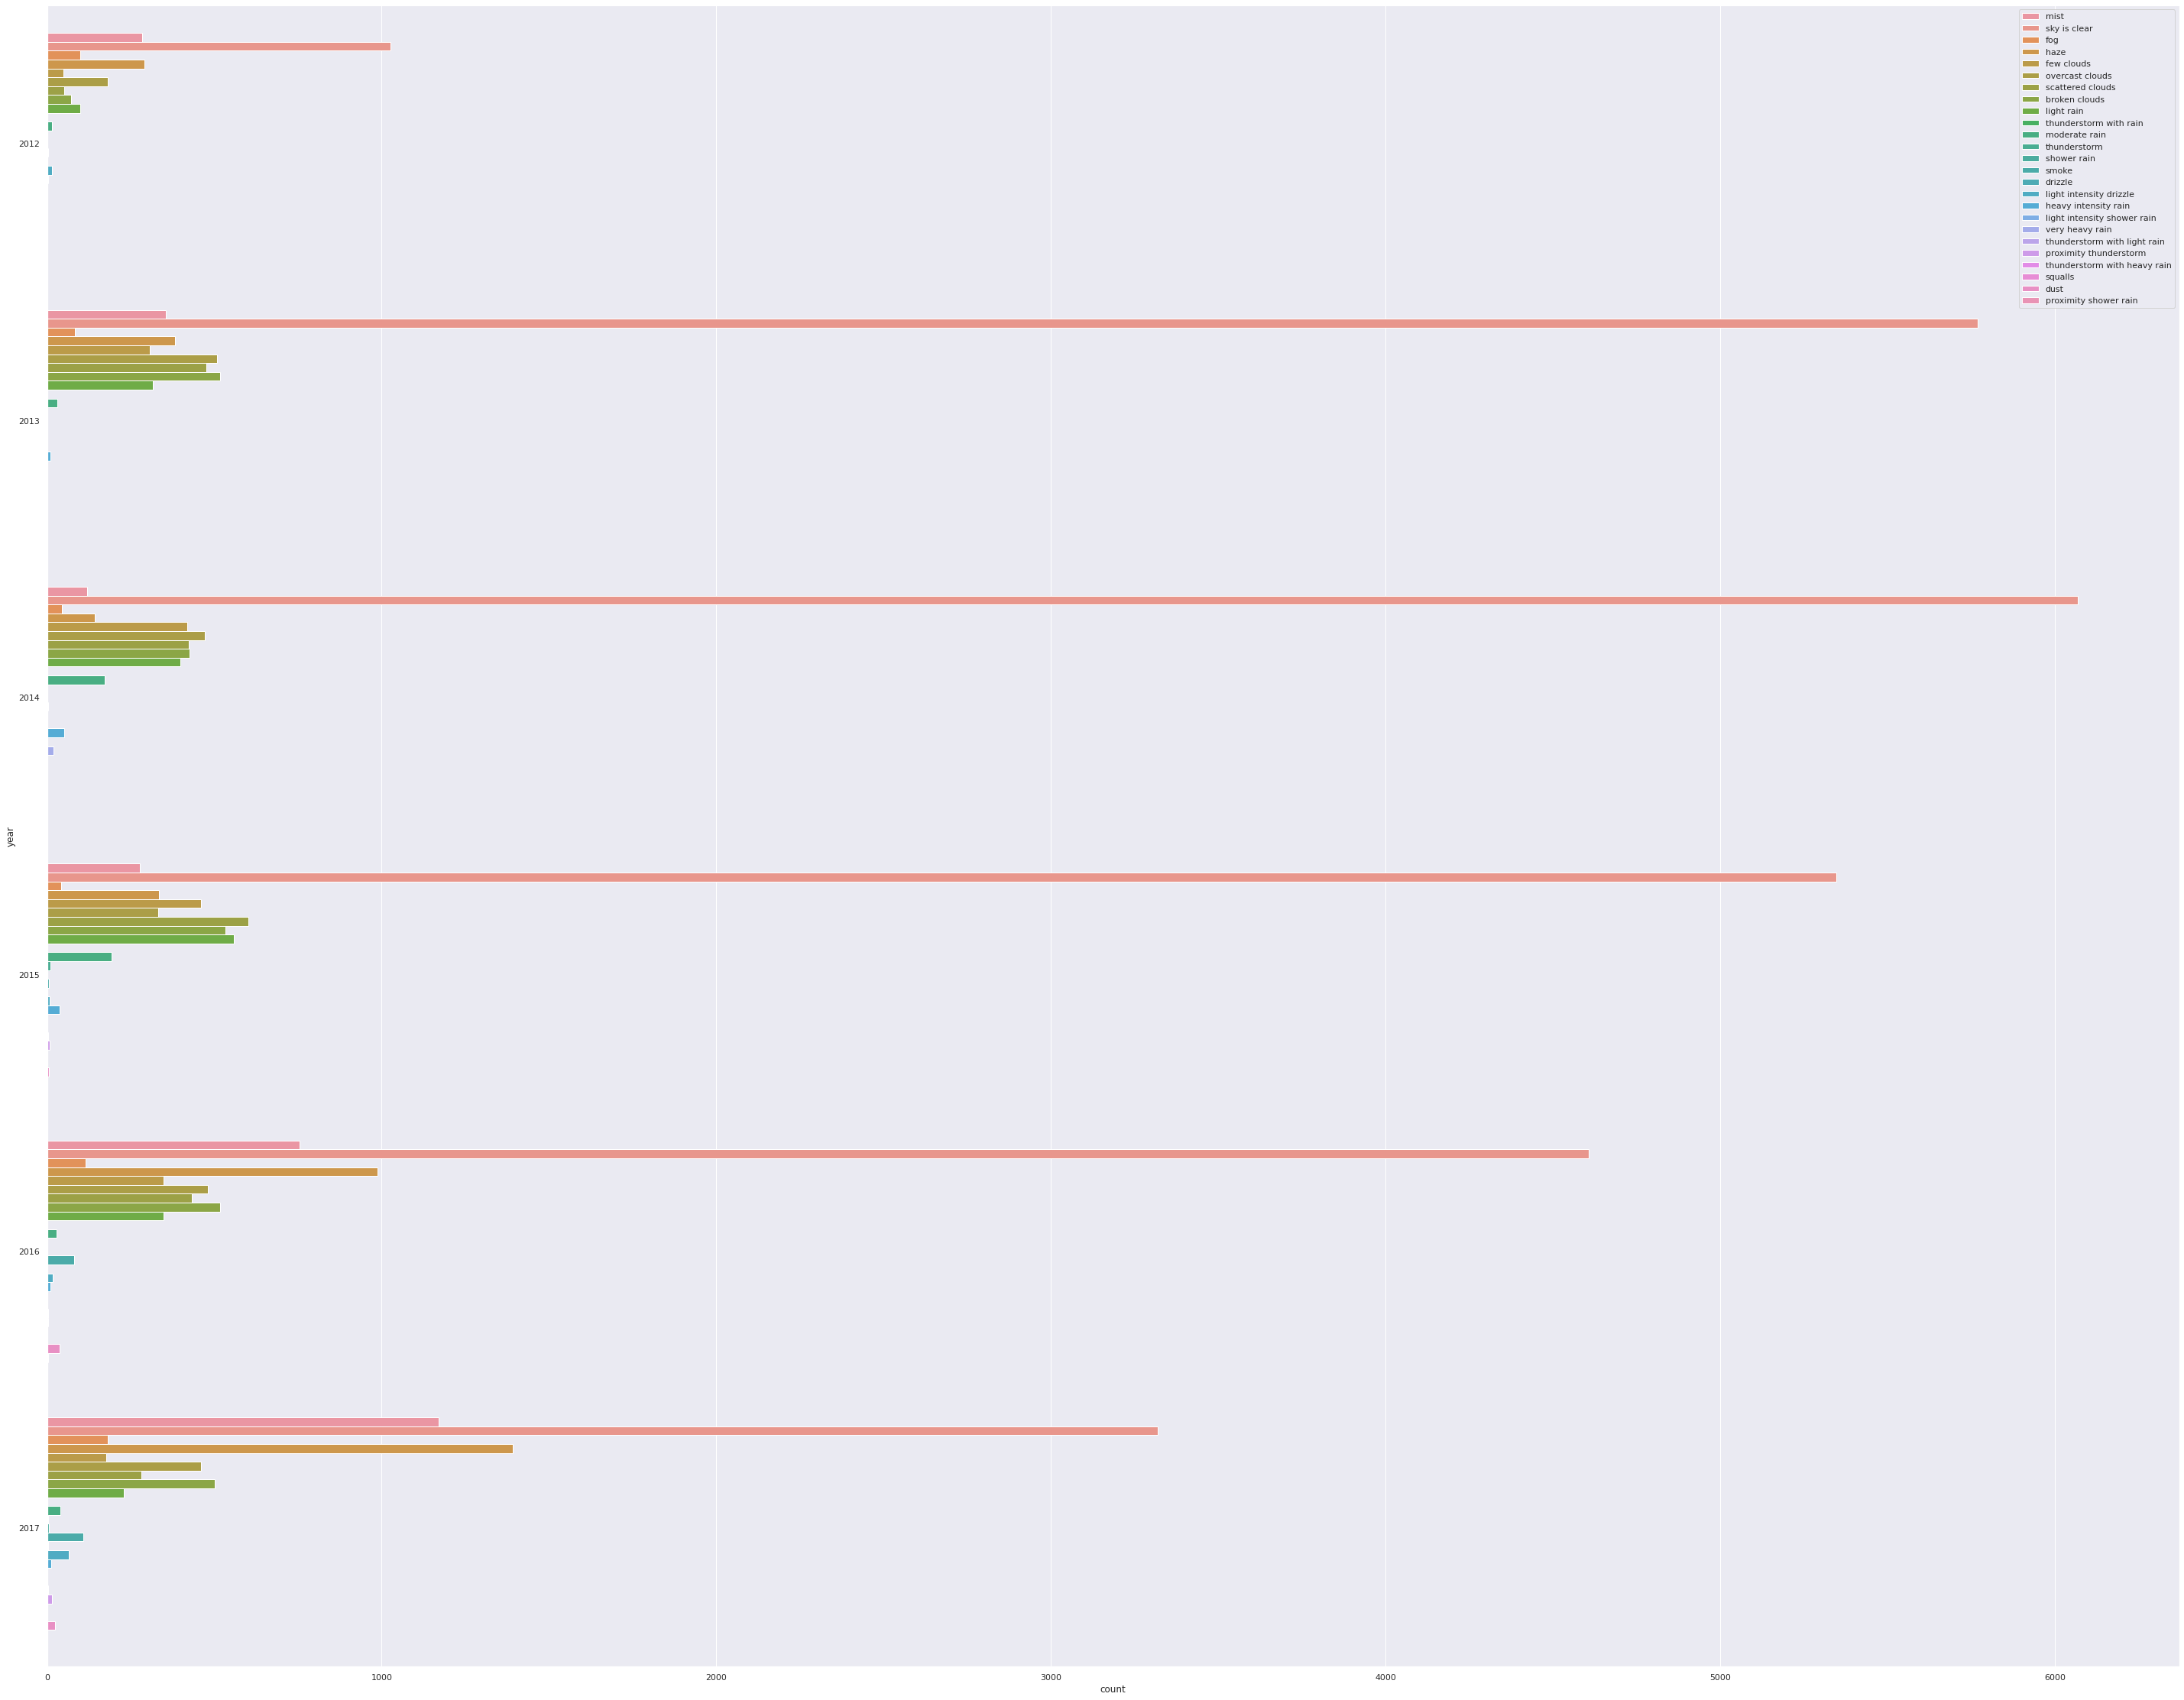

In [ ]:
ax = sns.countplot(y="year", hue="Los Angeles", data=df_weather)
ax = sns.set(rc={'figure.figsize':(50, 40)})
plt.legend(loc='upper right')

## **Question 4: Does Covid-19 has any affect on Crimes Committed**

Reading counties data of covid cases

In [75]:
counties=pd.read_csv("Counties.csv")

Extracting Los Angeles Data from complete dataset

In [76]:
counties=counties[counties['county']=="Los Angeles"]

Converting date object to datetime data type

In [77]:
counties['date']=pd.to_datetime(counties['date'])
df_raw['Date Rptd']=pd.to_datetime(df_raw['Date Rptd'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
def calculateCovidCases(counties):
  list_cases=[]
  for i in range(1,13):
    sum=0
    for index,row in counties.iterrows():
  
      if row['date'].month == i and row['date'].year==2020 :
        #print(row['date'])
        sum=sum+row['cases']
    list_cases.append([i,sum])

  return list_cases

In [79]:
covid_cases_reported=pd.DataFrame(calculateCovidCases(counties),columns=["Month","No_of_Covid_Cases"])

In [80]:
def calculateCrimeCases(df):
  list_cases=[]
  for i in range(1,13):
    sum=0
    for index,row in df.iterrows():
  
      if row['Date Rptd'].month == i and row['Date Rptd'].year==2020 :
        #print(row['date'])
        sum=sum+1
    list_cases.append([i,sum])

  return list_cases

In [82]:
crime_reported=pd.DataFrame(calculateCrimeCases(df_raw),columns=["Month","No_of_Crime_Cases"])

In [85]:
import plotly.express as px

fig=px.scatter(covid_cases_reported,x="Month",y="No_of_Covid_Cases",labels={"No_of_Covid_Cases":"No of Covid Cases"})
fig.update_traces(marker_size=10)
fig.show()

In [88]:
import plotly.express as px

fig=px.scatter(crime_reported,x="Month",y="No_of_Crime_Cases",labels={"No_of_Crime_Cases":"No of Crimes Reported"})
fig.update_traces(marker_size=10)
fig.show()

In [89]:
df_covid_crime = covid_cases_reported.merge(crime_reported, on="Month")

In [90]:
month_name=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_covid_crime["Month_Name"]=month_name

In [91]:
import plotly.express as px

fig=px.scatter(df_covid_crime,x="No_of_Covid_Cases",y="No_of_Crime_Cases",color="Month_Name",labels={"No_of_Covid_Cases":"No of Covid Cases Reported",
                                                                                                     "No_of_Crime_Cases":"No of Crime Cases Reported",
                                                                                                     "Month_Name":"Month"})
fig.update_traces(marker_size=10)
fig.show()